# PROGETTO FINALE FACCHINI LUDOVICA #

In [1]:
#importo le librerie che serviranno nello svolgimento dell'esercizio
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#carico il csv nella variabile covid
covid = pd.read_csv("esfinale/owid-covid-data.csv")


In [5]:

#anteprima del DataFrame
covid  


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


# PUNTO 1 #

Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [7]:

#visualizzo la dimensione del DataFrame
covid.shape


(429435, 67)

In [9]:

#visualizzo i nomi dei campi presenti nel DataFrame
covid.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:

#vado a vedere il tipo di dato che contiene ogni campo del DataFrame e quanti valori non nulli contiene ciascuno
covid.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [13]:

#osservo che il campo date è un object, vado a cambiare il tipo di formato 
covid["date"] = pd.to_datetime(covid["date"])  #rendo la modifica permanente

covid["date"].info() #visualizzo se il tipo di dato è stato cambiato


<class 'pandas.core.series.Series'>
RangeIndex: 429435 entries, 0 to 429434
Series name: date
Non-Null Count   Dtype         
--------------   -----         
429435 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


In [15]:

#voglio visualizzare il primo giorno e l'ultimo giorno di inserimento dei dati
print("L'inserimento dei dati parte dal:", covid["date"].min().date())  # .date() per visualizzare solo la data e non l'orario
print("L'inserimento dei dati finisce il:", covid["date"].max().date())


L'inserimento dei dati parte dal: 2020-01-01
L'inserimento dei dati finisce il: 2024-08-14


In [17]:

#voglio vedere in quali campi del DataFrame sono presenti valori nulli
valori_nulli = covid.isna().sum() 

valori_nulli


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [19]:

#voglio visualizzare le colonne che contengono valori nulli e la percentuale di questi rispetto alle righe totali del DataFrame
for column in covid.columns:
    sum_valori_nulli = covid[column].isna().sum()
    percentuale_valori_nulli = ((sum_valori_nulli / covid.shape[0]) * 100).round(2)
    print(f"La colonna {column} contiene: {sum_valori_nulli} valori nulli, ovvero il {percentuale_valori_nulli}% di tutte le righe")
    

La colonna iso_code contiene: 0 valori nulli, ovvero il 0.0% di tutte le righe
La colonna continent contiene: 26525 valori nulli, ovvero il 6.18% di tutte le righe
La colonna location contiene: 0 valori nulli, ovvero il 0.0% di tutte le righe
La colonna date contiene: 0 valori nulli, ovvero il 0.0% di tutte le righe
La colonna total_cases contiene: 17631 valori nulli, ovvero il 4.11% di tutte le righe
La colonna new_cases contiene: 19276 valori nulli, ovvero il 4.49% di tutte le righe
La colonna new_cases_smoothed contiene: 20506 valori nulli, ovvero il 4.78% di tutte le righe
La colonna total_deaths contiene: 17631 valori nulli, ovvero il 4.11% di tutte le righe
La colonna new_deaths contiene: 18827 valori nulli, ovvero il 4.38% di tutte le righe
La colonna new_deaths_smoothed contiene: 20057 valori nulli, ovvero il 4.67% di tutte le righe
La colonna total_cases_per_million contiene: 17631 valori nulli, ovvero il 4.11% di tutte le righe
La colonna new_cases_per_million contiene: 19276

In [21]:

#voglio visualizzare solo i campi del DataFrame che hanno una percentuale di valori nulli maggiore del 50%
valori_nulli_maggiori_50 = {}  #dizionario vuoto

for column in covid.columns:
    sum_valori_nulli = covid[column].isna().sum()
    percentuale_valori_nulli = ((sum_valori_nulli / covid.shape[0]) * 100).round(2)
    #print(f"La colonna {column} contiene: {sum_valori_nulli} valori nulli, ovvero il {percentuale_valori_nulli}% di tutte le righe")
    if percentuale_valori_nulli > 50:
        valori_nulli_maggiori_50[column] = percentuale_valori_nulli
        
#stampo il dizionario trasformandolo in Series
print("\nIl seguente dizionario contiene le colonne che hanno una percentuale di valori nulli maggiore del 50%:\n",pd.Series(valori_nulli_maggiori_50)) 

print("\nLa % dei valori nulli della colonna 'icu_patients', ovvero dei pazienti ricoverati in terapia intensiva è del:", valori_nulli_maggiori_50["icu_patients"], "%")
print("\nLa % dei valori nulli della colonna 'hosp_patients', ovveri dei pazienti ospitalizzati è del:", valori_nulli_maggiori_50["hosp_patients"], "%")



Il seguente dizionario contiene le colonne che hanno una percentuale di valori nulli maggiore del 50%:
 reproduction_rate                             56.96
icu_patients                                  90.89
icu_patients_per_million                      90.89
hosp_patients                                 90.53
hosp_patients_per_million                     90.53
weekly_icu_admissions                         97.44
weekly_icu_admissions_per_million             97.44
weekly_hosp_admissions                        94.30
weekly_hosp_admissions_per_million            94.30
total_tests                                   81.51
new_tests                                     82.44
total_tests_per_thousand                      81.51
new_tests_per_thousand                        82.44
new_tests_smoothed                            75.79
new_tests_smoothed_per_thousand               75.79
positive_rate                                 77.66
tests_per_case                                78.03
tests_units

In [23]:

#con questo comando andiamo a vedere le statistiche principali dei campi numerici del DataFrame
covid.describe() 


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,429435,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000
std,NaN,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769


In [25]:

#il metodo .describe() non funziona con i campi categorici (i cui dati sono di tipo 'object') dunque
#con un ciclo for vado a fare una prima analisi delle colonne categoriche sulla quantità dei valori unici che hanno e sulla loro frequenza
for column in covid.columns:
    if covid[column].dtype == "object":
        conteggio_valori_unici = covid[column].nunique()   #conto quanti valori unici non nulli contiene la colonna
        print("La colonna", column, "contiene", conteggio_valori_unici, "valori_univoci:")
        frequenza_valori_unici = covid[column].value_counts()  #calcolo la frequenza dei valori unici
        print(frequenza_valori_unici)
        print()  #senza argomenti la funzione print() stampa una riga vuota


La colonna iso_code contiene 255 valori_univoci:
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64

La colonna continent contiene 6 valori_univoci:
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

La colonna location contiene 255 valori_univoci:
location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
                                 ... 
Scotland                         1305
Wales                            1198
Macao                             795
Northern Cyprus                   691
Western Sahara                      1
Name: count, Len

In [27]:

#creo un DataFrame che contiene solo le colonne di interesse richieste per l'analisi
colonne_richieste = ["continent", "location", "date", "total_cases", "new_cases", "icu_patients", "hosp_patients"]
covid_analisi = covid.loc[:, colonne_richieste]

display(covid_analisi)


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
0,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,NaN
1,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,NaN
2,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,NaN
3,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,NaN
4,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
429430,Africa,Zimbabwe,2024-07-31,266386.0,0.0,NaN,NaN
429431,Africa,Zimbabwe,2024-08-01,266386.0,0.0,NaN,NaN
429432,Africa,Zimbabwe,2024-08-02,266386.0,0.0,NaN,NaN
429433,Africa,Zimbabwe,2024-08-03,266386.0,0.0,NaN,NaN


In [29]:

#facciamo un nuovo .describe() di questo DataFrame 
covid_analisi.describe()


,date,total_cases,new_cases,icu_patients,hosp_patients
count,429435,4.118040e+05,4.101590e+05,39116.000000,40656.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,660.971418,3911.741563
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,21.000000,186.000000
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,90.000000,776.000000
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,413.000000,3051.000000
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,28891.000000,154497.000000
std,NaN,4.477582e+07,2.296649e+05,2139.615532,9845.750485


In [31]:

#vediamo quali valori unici contiene la colonna 'continent'
print("I valori unici nella colonna 'continent' sono:")

covid["continent"].unique()


I valori unici nella colonna 'continent' sono:


array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [33]:

#vediamo quali valori unici contiene la colonna 'location'
print("I valori unici nella colonna 'location' sono:")

covid["location"].unique()


I valori unici nella colonna 'location' sono:


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [35]:

#voglio filtrare le location che hanno NaN nella colonna 'continent'
location_nan_continent = covid_analisi[covid_analisi["continent"].isna()]

print("Le 'location' che hanno NaN sulla colonna 'continent' sono:")
location_nan_continent["location"].unique()


Le 'location' che hanno NaN sulla colonna 'continent' sono:


array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries', 'World'],
      dtype=object)

In [37]:

#calcolo il numero di valori nulli per ogni location aggregata
null_counts_per_location = location_nan_continent["continent"].isna().sum()

#calcolo il numero totale di NaN nella colonna 'continent'
null_continent_total = covid_analisi["continent"].isna().sum()

print("Numero di valori nulli per ciascuna location aggregata:", null_counts_per_location)

print("\nNumero totale di valori nulli nella colonna 'continent':", null_continent_total)


Numero di valori nulli per ciascuna location aggregata: 26525

Numero totale di valori nulli nella colonna 'continent': 26525


In [39]:

#filtro le righe in cui 'continent' è non NaN
covid_analisi_2 = covid_analisi[covid_analisi["continent"].notna()]

#visualizzo i valori unici del campo 'continent'
covid_analisi_2["continent"].unique()


array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [41]:

#visualizzo un anteprima del DataFrame 
covid_analisi_2


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
0,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,NaN
1,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,NaN
2,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,NaN
3,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,NaN
4,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
429430,Africa,Zimbabwe,2024-07-31,266386.0,0.0,NaN,NaN
429431,Africa,Zimbabwe,2024-08-01,266386.0,0.0,NaN,NaN
429432,Africa,Zimbabwe,2024-08-02,266386.0,0.0,NaN,NaN
429433,Africa,Zimbabwe,2024-08-03,266386.0,0.0,NaN,NaN


# PUNTO 2 #

Si chiede di trovare, per ogni continente:

            a. Il numero di casi fin dall'inizio della pandemia

            b. La percentuale rispetto al totale mondiale del numero di casi

In [43]:

#consideriamo ad esempio il continente Asia e vediamo il comportamento delle colonne 'total_cases' e 'new_cases'
continente_asia = covid_analisi_2["continent"] == "Asia" 
new_cases_asia = covid_analisi_2["new_cases"] > 0 #prendiamo le righe dove 'new_cases' è maggiore di 0
filtro = continente_asia & new_cases_asia

covid_analisi_2.loc[filtro]


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
70,Asia,Afghanistan,2020-03-15,7.0,6.0,NaN,NaN
77,Asia,Afghanistan,2020-03-22,24.0,17.0,NaN,NaN
84,Asia,Afghanistan,2020-03-29,91.0,67.0,NaN,NaN
91,Asia,Afghanistan,2020-04-05,274.0,183.0,NaN,NaN
...,...,...,...,...,...,...,...
425386,Asia,Yemen,2022-09-04,11926.0,1.0,NaN,NaN
425393,Asia,Yemen,2022-09-11,11932.0,6.0,NaN,NaN
425407,Asia,Yemen,2022-09-25,11935.0,3.0,NaN,NaN
425421,Asia,Yemen,2022-10-09,11939.0,4.0,NaN,NaN


In [45]:

df_valori_nulli_new_cases = covid_analisi_2.loc[covid_analisi_2["new_cases"].isna()]  #valori NaN sulla colonna 'new_cases'
print("I valori nulli nella colonna 'new_cases' sono:", covid_analisi_2["new_cases"].isna().sum())

#eventuali valori nulli impliciti
df_valori_zero_new_cases = covid_analisi_2.loc[covid_analisi_2["new_cases"] == 0 ] #valori 0 sulla colonna 'new_cases'

print("I valori contententi 0 nella colonna 'new_cases' sono:", (covid_analisi_2["new_cases"] == 0 ).sum())

df_stringhe_vuote_new_cases = covid_analisi_2.loc[covid_analisi_2["new_cases"] == "" ]   #stringhe vuote sulla colonna 'new_cases'

print("I valori contententi stringhe vuote nella colonna 'new_cases' sono:", (covid_analisi_2["new_cases"] == "" ).sum())


I valori nulli nella colonna 'new_cases' sono: 12839
I valori contententi 0 nella colonna 'new_cases' sono: 351142
I valori contententi stringhe vuote nella colonna 'new_cases' sono: 0


In [47]:

#andiamo a escludere i valori 0 sulla colonna 'new_cases'
covid_analisi_new_cases_no_nulli = covid_analisi_2.loc[covid_analisi_2["new_cases"] != 0]

print("I valori contententi 0 nella colonna 'new_cases' sono:", (covid_analisi_new_cases_no_nulli["new_cases"] == 0 ).sum())


I valori contententi 0 nella colonna 'new_cases' sono: 0


In [49]:

#vado a filtrare la colonna 'new_cases' per i valori non nulli
covid_analisi_new_cases_no_nulli = covid_analisi_new_cases_no_nulli.loc[covid_analisi_new_cases_no_nulli["new_cases"].notna()]

print("I valori nulli nella colonna 'new_cases' sono:",(covid_analisi_new_cases_no_nulli["new_cases"].isna().sum())) #vediamo se sono stati filtrati, contando quanti sono ora i valori nulli (deve venire 0)


I valori nulli nella colonna 'new_cases' sono: 0


In [51]:

#visualizzando il DataFrame osserviamo che i 'new_cases' vengono registrati settimanalmente 
covid_analisi_new_cases_no_nulli


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
70,Asia,Afghanistan,2020-03-15,7.0,6.0,NaN,NaN
77,Asia,Afghanistan,2020-03-22,24.0,17.0,NaN,NaN
84,Asia,Afghanistan,2020-03-29,91.0,67.0,NaN,NaN
91,Asia,Afghanistan,2020-04-05,274.0,183.0,NaN,NaN
...,...,...,...,...,...,...,...
429385,Africa,Zimbabwe,2024-06-16,266374.0,9.0,NaN,NaN
429392,Africa,Zimbabwe,2024-06-23,266378.0,4.0,NaN,NaN
429399,Africa,Zimbabwe,2024-06-30,266384.0,6.0,NaN,NaN
429406,Africa,Zimbabwe,2024-07-07,266385.0,1.0,NaN,NaN


In [53]:

#questo DataFrame non ha valori nulli sulla colonna 'new_cases', come desiderato (controllo ulteriore che il filtro sia andato a buon fine)
covid_analisi_new_cases_no_nulli["new_cases"].isna().sum()


0

In [55]:

#andiamo a vedere in quale giorno della settimana vengono registrati i dati
covid_analisi_new_cases_no_nulli["date"].dt.dayofweek.value_counts()   


date
6    38929
Name: count, dtype: int64

In [57]:

#per ogni continente visualizzare il numero di casi fin dall'inizio della pandemia
new_cases_continent = covid_analisi_new_cases_no_nulli.groupby("continent")["new_cases"].sum()
print("Il numero dei casi totali per continente è:\n", new_cases_continent)

somma_new_cases_continent = new_cases_continent.sum()
print("\nIl numero dei casi totali nel mondo è:", somma_new_cases_continent)


Il numero dei casi totali per continente è:
 continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

Il numero dei casi totali nel mondo è: 775935057.0


In [59]:

#per ogni continente trovare la percentuale rispetto al totale mondiale del numero di casi
print("La percentuale di casi per continenti rispetto al totale mondiale è:\n")

for continente in new_cases_continent:
    percentuale_continente = ((continente / somma_new_cases_continent) * 100).round(2)
    print("Il continente", continente, "ha una percentuale del", percentuale_continente, "%")


La percentuale di casi per continenti rispetto al totale mondiale è:

Il continente 13146831.0 ha una percentuale del 1.69 %
Il continente 301564180.0 ha una percentuale del 38.86 %
Il continente 252916868.0 ha una percentuale del 32.6 %
Il continente 124492698.0 ha una percentuale del 16.04 %
Il continente 15003468.0 ha una percentuale del 1.93 %
Il continente 68811012.0 ha una percentuale del 8.87 %


**Vado a fare il confronto con la colonna 'total_cases'**

In [62]:

df_valori_nulli_total_cases = covid_analisi_2.loc[covid_analisi_2["total_cases"].isna()]  #valori NaN sulla colonna 'total_cases'
print("I valori nulli nella colonna 'total_cases' sono:", covid_analisi_2["total_cases"].isna().sum())

#eventuali valori nulli impliciti
df_valori_zero_total_cases = covid_analisi_2.loc[covid_analisi_2["total_cases"] == 0 ] #valori 0 sulla colonna 'total_cases'
print("I valori contententi 0 nella colonna 'total_cases' sono:", (covid_analisi_2["total_cases"] == 0 ).sum())

df_stringhe_vuote_total_cases = covid_analisi_2.loc[covid_analisi_2["total_cases"] == "" ]   #stringhe vuote sulla colonna 'total_cases'
print("I valori contententi stringhe vuote nella colonna 'total_cases' sono:", (covid_analisi_2["total_cases"] == "" ).sum())


I valori nulli nella colonna 'total_cases' sono: 11194
I valori contententi 0 nella colonna 'total_cases' sono: 29087
I valori contententi stringhe vuote nella colonna 'total_cases' sono: 0


In [64]:

#andiamo a escludere i valori 0 sulla colonna 'total_cases'
covid_analisi_total_cases_no_nulli = covid_analisi_2.loc[covid_analisi_2["total_cases"] != 0]

print("I valori contententi 0 nella colonna 'total_cases' sono:", (covid_analisi_total_cases_no_nulli["total_cases"] == 0 ).sum())


I valori contententi 0 nella colonna 'total_cases' sono: 0


In [66]:

#vado a filtrare la colonna 'total_cases' per i valori non nulli
covid_analisi_total_cases_no_nulli = covid_analisi_total_cases_no_nulli.loc[covid_analisi_total_cases_no_nulli["total_cases"].notna()]

print("I valori nulli nella colonna 'total_cases' sono:",(covid_analisi_total_cases_no_nulli["total_cases"].isna().sum()))


I valori nulli nella colonna 'total_cases' sono: 0


In [68]:

#visualizzo il DataFrame ottenuto, senza i valori nulli
covid_analisi_total_cases_no_nulli


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
57,Asia,Afghanistan,2020-03-02,1.0,0.0,NaN,NaN
58,Asia,Afghanistan,2020-03-03,1.0,0.0,NaN,NaN
59,Asia,Afghanistan,2020-03-04,1.0,0.0,NaN,NaN
60,Asia,Afghanistan,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
429430,Africa,Zimbabwe,2024-07-31,266386.0,0.0,NaN,NaN
429431,Africa,Zimbabwe,2024-08-01,266386.0,0.0,NaN,NaN
429432,Africa,Zimbabwe,2024-08-02,266386.0,0.0,NaN,NaN
429433,Africa,Zimbabwe,2024-08-03,266386.0,0.0,NaN,NaN


In [70]:

#raggruppo per location
ragg_location = covid_analisi_total_cases_no_nulli.groupby("location")
for name, group in ragg_location:
    print(f"Location: {name}")
    display(group)


Location: Afghanistan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
57,Asia,Afghanistan,2020-03-02,1.0,0.0,NaN,NaN
58,Asia,Afghanistan,2020-03-03,1.0,0.0,NaN,NaN
59,Asia,Afghanistan,2020-03-04,1.0,0.0,NaN,NaN
60,Asia,Afghanistan,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1669,Asia,Afghanistan,2024-07-31,235214.0,0.0,NaN,NaN
1670,Asia,Afghanistan,2024-08-01,235214.0,0.0,NaN,NaN
1671,Asia,Afghanistan,2024-08-02,235214.0,0.0,NaN,NaN
1672,Asia,Afghanistan,2024-08-03,235214.0,0.0,NaN,NaN


Location: Albania


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
3418,Europe,Albania,2020-03-15,33.0,33.0,NaN,NaN
3419,Europe,Albania,2020-03-16,33.0,0.0,NaN,NaN
3420,Europe,Albania,2020-03-17,33.0,0.0,NaN,NaN
3421,Europe,Albania,2020-03-18,33.0,0.0,NaN,NaN
3422,Europe,Albania,2020-03-19,33.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
5017,Europe,Albania,2024-07-31,335047.0,0.0,NaN,NaN
5018,Europe,Albania,2024-08-01,335047.0,0.0,NaN,NaN
5019,Europe,Albania,2024-08-02,335047.0,0.0,NaN,NaN
5020,Europe,Albania,2024-08-03,335047.0,0.0,NaN,NaN


Location: Algeria


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
5078,Africa,Algeria,2020-03-01,1.0,1.0,NaN,NaN
5079,Africa,Algeria,2020-03-02,1.0,0.0,NaN,NaN
5080,Africa,Algeria,2020-03-03,1.0,0.0,NaN,NaN
5081,Africa,Algeria,2020-03-04,1.0,0.0,NaN,NaN
5082,Africa,Algeria,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
6691,Africa,Algeria,2024-07-31,272121.0,0.0,NaN,NaN
6692,Africa,Algeria,2024-08-01,272121.0,0.0,NaN,NaN
6693,Africa,Algeria,2024-08-02,272121.0,0.0,NaN,NaN
6694,Africa,Algeria,2024-08-03,272121.0,0.0,NaN,NaN


Location: American Samoa


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
7319,Oceania,American Samoa,2021-09-19,1.0,1.0,NaN,NaN
7320,Oceania,American Samoa,2021-09-20,1.0,0.0,NaN,NaN
7321,Oceania,American Samoa,2021-09-21,1.0,0.0,NaN,NaN
7322,Oceania,American Samoa,2021-09-22,1.0,0.0,NaN,NaN
7323,Oceania,American Samoa,2021-09-23,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
8365,Oceania,American Samoa,2024-07-31,8359.0,0.0,NaN,NaN
8366,Oceania,American Samoa,2024-08-01,8359.0,0.0,NaN,NaN
8367,Oceania,American Samoa,2024-08-02,8359.0,0.0,NaN,NaN
8368,Oceania,American Samoa,2024-08-03,8359.0,0.0,NaN,NaN


Location: Andorra


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
8433,Europe,Andorra,2020-03-08,1.0,1.0,NaN,NaN
8434,Europe,Andorra,2020-03-09,1.0,0.0,NaN,NaN
8435,Europe,Andorra,2020-03-10,1.0,0.0,NaN,NaN
8436,Europe,Andorra,2020-03-11,1.0,0.0,NaN,NaN
8437,Europe,Andorra,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
10039,Europe,Andorra,2024-07-31,48015.0,0.0,NaN,NaN
10040,Europe,Andorra,2024-08-01,48015.0,0.0,NaN,NaN
10041,Europe,Andorra,2024-08-02,48015.0,0.0,NaN,NaN
10042,Europe,Andorra,2024-08-03,48015.0,0.0,NaN,NaN


Location: Angola


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
10135,Africa,Angola,2020-04-05,10.0,10.0,NaN,NaN
10136,Africa,Angola,2020-04-06,10.0,0.0,NaN,NaN
10137,Africa,Angola,2020-04-07,10.0,0.0,NaN,NaN
10138,Africa,Angola,2020-04-08,10.0,0.0,NaN,NaN
10139,Africa,Angola,2020-04-09,10.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
11713,Africa,Angola,2024-07-31,107481.0,0.0,NaN,NaN
11714,Africa,Angola,2024-08-01,107481.0,0.0,NaN,NaN
11715,Africa,Angola,2024-08-02,107481.0,0.0,NaN,NaN
11716,Africa,Angola,2024-08-03,107481.0,0.0,NaN,NaN


Location: Anguilla


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
11802,North America,Anguilla,2020-03-29,2.0,2.0,NaN,NaN
11803,North America,Anguilla,2020-03-30,2.0,0.0,NaN,NaN
11804,North America,Anguilla,2020-03-31,2.0,0.0,NaN,NaN
11805,North America,Anguilla,2020-04-01,2.0,0.0,NaN,NaN
11806,North America,Anguilla,2020-04-02,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
13387,North America,Anguilla,2024-07-31,3904.0,0.0,NaN,NaN
13388,North America,Anguilla,2024-08-01,3904.0,0.0,NaN,NaN
13389,North America,Anguilla,2024-08-02,3904.0,0.0,NaN,NaN
13390,North America,Anguilla,2024-08-03,3904.0,0.0,NaN,NaN


Location: Antigua and Barbuda


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
13462,North America,Antigua and Barbuda,2020-03-15,1.0,1.0,NaN,NaN
13463,North America,Antigua and Barbuda,2020-03-16,1.0,0.0,NaN,NaN
13464,North America,Antigua and Barbuda,2020-03-17,1.0,0.0,NaN,NaN
13465,North America,Antigua and Barbuda,2020-03-18,1.0,0.0,NaN,NaN
13466,North America,Antigua and Barbuda,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
15061,North America,Antigua and Barbuda,2024-07-31,9106.0,0.0,NaN,NaN
15062,North America,Antigua and Barbuda,2024-08-01,9106.0,0.0,NaN,NaN
15063,North America,Antigua and Barbuda,2024-08-02,9106.0,0.0,NaN,NaN
15064,North America,Antigua and Barbuda,2024-08-03,9106.0,0.0,NaN,NaN


Location: Argentina


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
15133,South America,Argentina,2020-03-08,22.0,22.0,NaN,NaN
15134,South America,Argentina,2020-03-09,22.0,0.0,NaN,NaN
15135,South America,Argentina,2020-03-10,22.0,0.0,NaN,NaN
15136,South America,Argentina,2020-03-11,22.0,0.0,NaN,NaN
15137,South America,Argentina,2020-03-12,22.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
16739,South America,Argentina,2024-07-31,10101164.0,0.0,NaN,NaN
16740,South America,Argentina,2024-08-01,10101164.0,0.0,NaN,NaN
16741,South America,Argentina,2024-08-02,10101164.0,0.0,NaN,NaN
16742,South America,Argentina,2024-08-03,10101164.0,0.0,NaN,NaN


Location: Armenia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
16807,Asia,Armenia,2020-03-08,1.0,1.0,NaN,NaN
16808,Asia,Armenia,2020-03-09,1.0,0.0,NaN,NaN
16809,Asia,Armenia,2020-03-10,1.0,0.0,NaN,NaN
16810,Asia,Armenia,2020-03-11,1.0,0.0,NaN,NaN
16811,Asia,Armenia,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
18413,Asia,Armenia,2024-07-31,452273.0,0.0,NaN,NaN
18414,Asia,Armenia,2024-08-01,452273.0,0.0,NaN,NaN
18415,Asia,Armenia,2024-08-02,452273.0,0.0,NaN,NaN
18416,Asia,Armenia,2024-08-03,452273.0,0.0,NaN,NaN


Location: Aruba


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
18495,North America,Aruba,2020-03-22,5.0,5.0,NaN,NaN
18496,North America,Aruba,2020-03-23,5.0,0.0,NaN,NaN
18497,North America,Aruba,2020-03-24,5.0,0.0,NaN,NaN
18498,North America,Aruba,2020-03-25,5.0,0.0,NaN,NaN
18499,North America,Aruba,2020-03-26,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
20087,North America,Aruba,2024-07-31,44224.0,0.0,NaN,NaN
20088,North America,Aruba,2024-08-01,44224.0,0.0,NaN,NaN
20089,North America,Aruba,2024-08-02,44224.0,0.0,NaN,NaN
20090,North America,Aruba,2024-08-03,44224.0,0.0,NaN,NaN


Location: Australia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
21797,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN
21798,Oceania,Australia,2020-01-27,4.0,0.0,NaN,NaN
21799,Oceania,Australia,2020-01-28,4.0,0.0,NaN,NaN
21800,Oceania,Australia,2020-01-29,4.0,0.0,NaN,NaN
21801,Oceania,Australia,2020-01-30,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
23445,Oceania,Australia,2024-07-31,11861161.0,0.0,NaN,NaN
23446,Oceania,Australia,2024-08-01,11861161.0,0.0,NaN,NaN
23447,Oceania,Australia,2024-08-02,11861161.0,0.0,NaN,NaN
23448,Oceania,Australia,2024-08-03,11861161.0,0.0,NaN,NaN


Location: Austria


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
23506,Europe,Austria,2020-03-01,7.0,7.0,NaN,NaN
23507,Europe,Austria,2020-03-02,7.0,0.0,NaN,NaN
23508,Europe,Austria,2020-03-03,7.0,0.0,NaN,NaN
23509,Europe,Austria,2020-03-04,7.0,0.0,NaN,NaN
23510,Europe,Austria,2020-03-05,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
25119,Europe,Austria,2024-07-31,6082429.0,0.0,NaN,NaN
25120,Europe,Austria,2024-08-01,6082429.0,0.0,NaN,NaN
25121,Europe,Austria,2024-08-02,6082429.0,0.0,NaN,NaN
25122,Europe,Austria,2024-08-03,6082429.0,0.0,NaN,NaN


Location: Azerbaijan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
25180,Asia,Azerbaijan,2020-03-01,3.0,3.0,NaN,NaN
25181,Asia,Azerbaijan,2020-03-02,3.0,0.0,NaN,NaN
25182,Asia,Azerbaijan,2020-03-03,3.0,0.0,NaN,NaN
25183,Asia,Azerbaijan,2020-03-04,3.0,0.0,NaN,NaN
25184,Asia,Azerbaijan,2020-03-05,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
26793,Asia,Azerbaijan,2024-07-31,835694.0,0.0,NaN,NaN
26794,Asia,Azerbaijan,2024-08-01,835694.0,0.0,NaN,NaN
26795,Asia,Azerbaijan,2024-08-02,835694.0,0.0,NaN,NaN
26796,Asia,Azerbaijan,2024-08-03,835694.0,0.0,NaN,NaN


Location: Bahamas


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
26875,North America,Bahamas,2020-03-22,4.0,4.0,NaN,NaN
26876,North America,Bahamas,2020-03-23,4.0,0.0,NaN,NaN
26877,North America,Bahamas,2020-03-24,4.0,0.0,NaN,NaN
26878,North America,Bahamas,2020-03-25,4.0,0.0,NaN,NaN
26879,North America,Bahamas,2020-03-26,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
28467,North America,Bahamas,2024-07-31,39127.0,0.0,NaN,NaN
28468,North America,Bahamas,2024-08-01,39127.0,0.0,NaN,NaN
28469,North America,Bahamas,2024-08-02,39127.0,0.0,NaN,NaN
28470,North America,Bahamas,2024-08-03,39127.0,0.0,NaN,NaN


Location: Bahrain


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
28528,Asia,Bahrain,2020-03-01,41.0,41.0,NaN,NaN
28529,Asia,Bahrain,2020-03-02,41.0,0.0,NaN,NaN
28530,Asia,Bahrain,2020-03-03,41.0,0.0,NaN,NaN
28531,Asia,Bahrain,2020-03-04,41.0,0.0,NaN,NaN
28532,Asia,Bahrain,2020-03-05,41.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
30141,Asia,Bahrain,2024-07-31,696614.0,0.0,NaN,NaN
30142,Asia,Bahrain,2024-08-01,696614.0,0.0,NaN,NaN
30143,Asia,Bahrain,2024-08-02,696614.0,0.0,NaN,NaN
30144,Asia,Bahrain,2024-08-03,696614.0,0.0,NaN,NaN


Location: Bangladesh


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
30209,Asia,Bangladesh,2020-03-08,3.0,3.0,NaN,NaN
30210,Asia,Bangladesh,2020-03-09,3.0,0.0,NaN,NaN
30211,Asia,Bangladesh,2020-03-10,3.0,0.0,NaN,NaN
30212,Asia,Bangladesh,2020-03-11,3.0,0.0,NaN,NaN
30213,Asia,Bangladesh,2020-03-12,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
31815,Asia,Bangladesh,2024-07-31,2051308.0,0.0,NaN,NaN
31816,Asia,Bangladesh,2024-08-01,2051308.0,0.0,NaN,NaN
31817,Asia,Bangladesh,2024-08-02,2051308.0,0.0,NaN,NaN
31818,Asia,Bangladesh,2024-08-03,2051308.0,0.0,NaN,NaN


Location: Barbados


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
31897,North America,Barbados,2020-03-22,5.0,5.0,NaN,NaN
31898,North America,Barbados,2020-03-23,5.0,0.0,NaN,NaN
31899,North America,Barbados,2020-03-24,5.0,0.0,NaN,NaN
31900,North America,Barbados,2020-03-25,5.0,0.0,NaN,NaN
31901,North America,Barbados,2020-03-26,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
33489,North America,Barbados,2024-07-31,108525.0,0.0,NaN,NaN
33490,North America,Barbados,2024-08-01,108525.0,0.0,NaN,NaN
33491,North America,Barbados,2024-08-02,108525.0,0.0,NaN,NaN
33492,North America,Barbados,2024-08-03,108525.0,0.0,NaN,NaN


Location: Belarus


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
33550,Europe,Belarus,2020-03-01,1.0,1.0,NaN,NaN
33551,Europe,Belarus,2020-03-02,1.0,0.0,NaN,NaN
33552,Europe,Belarus,2020-03-03,1.0,0.0,NaN,NaN
33553,Europe,Belarus,2020-03-04,1.0,0.0,NaN,NaN
33554,Europe,Belarus,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
35163,Europe,Belarus,2024-07-31,994037.0,0.0,NaN,NaN
35164,Europe,Belarus,2024-08-01,994037.0,0.0,NaN,NaN
35165,Europe,Belarus,2024-08-02,994037.0,0.0,NaN,NaN
35166,Europe,Belarus,2024-08-03,994037.0,0.0,NaN,NaN


Location: Belgium


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
35203,Europe,Belgium,2020-02-09,1.0,1.0,NaN,NaN
35204,Europe,Belgium,2020-02-10,1.0,0.0,NaN,NaN
35205,Europe,Belgium,2020-02-11,1.0,0.0,NaN,NaN
35206,Europe,Belgium,2020-02-12,1.0,0.0,NaN,NaN
35207,Europe,Belgium,2020-02-13,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
36837,Europe,Belgium,2024-07-31,4871552.0,0.0,NaN,NaN
36838,Europe,Belgium,2024-08-01,4871552.0,0.0,NaN,NaN
36839,Europe,Belgium,2024-08-02,4871552.0,0.0,NaN,NaN
36840,Europe,Belgium,2024-08-03,4871552.0,0.0,NaN,NaN


Location: Belize


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
36926,North America,Belize,2020-03-29,2.0,2.0,NaN,NaN
36927,North America,Belize,2020-03-30,2.0,0.0,NaN,NaN
36928,North America,Belize,2020-03-31,2.0,0.0,NaN,NaN
36929,North America,Belize,2020-04-01,2.0,0.0,NaN,NaN
36930,North America,Belize,2020-04-02,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
38511,North America,Belize,2024-07-31,71414.0,0.0,NaN,NaN
38512,North America,Belize,2024-08-01,71414.0,0.0,NaN,NaN
38513,North America,Belize,2024-08-02,71414.0,0.0,NaN,NaN
38514,North America,Belize,2024-08-03,71414.0,0.0,NaN,NaN


Location: Benin


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
38593,Africa,Benin,2020-03-22,2.0,2.0,NaN,NaN
38594,Africa,Benin,2020-03-23,2.0,0.0,NaN,NaN
38595,Africa,Benin,2020-03-24,2.0,0.0,NaN,NaN
38596,Africa,Benin,2020-03-25,2.0,0.0,NaN,NaN
38597,Africa,Benin,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
40185,Africa,Benin,2024-07-31,28036.0,0.0,NaN,NaN
40186,Africa,Benin,2024-08-01,28036.0,0.0,NaN,NaN
40187,Africa,Benin,2024-08-02,28036.0,0.0,NaN,NaN
40188,Africa,Benin,2024-08-03,28036.0,0.0,NaN,NaN


Location: Bermuda


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
40267,North America,Bermuda,2020-03-22,2.0,2.0,NaN,NaN
40268,North America,Bermuda,2020-03-23,2.0,0.0,NaN,NaN
40269,North America,Bermuda,2020-03-24,2.0,0.0,NaN,NaN
40270,North America,Bermuda,2020-03-25,2.0,0.0,NaN,NaN
40271,North America,Bermuda,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
41859,North America,Bermuda,2024-07-31,18860.0,0.0,NaN,NaN
41860,North America,Bermuda,2024-08-01,18860.0,0.0,NaN,NaN
41861,North America,Bermuda,2024-08-02,18860.0,0.0,NaN,NaN
41862,North America,Bermuda,2024-08-03,18860.0,0.0,NaN,NaN


Location: Bhutan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
41927,Asia,Bhutan,2020-03-08,1.0,1.0,NaN,NaN
41928,Asia,Bhutan,2020-03-09,1.0,0.0,NaN,NaN
41929,Asia,Bhutan,2020-03-10,1.0,0.0,NaN,NaN
41930,Asia,Bhutan,2020-03-11,1.0,0.0,NaN,NaN
41931,Asia,Bhutan,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
43533,Asia,Bhutan,2024-07-31,62697.0,0.0,NaN,NaN
43534,Asia,Bhutan,2024-08-01,62697.0,0.0,NaN,NaN
43535,Asia,Bhutan,2024-08-02,62697.0,0.0,NaN,NaN
43536,Asia,Bhutan,2024-08-03,62697.0,0.0,NaN,NaN


Location: Bolivia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
43608,South America,Bolivia,2020-03-15,10.0,10.0,NaN,NaN
43609,South America,Bolivia,2020-03-16,10.0,0.0,NaN,NaN
43610,South America,Bolivia,2020-03-17,10.0,0.0,NaN,NaN
43611,South America,Bolivia,2020-03-18,10.0,0.0,NaN,NaN
43612,South America,Bolivia,2020-03-19,10.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
45207,South America,Bolivia,2024-07-31,1212145.0,0.0,NaN,NaN
45208,South America,Bolivia,2024-08-01,1212145.0,0.0,NaN,NaN
45209,South America,Bolivia,2024-08-02,1212145.0,0.0,NaN,NaN
45210,South America,Bolivia,2024-08-03,1212145.0,0.0,NaN,NaN


Location: Bonaire Sint Eustatius and Saba


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
45303,North America,Bonaire Sint Eustatius and Saba,2020-04-05,2.0,2.0,NaN,NaN
45304,North America,Bonaire Sint Eustatius and Saba,2020-04-06,2.0,0.0,NaN,NaN
45305,North America,Bonaire Sint Eustatius and Saba,2020-04-07,2.0,0.0,NaN,NaN
45306,North America,Bonaire Sint Eustatius and Saba,2020-04-08,2.0,0.0,NaN,NaN
45307,North America,Bonaire Sint Eustatius and Saba,2020-04-09,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
46881,North America,Bonaire Sint Eustatius and Saba,2024-07-31,11922.0,0.0,NaN,NaN
46882,North America,Bonaire Sint Eustatius and Saba,2024-08-01,11922.0,0.0,NaN,NaN
46883,North America,Bonaire Sint Eustatius and Saba,2024-08-02,11922.0,0.0,NaN,NaN
46884,North America,Bonaire Sint Eustatius and Saba,2024-08-03,11922.0,0.0,NaN,NaN


Location: Bosnia and Herzegovina


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
46949,Europe,Bosnia and Herzegovina,2020-03-08,2.0,2.0,NaN,NaN
46950,Europe,Bosnia and Herzegovina,2020-03-09,2.0,0.0,NaN,NaN
46951,Europe,Bosnia and Herzegovina,2020-03-10,2.0,0.0,NaN,NaN
46952,Europe,Bosnia and Herzegovina,2020-03-11,2.0,0.0,NaN,NaN
46953,Europe,Bosnia and Herzegovina,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
48555,Europe,Bosnia and Herzegovina,2024-07-31,403666.0,0.0,NaN,NaN
48556,Europe,Bosnia and Herzegovina,2024-08-01,403666.0,0.0,NaN,NaN
48557,Europe,Bosnia and Herzegovina,2024-08-02,403666.0,0.0,NaN,NaN
48558,Europe,Bosnia and Herzegovina,2024-08-03,403666.0,0.0,NaN,NaN


Location: Botswana


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
48651,Africa,Botswana,2020-04-05,4.0,4.0,NaN,NaN
48652,Africa,Botswana,2020-04-06,4.0,0.0,NaN,NaN
48653,Africa,Botswana,2020-04-07,4.0,0.0,NaN,NaN
48654,Africa,Botswana,2020-04-08,4.0,0.0,NaN,NaN
48655,Africa,Botswana,2020-04-09,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
50229,Africa,Botswana,2024-07-31,330696.0,0.0,NaN,NaN
50230,Africa,Botswana,2024-08-01,330696.0,0.0,NaN,NaN
50231,Africa,Botswana,2024-08-02,330696.0,0.0,NaN,NaN
50232,Africa,Botswana,2024-08-03,330696.0,0.0,NaN,NaN


Location: Brazil


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
50290,South America,Brazil,2020-03-01,1.0,1.0,NaN,NaN
50291,South America,Brazil,2020-03-02,1.0,0.0,NaN,NaN
50292,South America,Brazil,2020-03-03,1.0,0.0,NaN,NaN
50293,South America,Brazil,2020-03-04,1.0,0.0,NaN,NaN
50294,South America,Brazil,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
51903,South America,Brazil,2024-07-31,37511921.0,0.0,NaN,NaN
51904,South America,Brazil,2024-08-01,37511921.0,0.0,NaN,NaN
51905,South America,Brazil,2024-08-02,37511921.0,0.0,NaN,NaN
51906,South America,Brazil,2024-08-03,37511921.0,0.0,NaN,NaN


Location: British Virgin Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
51992,North America,British Virgin Islands,2020-03-29,2.0,2.0,NaN,NaN
51993,North America,British Virgin Islands,2020-03-30,2.0,0.0,NaN,NaN
51994,North America,British Virgin Islands,2020-03-31,2.0,0.0,NaN,NaN
51995,North America,British Virgin Islands,2020-04-01,2.0,0.0,NaN,NaN
51996,North America,British Virgin Islands,2020-04-02,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
53577,North America,British Virgin Islands,2024-07-31,7557.0,0.0,NaN,NaN
53578,North America,British Virgin Islands,2024-08-01,7557.0,0.0,NaN,NaN
53579,North America,British Virgin Islands,2024-08-02,7557.0,0.0,NaN,NaN
53580,North America,British Virgin Islands,2024-08-03,7557.0,0.0,NaN,NaN


Location: Brunei


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
53652,Asia,Brunei,2020-03-15,40.0,40.0,NaN,NaN
53653,Asia,Brunei,2020-03-16,40.0,0.0,NaN,NaN
53654,Asia,Brunei,2020-03-17,40.0,0.0,NaN,NaN
53655,Asia,Brunei,2020-03-18,40.0,0.0,NaN,NaN
53656,Asia,Brunei,2020-03-19,40.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
55251,Asia,Brunei,2024-07-31,347435.0,0.0,NaN,NaN
55252,Asia,Brunei,2024-08-01,347435.0,0.0,NaN,NaN
55253,Asia,Brunei,2024-08-02,347435.0,0.0,NaN,NaN
55254,Asia,Brunei,2024-08-03,347435.0,0.0,NaN,NaN


Location: Bulgaria


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
55319,Europe,Bulgaria,2020-03-08,4.0,4.0,NaN,NaN
55320,Europe,Bulgaria,2020-03-09,4.0,0.0,NaN,NaN
55321,Europe,Bulgaria,2020-03-10,4.0,0.0,NaN,NaN
55322,Europe,Bulgaria,2020-03-11,4.0,0.0,NaN,NaN
55323,Europe,Bulgaria,2020-03-12,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
56925,Europe,Bulgaria,2024-07-31,1329731.0,0.0,NaN,NaN
56926,Europe,Bulgaria,2024-08-01,1329731.0,0.0,NaN,NaN
56927,Europe,Bulgaria,2024-08-02,1329731.0,0.0,NaN,NaN
56928,Europe,Bulgaria,2024-08-03,1329731.0,0.0,NaN,NaN


Location: Burkina Faso


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
57000,Africa,Burkina Faso,2020-03-15,7.0,7.0,NaN,NaN
57001,Africa,Burkina Faso,2020-03-16,7.0,0.0,NaN,NaN
57002,Africa,Burkina Faso,2020-03-17,7.0,0.0,NaN,NaN
57003,Africa,Burkina Faso,2020-03-18,7.0,0.0,NaN,NaN
57004,Africa,Burkina Faso,2020-03-19,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
58599,Africa,Burkina Faso,2024-07-31,22139.0,0.0,NaN,NaN
58600,Africa,Burkina Faso,2024-08-01,22139.0,0.0,NaN,NaN
58601,Africa,Burkina Faso,2024-08-02,22139.0,0.0,NaN,NaN
58602,Africa,Burkina Faso,2024-08-03,22139.0,0.0,NaN,NaN


Location: Burundi


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
58695,Africa,Burundi,2020-04-05,3.0,3.0,NaN,NaN
58696,Africa,Burundi,2020-04-06,3.0,0.0,NaN,NaN
58697,Africa,Burundi,2020-04-07,3.0,0.0,NaN,NaN
58698,Africa,Burundi,2020-04-08,3.0,0.0,NaN,NaN
58699,Africa,Burundi,2020-04-09,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
60273,Africa,Burundi,2024-07-31,54569.0,0.0,NaN,NaN
60274,Africa,Burundi,2024-08-01,54569.0,0.0,NaN,NaN
60275,Africa,Burundi,2024-08-02,54569.0,0.0,NaN,NaN
60276,Africa,Burundi,2024-08-03,54569.0,0.0,NaN,NaN


Location: Cambodia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
60306,Asia,Cambodia,2020-02-02,1.0,1.0,NaN,NaN
60307,Asia,Cambodia,2020-02-03,1.0,0.0,NaN,NaN
60308,Asia,Cambodia,2020-02-04,1.0,0.0,NaN,NaN
60309,Asia,Cambodia,2020-02-05,1.0,0.0,NaN,NaN
60310,Asia,Cambodia,2020-02-06,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
61947,Asia,Cambodia,2024-07-31,139313.0,0.0,NaN,NaN
61948,Asia,Cambodia,2024-08-01,139313.0,0.0,NaN,NaN
61949,Asia,Cambodia,2024-08-02,139313.0,0.0,NaN,NaN
61950,Asia,Cambodia,2024-08-03,139313.0,0.0,NaN,NaN


Location: Cameroon


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
62015,Africa,Cameroon,2020-03-08,2.0,2.0,NaN,NaN
62016,Africa,Cameroon,2020-03-09,2.0,0.0,NaN,NaN
62017,Africa,Cameroon,2020-03-10,2.0,0.0,NaN,NaN
62018,Africa,Cameroon,2020-03-11,2.0,0.0,NaN,NaN
62019,Africa,Cameroon,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
63621,Africa,Cameroon,2024-07-31,125246.0,0.0,NaN,NaN
63622,Africa,Cameroon,2024-08-01,125246.0,0.0,NaN,NaN
63623,Africa,Cameroon,2024-08-02,125246.0,0.0,NaN,NaN
63624,Africa,Cameroon,2024-08-03,125246.0,0.0,NaN,NaN


Location: Canada


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
63647,North America,Canada,2020-01-26,1.0,1.0,NaN,NaN
63648,North America,Canada,2020-01-27,1.0,0.0,NaN,NaN
63649,North America,Canada,2020-01-28,1.0,0.0,NaN,NaN
63650,North America,Canada,2020-01-29,1.0,0.0,NaN,NaN
63651,North America,Canada,2020-01-30,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
65295,North America,Canada,2024-07-31,4819017.0,0.0,NaN,NaN
65296,North America,Canada,2024-08-01,4819017.0,0.0,NaN,NaN
65297,North America,Canada,2024-08-02,4819017.0,0.0,NaN,NaN
65298,North America,Canada,2024-08-03,4819017.0,0.0,NaN,NaN


Location: Cape Verde


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
65377,Africa,Cape Verde,2020-03-22,3.0,3.0,NaN,NaN
65378,Africa,Cape Verde,2020-03-23,3.0,0.0,NaN,NaN
65379,Africa,Cape Verde,2020-03-24,3.0,0.0,NaN,NaN
65380,Africa,Cape Verde,2020-03-25,3.0,0.0,NaN,NaN
65381,Africa,Cape Verde,2020-03-26,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
66969,Africa,Cape Verde,2024-07-31,64474.0,0.0,NaN,NaN
66970,Africa,Cape Verde,2024-08-01,64474.0,0.0,NaN,NaN
66971,Africa,Cape Verde,2024-08-02,64474.0,0.0,NaN,NaN
66972,Africa,Cape Verde,2024-08-03,64474.0,0.0,NaN,NaN


Location: Cayman Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
67044,North America,Cayman Islands,2020-03-15,1.0,1.0,NaN,NaN
67045,North America,Cayman Islands,2020-03-16,1.0,0.0,NaN,NaN
67046,North America,Cayman Islands,2020-03-17,1.0,0.0,NaN,NaN
67047,North America,Cayman Islands,2020-03-18,1.0,0.0,NaN,NaN
67048,North America,Cayman Islands,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
68643,North America,Cayman Islands,2024-07-31,31472.0,0.0,NaN,NaN
68644,North America,Cayman Islands,2024-08-01,31472.0,0.0,NaN,NaN
68645,North America,Cayman Islands,2024-08-02,31472.0,0.0,NaN,NaN
68646,North America,Cayman Islands,2024-08-03,31472.0,0.0,NaN,NaN


Location: Central African Republic


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
68718,Africa,Central African Republic,2020-03-15,3.0,3.0,NaN,NaN
68719,Africa,Central African Republic,2020-03-16,3.0,0.0,NaN,NaN
68720,Africa,Central African Republic,2020-03-17,3.0,0.0,NaN,NaN
68721,Africa,Central African Republic,2020-03-18,3.0,0.0,NaN,NaN
68722,Africa,Central African Republic,2020-03-19,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
70317,Africa,Central African Republic,2024-07-31,15441.0,0.0,NaN,NaN
70318,Africa,Central African Republic,2024-08-01,15441.0,0.0,NaN,NaN
70319,Africa,Central African Republic,2024-08-02,15441.0,0.0,NaN,NaN
70320,Africa,Central African Republic,2024-08-03,15441.0,0.0,NaN,NaN


Location: Chad


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
70399,Africa,Chad,2020-03-22,1.0,1.0,NaN,NaN
70400,Africa,Chad,2020-03-23,1.0,0.0,NaN,NaN
70401,Africa,Chad,2020-03-24,1.0,0.0,NaN,NaN
70402,Africa,Chad,2020-03-25,1.0,0.0,NaN,NaN
70403,Africa,Chad,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
71991,Africa,Chad,2024-07-31,7702.0,0.0,NaN,NaN
71992,Africa,Chad,2024-08-01,7702.0,0.0,NaN,NaN
71993,Africa,Chad,2024-08-02,7702.0,0.0,NaN,NaN
71994,Africa,Chad,2024-08-03,7702.0,0.0,NaN,NaN


Location: Chile


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
72052,South America,Chile,2020-03-01,1.0,1.0,NaN,NaN
72053,South America,Chile,2020-03-02,1.0,0.0,NaN,NaN
72054,South America,Chile,2020-03-03,1.0,0.0,NaN,NaN
72055,South America,Chile,2020-03-04,1.0,0.0,NaN,NaN
72056,South America,Chile,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
73665,South America,Chile,2024-07-31,5401026.0,0.0,NaN,NaN
73666,South America,Chile,2024-08-01,5401026.0,0.0,NaN,NaN
73667,South America,Chile,2024-08-02,5401026.0,0.0,NaN,NaN
73668,South America,Chile,2024-08-03,5401026.0,0.0,NaN,NaN


Location: China


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
73670,Asia,China,2020-01-05,1.0,1.0,NaN,NaN
73671,Asia,China,2020-01-06,1.0,0.0,NaN,NaN
73672,Asia,China,2020-01-07,1.0,0.0,NaN,NaN
73673,Asia,China,2020-01-08,1.0,0.0,NaN,NaN
73674,Asia,China,2020-01-09,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
75339,Asia,China,2024-07-31,99371132.0,0.0,NaN,NaN
75340,Asia,China,2024-08-01,99371132.0,0.0,NaN,NaN
75341,Asia,China,2024-08-02,99371132.0,0.0,NaN,NaN
75342,Asia,China,2024-08-03,99371132.0,0.0,NaN,NaN


Location: Colombia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
75407,South America,Colombia,2020-03-08,1.0,1.0,NaN,NaN
75408,South America,Colombia,2020-03-09,1.0,0.0,NaN,NaN
75409,South America,Colombia,2020-03-10,1.0,0.0,NaN,NaN
75410,South America,Colombia,2020-03-11,1.0,0.0,NaN,NaN
75411,South America,Colombia,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
77013,South America,Colombia,2024-07-31,6390900.0,0.0,NaN,NaN
77014,South America,Colombia,2024-08-01,6390900.0,0.0,NaN,NaN
77015,South America,Colombia,2024-08-02,6390900.0,0.0,NaN,NaN
77016,South America,Colombia,2024-08-03,6390900.0,0.0,NaN,NaN


Location: Comoros


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
77137,Africa,Comoros,2020-05-03,3.0,3.0,NaN,NaN
77138,Africa,Comoros,2020-05-04,3.0,0.0,NaN,NaN
77139,Africa,Comoros,2020-05-05,3.0,0.0,NaN,NaN
77140,Africa,Comoros,2020-05-06,3.0,0.0,NaN,NaN
77141,Africa,Comoros,2020-05-07,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
78687,Africa,Comoros,2024-07-31,9109.0,0.0,NaN,NaN
78688,Africa,Comoros,2024-08-01,9109.0,0.0,NaN,NaN
78689,Africa,Comoros,2024-08-02,9109.0,0.0,NaN,NaN
78690,Africa,Comoros,2024-08-03,9109.0,0.0,NaN,NaN


Location: Congo


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
78762,Africa,Congo,2020-03-15,1.0,1.0,NaN,NaN
78763,Africa,Congo,2020-03-16,1.0,0.0,NaN,NaN
78764,Africa,Congo,2020-03-17,1.0,0.0,NaN,NaN
78765,Africa,Congo,2020-03-18,1.0,0.0,NaN,NaN
78766,Africa,Congo,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
80361,Africa,Congo,2024-07-31,25227.0,0.0,NaN,NaN
80362,Africa,Congo,2024-08-01,25227.0,0.0,NaN,NaN
80363,Africa,Congo,2024-08-02,25227.0,0.0,NaN,NaN
80364,Africa,Congo,2024-08-03,25227.0,0.0,NaN,NaN


Location: Cook Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
81143,Oceania,Cook Islands,2022-02-20,4.0,4.0,NaN,NaN
81144,Oceania,Cook Islands,2022-02-21,4.0,0.0,NaN,NaN
81145,Oceania,Cook Islands,2022-02-22,4.0,0.0,NaN,NaN
81146,Oceania,Cook Islands,2022-02-23,4.0,0.0,NaN,NaN
81147,Oceania,Cook Islands,2022-02-24,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
82035,Oceania,Cook Islands,2024-07-31,7344.0,0.0,NaN,NaN
82036,Oceania,Cook Islands,2024-08-01,7344.0,0.0,NaN,NaN
82037,Oceania,Cook Islands,2024-08-02,7344.0,0.0,NaN,NaN
82038,Oceania,Cook Islands,2024-08-03,7344.0,0.0,NaN,NaN


Location: Costa Rica


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
82103,North America,Costa Rica,2020-03-08,2.0,2.0,NaN,NaN
82104,North America,Costa Rica,2020-03-09,2.0,0.0,NaN,NaN
82105,North America,Costa Rica,2020-03-10,2.0,0.0,NaN,NaN
82106,North America,Costa Rica,2020-03-11,2.0,0.0,NaN,NaN
82107,North America,Costa Rica,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
83709,North America,Costa Rica,2024-07-31,1234701.0,0.0,NaN,NaN
83710,North America,Costa Rica,2024-08-01,1234701.0,0.0,NaN,NaN
83711,North America,Costa Rica,2024-08-02,1234701.0,0.0,NaN,NaN
83712,North America,Costa Rica,2024-08-03,1234701.0,0.0,NaN,NaN


Location: Cote d'Ivoire


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
83784,Africa,Cote d'Ivoire,2020-03-15,9.0,9.0,NaN,NaN
83785,Africa,Cote d'Ivoire,2020-03-16,9.0,0.0,NaN,NaN
83786,Africa,Cote d'Ivoire,2020-03-17,9.0,0.0,NaN,NaN
83787,Africa,Cote d'Ivoire,2020-03-18,9.0,0.0,NaN,NaN
83788,Africa,Cote d'Ivoire,2020-03-19,9.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
85383,Africa,Cote d'Ivoire,2024-07-31,88434.0,0.0,NaN,NaN
85384,Africa,Cote d'Ivoire,2024-08-01,88434.0,0.0,NaN,NaN
85385,Africa,Cote d'Ivoire,2024-08-02,88434.0,0.0,NaN,NaN
85386,Africa,Cote d'Ivoire,2024-08-03,88434.0,0.0,NaN,NaN


Location: Croatia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
85444,Europe,Croatia,2020-03-01,6.0,6.0,NaN,NaN
85445,Europe,Croatia,2020-03-02,6.0,0.0,NaN,NaN
85446,Europe,Croatia,2020-03-03,6.0,0.0,NaN,NaN
85447,Europe,Croatia,2020-03-04,6.0,0.0,NaN,NaN
85448,Europe,Croatia,2020-03-05,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
87057,Europe,Croatia,2024-07-31,1317144.0,0.0,NaN,NaN
87058,Europe,Croatia,2024-08-01,1317144.0,0.0,NaN,NaN
87059,Europe,Croatia,2024-08-02,1317144.0,0.0,NaN,NaN
87060,Europe,Croatia,2024-08-03,1317144.0,0.0,NaN,NaN


Location: Cuba


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
87132,North America,Cuba,2020-03-15,4.0,4.0,NaN,NaN
87133,North America,Cuba,2020-03-16,4.0,0.0,NaN,NaN
87134,North America,Cuba,2020-03-17,4.0,0.0,NaN,NaN
87135,North America,Cuba,2020-03-18,4.0,0.0,NaN,NaN
87136,North America,Cuba,2020-03-19,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
88731,North America,Cuba,2024-07-31,1113662.0,0.0,NaN,NaN
88732,North America,Cuba,2024-08-01,1113662.0,0.0,NaN,NaN
88733,North America,Cuba,2024-08-02,1113662.0,0.0,NaN,NaN
88734,North America,Cuba,2024-08-03,1113662.0,0.0,NaN,NaN


Location: Curacao


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
88806,North America,Curacao,2020-03-15,1.0,1.0,NaN,NaN
88807,North America,Curacao,2020-03-16,1.0,0.0,NaN,NaN
88808,North America,Curacao,2020-03-17,1.0,0.0,NaN,NaN
88809,North America,Curacao,2020-03-18,1.0,0.0,NaN,NaN
88810,North America,Curacao,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
90405,North America,Curacao,2024-07-31,45883.0,0.0,NaN,NaN
90406,North America,Curacao,2024-08-01,45883.0,0.0,NaN,NaN
90407,North America,Curacao,2024-08-02,45883.0,0.0,NaN,NaN
90408,North America,Curacao,2024-08-03,45883.0,0.0,NaN,NaN


Location: Cyprus


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
90480,Europe,Cyprus,2020-03-15,21.0,21.0,0.0,0.0
90481,Europe,Cyprus,2020-03-16,21.0,0.0,0.0,0.0
90482,Europe,Cyprus,2020-03-17,21.0,0.0,0.0,0.0
90483,Europe,Cyprus,2020-03-18,21.0,0.0,0.0,0.0
90484,Europe,Cyprus,2020-03-19,21.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
92079,Europe,Cyprus,2024-07-31,696410.0,0.0,NaN,NaN
92080,Europe,Cyprus,2024-08-01,696410.0,0.0,NaN,NaN
92081,Europe,Cyprus,2024-08-02,696410.0,0.0,NaN,NaN
92082,Europe,Cyprus,2024-08-03,696410.0,0.0,NaN,NaN


Location: Czechia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
92147,Europe,Czechia,2020-03-08,27.0,27.0,0.0,NaN
92148,Europe,Czechia,2020-03-09,27.0,0.0,0.0,NaN
92149,Europe,Czechia,2020-03-10,27.0,0.0,0.0,NaN
92150,Europe,Czechia,2020-03-11,27.0,0.0,0.0,2.0
92151,Europe,Czechia,2020-03-12,27.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
93753,Europe,Czechia,2024-07-31,4761348.0,0.0,1.0,23.0
93754,Europe,Czechia,2024-08-01,4761348.0,0.0,1.0,21.0
93755,Europe,Czechia,2024-08-02,4761348.0,0.0,2.0,20.0
93756,Europe,Czechia,2024-08-03,4761348.0,0.0,1.0,19.0


Location: Democratic Republic of Congo


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
93836,Africa,Democratic Republic of Congo,2020-03-15,2.0,2.0,NaN,NaN
93837,Africa,Democratic Republic of Congo,2020-03-16,2.0,0.0,NaN,NaN
93838,Africa,Democratic Republic of Congo,2020-03-17,2.0,0.0,NaN,NaN
93839,Africa,Democratic Republic of Congo,2020-03-18,2.0,0.0,NaN,NaN
93840,Africa,Democratic Republic of Congo,2020-03-19,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
95435,Africa,Democratic Republic of Congo,2024-07-31,101009.0,0.0,NaN,NaN
95436,Africa,Democratic Republic of Congo,2024-08-01,101009.0,0.0,NaN,NaN
95437,Africa,Democratic Republic of Congo,2024-08-02,101009.0,0.0,NaN,NaN
95438,Africa,Democratic Republic of Congo,2024-08-03,101009.0,0.0,NaN,NaN


Location: Denmark


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
95496,Europe,Denmark,2020-03-01,3.0,3.0,0.0,NaN
95497,Europe,Denmark,2020-03-02,3.0,0.0,0.0,NaN
95498,Europe,Denmark,2020-03-03,3.0,0.0,0.0,NaN
95499,Europe,Denmark,2020-03-04,3.0,0.0,0.0,NaN
95500,Europe,Denmark,2020-03-05,3.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
97109,Europe,Denmark,2024-07-31,3435679.0,0.0,NaN,NaN
97110,Europe,Denmark,2024-08-01,3435679.0,0.0,NaN,NaN
97111,Europe,Denmark,2024-08-02,3435679.0,0.0,NaN,NaN
97112,Europe,Denmark,2024-08-03,3435679.0,0.0,NaN,NaN


Location: Djibouti


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
97191,Africa,Djibouti,2020-03-22,1.0,1.0,NaN,NaN
97192,Africa,Djibouti,2020-03-23,1.0,0.0,NaN,NaN
97193,Africa,Djibouti,2020-03-24,1.0,0.0,NaN,NaN
97194,Africa,Djibouti,2020-03-25,1.0,0.0,NaN,NaN
97195,Africa,Djibouti,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
98783,Africa,Djibouti,2024-07-31,15690.0,0.0,NaN,NaN
98784,Africa,Djibouti,2024-08-01,15690.0,0.0,NaN,NaN
98785,Africa,Djibouti,2024-08-02,15690.0,0.0,NaN,NaN
98786,Africa,Djibouti,2024-08-03,15690.0,0.0,NaN,NaN


Location: Dominica


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
98872,North America,Dominica,2020-03-29,11.0,11.0,NaN,NaN
98873,North America,Dominica,2020-03-30,11.0,0.0,NaN,NaN
98874,North America,Dominica,2020-03-31,11.0,0.0,NaN,NaN
98875,North America,Dominica,2020-04-01,11.0,0.0,NaN,NaN
98876,North America,Dominica,2020-04-02,11.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
100457,North America,Dominica,2024-07-31,16047.0,0.0,NaN,NaN
100458,North America,Dominica,2024-08-01,16047.0,0.0,NaN,NaN
100459,North America,Dominica,2024-08-02,16047.0,0.0,NaN,NaN
100460,North America,Dominica,2024-08-03,16047.0,0.0,NaN,NaN


Location: Dominican Republic


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
100525,North America,Dominican Republic,2020-03-08,2.0,2.0,NaN,NaN
100526,North America,Dominican Republic,2020-03-09,2.0,0.0,NaN,NaN
100527,North America,Dominican Republic,2020-03-10,2.0,0.0,NaN,NaN
100528,North America,Dominican Republic,2020-03-11,2.0,0.0,NaN,NaN
100529,North America,Dominican Republic,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
102131,North America,Dominican Republic,2024-07-31,661103.0,0.0,NaN,NaN
102132,North America,Dominican Republic,2024-08-01,661103.0,0.0,NaN,NaN
102133,North America,Dominican Republic,2024-08-02,661103.0,0.0,NaN,NaN
102134,North America,Dominican Republic,2024-08-03,661103.0,0.0,NaN,NaN


Location: East Timor


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
102213,Asia,East Timor,2020-03-22,1.0,1.0,NaN,NaN
102214,Asia,East Timor,2020-03-23,1.0,0.0,NaN,NaN
102215,Asia,East Timor,2020-03-24,1.0,0.0,NaN,NaN
102216,Asia,East Timor,2020-03-25,1.0,0.0,NaN,NaN
102217,Asia,East Timor,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
103805,Asia,East Timor,2024-07-31,23460.0,0.0,NaN,NaN
103806,Asia,East Timor,2024-08-01,23460.0,0.0,NaN,NaN
103807,Asia,East Timor,2024-08-02,23460.0,0.0,NaN,NaN
103808,Asia,East Timor,2024-08-03,23460.0,0.0,NaN,NaN


Location: Ecuador


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
103873,South America,Ecuador,2020-03-08,13.0,13.0,NaN,NaN
103874,South America,Ecuador,2020-03-09,13.0,0.0,NaN,NaN
103875,South America,Ecuador,2020-03-10,13.0,0.0,NaN,NaN
103876,South America,Ecuador,2020-03-11,13.0,0.0,NaN,NaN
103877,South America,Ecuador,2020-03-12,13.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
105479,South America,Ecuador,2024-07-31,1077288.0,0.0,NaN,NaN
105480,South America,Ecuador,2024-08-01,1077288.0,0.0,NaN,NaN
105481,South America,Ecuador,2024-08-02,1077288.0,0.0,NaN,NaN
105482,South America,Ecuador,2024-08-03,1077288.0,0.0,NaN,NaN


Location: Egypt


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
105526,Africa,Egypt,2020-02-16,1.0,1.0,NaN,NaN
105527,Africa,Egypt,2020-02-17,1.0,0.0,NaN,NaN
105528,Africa,Egypt,2020-02-18,1.0,0.0,NaN,NaN
105529,Africa,Egypt,2020-02-19,1.0,0.0,NaN,NaN
105530,Africa,Egypt,2020-02-20,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
107153,Africa,Egypt,2024-07-31,516023.0,0.0,NaN,NaN
107154,Africa,Egypt,2024-08-01,516023.0,0.0,NaN,NaN
107155,Africa,Egypt,2024-08-02,516023.0,0.0,NaN,NaN
107156,Africa,Egypt,2024-08-03,516023.0,0.0,NaN,NaN


Location: El Salvador


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
107235,North America,El Salvador,2020-03-22,1.0,1.0,NaN,NaN
107236,North America,El Salvador,2020-03-23,1.0,0.0,NaN,NaN
107237,North America,El Salvador,2020-03-24,1.0,0.0,NaN,NaN
107238,North America,El Salvador,2020-03-25,1.0,0.0,NaN,NaN
107239,North America,El Salvador,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
108827,North America,El Salvador,2024-07-31,201917.0,0.0,NaN,NaN
108828,North America,El Salvador,2024-08-01,201917.0,0.0,NaN,NaN
108829,North America,El Salvador,2024-08-02,201917.0,0.0,NaN,NaN
108830,North America,El Salvador,2024-08-03,201917.0,0.0,NaN,NaN


Location: Equatorial Guinea


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
110261,Africa,Equatorial Guinea,2020-03-15,1.0,1.0,NaN,NaN
110262,Africa,Equatorial Guinea,2020-03-16,1.0,0.0,NaN,NaN
110263,Africa,Equatorial Guinea,2020-03-17,1.0,0.0,NaN,NaN
110264,Africa,Equatorial Guinea,2020-03-18,1.0,0.0,NaN,NaN
110265,Africa,Equatorial Guinea,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
111860,Africa,Equatorial Guinea,2024-07-31,17130.0,0.0,NaN,NaN
111861,Africa,Equatorial Guinea,2024-08-01,17130.0,0.0,NaN,NaN
111862,Africa,Equatorial Guinea,2024-08-02,17130.0,0.0,NaN,NaN
111863,Africa,Equatorial Guinea,2024-08-03,17130.0,0.0,NaN,NaN


Location: Eritrea


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
111942,Africa,Eritrea,2020-03-22,1.0,1.0,NaN,NaN
111943,Africa,Eritrea,2020-03-23,1.0,0.0,NaN,NaN
111944,Africa,Eritrea,2020-03-24,1.0,0.0,NaN,NaN
111945,Africa,Eritrea,2020-03-25,1.0,0.0,NaN,NaN
111946,Africa,Eritrea,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
113534,Africa,Eritrea,2024-07-31,10189.0,0.0,NaN,NaN
113535,Africa,Eritrea,2024-08-01,10189.0,0.0,NaN,NaN
113536,Africa,Eritrea,2024-08-02,10189.0,0.0,NaN,NaN
113537,Africa,Eritrea,2024-08-03,10189.0,0.0,NaN,NaN


Location: Estonia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
113595,Europe,Estonia,2020-03-01,1.0,1.0,NaN,1.0
113596,Europe,Estonia,2020-03-02,1.0,0.0,NaN,1.0
113597,Europe,Estonia,2020-03-03,1.0,0.0,NaN,1.0
113598,Europe,Estonia,2020-03-04,1.0,0.0,NaN,1.0
113599,Europe,Estonia,2020-03-05,1.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...
115208,Europe,Estonia,2024-07-31,610471.0,0.0,NaN,NaN
115209,Europe,Estonia,2024-08-01,610471.0,0.0,NaN,NaN
115210,Europe,Estonia,2024-08-02,610471.0,0.0,NaN,NaN
115211,Europe,Estonia,2024-08-03,610471.0,0.0,NaN,NaN


Location: Eswatini


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
115291,Africa,Eswatini,2020-03-15,1.0,1.0,NaN,NaN
115292,Africa,Eswatini,2020-03-16,1.0,0.0,NaN,NaN
115293,Africa,Eswatini,2020-03-17,1.0,0.0,NaN,NaN
115294,Africa,Eswatini,2020-03-18,1.0,0.0,NaN,NaN
115295,Africa,Eswatini,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
116890,Africa,Eswatini,2024-07-31,75356.0,0.0,NaN,NaN
116891,Africa,Eswatini,2024-08-01,75356.0,0.0,NaN,NaN
116892,Africa,Eswatini,2024-08-02,75356.0,0.0,NaN,NaN
116893,Africa,Eswatini,2024-08-03,75356.0,0.0,NaN,NaN


Location: Ethiopia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
116965,Africa,Ethiopia,2020-03-15,1.0,1.0,NaN,NaN
116966,Africa,Ethiopia,2020-03-16,1.0,0.0,NaN,NaN
116967,Africa,Ethiopia,2020-03-17,1.0,0.0,NaN,NaN
116968,Africa,Ethiopia,2020-03-18,1.0,0.0,NaN,NaN
116969,Africa,Ethiopia,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
118564,Africa,Ethiopia,2024-07-31,501193.0,0.0,NaN,NaN
118565,Africa,Ethiopia,2024-08-01,501193.0,0.0,NaN,NaN
118566,Africa,Ethiopia,2024-08-02,501193.0,0.0,NaN,NaN
118567,Africa,Ethiopia,2024-08-03,501193.0,0.0,NaN,NaN


Location: Falkland Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
123762,South America,Falkland Islands,2020-04-05,1.0,1.0,NaN,NaN
123763,South America,Falkland Islands,2020-04-06,1.0,0.0,NaN,NaN
123764,South America,Falkland Islands,2020-04-07,1.0,0.0,NaN,NaN
123765,South America,Falkland Islands,2020-04-08,1.0,0.0,NaN,NaN
123766,South America,Falkland Islands,2020-04-09,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
125340,South America,Falkland Islands,2024-07-31,1923.0,0.0,NaN,NaN
125341,South America,Falkland Islands,2024-08-01,1923.0,0.0,NaN,NaN
125342,South America,Falkland Islands,2024-08-02,1923.0,0.0,NaN,NaN
125343,South America,Falkland Islands,2024-08-03,1923.0,0.0,NaN,NaN


Location: Faroe Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
125408,Europe,Faroe Islands,2020-03-08,2.0,2.0,NaN,NaN
125409,Europe,Faroe Islands,2020-03-09,2.0,0.0,NaN,NaN
125410,Europe,Faroe Islands,2020-03-10,2.0,0.0,NaN,NaN
125411,Europe,Faroe Islands,2020-03-11,2.0,0.0,NaN,NaN
125412,Europe,Faroe Islands,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
127014,Europe,Faroe Islands,2024-07-31,34658.0,0.0,NaN,NaN
127015,Europe,Faroe Islands,2024-08-01,34658.0,0.0,NaN,NaN
127016,Europe,Faroe Islands,2024-08-02,34658.0,0.0,NaN,NaN
127017,Europe,Faroe Islands,2024-08-03,34658.0,0.0,NaN,NaN


Location: Fiji


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
127096,Oceania,Fiji,2020-03-22,2.0,2.0,NaN,NaN
127097,Oceania,Fiji,2020-03-23,2.0,0.0,NaN,NaN
127098,Oceania,Fiji,2020-03-24,2.0,0.0,NaN,NaN
127099,Oceania,Fiji,2020-03-25,2.0,0.0,NaN,NaN
127100,Oceania,Fiji,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
128688,Oceania,Fiji,2024-07-31,69047.0,0.0,NaN,NaN
128689,Oceania,Fiji,2024-08-01,69047.0,0.0,NaN,NaN
128690,Oceania,Fiji,2024-08-02,69047.0,0.0,NaN,NaN
128691,Oceania,Fiji,2024-08-03,69047.0,0.0,NaN,NaN


Location: Finland


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
128721,Europe,Finland,2020-02-02,1.0,1.0,NaN,NaN
128722,Europe,Finland,2020-02-03,1.0,0.0,NaN,NaN
128723,Europe,Finland,2020-02-04,1.0,0.0,NaN,NaN
128724,Europe,Finland,2020-02-05,1.0,0.0,NaN,NaN
128725,Europe,Finland,2020-02-06,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
130362,Europe,Finland,2024-07-31,1499712.0,0.0,NaN,NaN
130363,Europe,Finland,2024-08-01,1499712.0,0.0,NaN,NaN
130364,Europe,Finland,2024-08-02,1499712.0,0.0,NaN,NaN
130365,Europe,Finland,2024-08-03,1499712.0,0.0,NaN,NaN


Location: France


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
130388,Europe,France,2020-01-26,3.0,3.0,NaN,NaN
130389,Europe,France,2020-01-27,3.0,0.0,NaN,NaN
130390,Europe,France,2020-01-28,3.0,0.0,NaN,NaN
130391,Europe,France,2020-01-29,3.0,0.0,NaN,NaN
130392,Europe,France,2020-01-30,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
132036,Europe,France,2024-07-31,38997490.0,NaN,NaN,NaN
132037,Europe,France,2024-08-01,38997490.0,NaN,NaN,NaN
132038,Europe,France,2024-08-02,38997490.0,NaN,NaN,NaN
132039,Europe,France,2024-08-03,38997490.0,NaN,NaN,NaN


Location: French Guiana


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
132104,South America,French Guiana,2020-03-08,5.0,5.0,NaN,NaN
132105,South America,French Guiana,2020-03-09,5.0,0.0,NaN,NaN
132106,South America,French Guiana,2020-03-10,5.0,0.0,NaN,NaN
132107,South America,French Guiana,2020-03-11,5.0,0.0,NaN,NaN
132108,South America,French Guiana,2020-03-12,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
133710,South America,French Guiana,2024-07-31,98041.0,0.0,NaN,NaN
133711,South America,French Guiana,2024-08-01,98041.0,0.0,NaN,NaN
133712,South America,French Guiana,2024-08-02,98041.0,0.0,NaN,NaN
133713,South America,French Guiana,2024-08-03,98041.0,0.0,NaN,NaN


Location: French Polynesia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
133785,Oceania,French Polynesia,2020-03-15,3.0,3.0,NaN,NaN
133786,Oceania,French Polynesia,2020-03-16,3.0,0.0,NaN,NaN
133787,Oceania,French Polynesia,2020-03-17,3.0,0.0,NaN,NaN
133788,Oceania,French Polynesia,2020-03-18,3.0,0.0,NaN,NaN
133789,Oceania,French Polynesia,2020-03-19,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
135384,Oceania,French Polynesia,2024-07-31,79340.0,0.0,NaN,NaN
135385,Oceania,French Polynesia,2024-08-01,79340.0,0.0,NaN,NaN
135386,Oceania,French Polynesia,2024-08-02,79340.0,0.0,NaN,NaN
135387,Oceania,French Polynesia,2024-08-03,79340.0,0.0,NaN,NaN


Location: Gabon


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
135459,Africa,Gabon,2020-03-15,1.0,1.0,NaN,NaN
135460,Africa,Gabon,2020-03-16,1.0,0.0,NaN,NaN
135461,Africa,Gabon,2020-03-17,1.0,0.0,NaN,NaN
135462,Africa,Gabon,2020-03-18,1.0,0.0,NaN,NaN
135463,Africa,Gabon,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
137058,Africa,Gabon,2024-07-31,49051.0,0.0,NaN,NaN
137059,Africa,Gabon,2024-08-01,49051.0,0.0,NaN,NaN
137060,Africa,Gabon,2024-08-02,49051.0,0.0,NaN,NaN
137061,Africa,Gabon,2024-08-03,49051.0,0.0,NaN,NaN


Location: Gambia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
137140,Africa,Gambia,2020-03-22,1.0,1.0,NaN,NaN
137141,Africa,Gambia,2020-03-23,1.0,0.0,NaN,NaN
137142,Africa,Gambia,2020-03-24,1.0,0.0,NaN,NaN
137143,Africa,Gambia,2020-03-25,1.0,0.0,NaN,NaN
137144,Africa,Gambia,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
138732,Africa,Gambia,2024-07-31,12627.0,0.0,NaN,NaN
138733,Africa,Gambia,2024-08-01,12627.0,0.0,NaN,NaN
138734,Africa,Gambia,2024-08-02,12627.0,0.0,NaN,NaN
138735,Africa,Gambia,2024-08-03,12627.0,0.0,NaN,NaN


Location: Georgia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
138793,Asia,Georgia,2020-03-01,3.0,3.0,NaN,NaN
138794,Asia,Georgia,2020-03-02,3.0,0.0,NaN,NaN
138795,Asia,Georgia,2020-03-03,3.0,0.0,NaN,NaN
138796,Asia,Georgia,2020-03-04,3.0,0.0,NaN,NaN
138797,Asia,Georgia,2020-03-05,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
140406,Asia,Georgia,2024-07-31,1863615.0,0.0,NaN,NaN
140407,Asia,Georgia,2024-08-01,1863615.0,0.0,NaN,NaN
140408,Asia,Georgia,2024-08-02,1863615.0,0.0,NaN,NaN
140409,Asia,Georgia,2024-08-03,1863615.0,0.0,NaN,NaN


Location: Germany


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
140411,Europe,Germany,2020-01-05,1.0,1.0,NaN,NaN
140412,Europe,Germany,2020-01-06,1.0,0.0,NaN,NaN
140413,Europe,Germany,2020-01-07,1.0,0.0,NaN,NaN
140414,Europe,Germany,2020-01-08,1.0,0.0,NaN,NaN
140415,Europe,Germany,2020-01-09,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
142080,Europe,Germany,2024-07-31,38437756.0,NaN,NaN,NaN
142081,Europe,Germany,2024-08-01,38437756.0,NaN,NaN,NaN
142082,Europe,Germany,2024-08-02,38437756.0,NaN,NaN,NaN
142083,Europe,Germany,2024-08-03,38437756.0,NaN,NaN,NaN


Location: Ghana


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
142155,Africa,Ghana,2020-03-15,8.0,8.0,NaN,NaN
142156,Africa,Ghana,2020-03-16,8.0,0.0,NaN,NaN
142157,Africa,Ghana,2020-03-17,8.0,0.0,NaN,NaN
142158,Africa,Ghana,2020-03-18,8.0,0.0,NaN,NaN
142159,Africa,Ghana,2020-03-19,8.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
143754,Africa,Ghana,2024-07-31,172062.0,0.0,NaN,NaN
143755,Africa,Ghana,2024-08-01,172062.0,0.0,NaN,NaN
143756,Africa,Ghana,2024-08-02,172062.0,0.0,NaN,NaN
143757,Africa,Ghana,2024-08-03,172062.0,0.0,NaN,NaN


Location: Gibraltar


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
143822,Europe,Gibraltar,2020-03-08,1.0,1.0,NaN,NaN
143823,Europe,Gibraltar,2020-03-09,1.0,0.0,NaN,NaN
143824,Europe,Gibraltar,2020-03-10,1.0,0.0,NaN,NaN
143825,Europe,Gibraltar,2020-03-11,1.0,0.0,NaN,NaN
143826,Europe,Gibraltar,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
145428,Europe,Gibraltar,2024-07-31,20550.0,0.0,NaN,NaN
145429,Europe,Gibraltar,2024-08-01,20550.0,0.0,NaN,NaN
145430,Europe,Gibraltar,2024-08-02,20550.0,0.0,NaN,NaN
145431,Europe,Gibraltar,2024-08-03,20550.0,0.0,NaN,NaN


Location: Greece


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
145489,Europe,Greece,2020-03-01,6.0,6.0,NaN,NaN
145490,Europe,Greece,2020-03-02,6.0,0.0,NaN,NaN
145491,Europe,Greece,2020-03-03,6.0,0.0,NaN,NaN
145492,Europe,Greece,2020-03-04,6.0,0.0,NaN,NaN
145493,Europe,Greece,2020-03-05,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
147102,Europe,Greece,2024-07-31,5667863.0,0.0,NaN,NaN
147103,Europe,Greece,2024-08-01,5667863.0,0.0,NaN,NaN
147104,Europe,Greece,2024-08-02,5667863.0,0.0,NaN,NaN
147105,Europe,Greece,2024-08-03,5667863.0,0.0,NaN,NaN


Location: Greenland


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
147184,North America,Greenland,2020-03-22,2.0,2.0,NaN,NaN
147185,North America,Greenland,2020-03-23,2.0,0.0,NaN,NaN
147186,North America,Greenland,2020-03-24,2.0,0.0,NaN,NaN
147187,North America,Greenland,2020-03-25,2.0,0.0,NaN,NaN
147188,North America,Greenland,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
148776,North America,Greenland,2024-07-31,11971.0,0.0,NaN,NaN
148777,North America,Greenland,2024-08-01,11971.0,0.0,NaN,NaN
148778,North America,Greenland,2024-08-02,11971.0,0.0,NaN,NaN
148779,North America,Greenland,2024-08-03,11971.0,0.0,NaN,NaN


Location: Grenada


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
148865,North America,Grenada,2020-03-29,7.0,7.0,NaN,NaN
148866,North America,Grenada,2020-03-30,7.0,0.0,NaN,NaN
148867,North America,Grenada,2020-03-31,7.0,0.0,NaN,NaN
148868,North America,Grenada,2020-04-01,7.0,0.0,NaN,NaN
148869,North America,Grenada,2020-04-02,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
150450,North America,Grenada,2024-07-31,19693.0,0.0,NaN,NaN
150451,North America,Grenada,2024-08-01,19693.0,0.0,NaN,NaN
150452,North America,Grenada,2024-08-02,19693.0,0.0,NaN,NaN
150453,North America,Grenada,2024-08-03,19693.0,0.0,NaN,NaN


Location: Guadeloupe


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
150525,North America,Guadeloupe,2020-03-15,1.0,1.0,NaN,NaN
150526,North America,Guadeloupe,2020-03-16,1.0,0.0,NaN,NaN
150527,North America,Guadeloupe,2020-03-17,1.0,0.0,NaN,NaN
150528,North America,Guadeloupe,2020-03-18,1.0,0.0,NaN,NaN
150529,North America,Guadeloupe,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
152124,North America,Guadeloupe,2024-07-31,203235.0,0.0,NaN,NaN
152125,North America,Guadeloupe,2024-08-01,203235.0,0.0,NaN,NaN
152126,North America,Guadeloupe,2024-08-02,203235.0,0.0,NaN,NaN
152127,North America,Guadeloupe,2024-08-03,203235.0,0.0,NaN,NaN


Location: Guam


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
152206,Oceania,Guam,2020-03-22,15.0,15.0,NaN,NaN
152207,Oceania,Guam,2020-03-23,15.0,0.0,NaN,NaN
152208,Oceania,Guam,2020-03-24,15.0,0.0,NaN,NaN
152209,Oceania,Guam,2020-03-25,15.0,0.0,NaN,NaN
152210,Oceania,Guam,2020-03-26,15.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
153798,Oceania,Guam,2024-07-31,52287.0,0.0,NaN,NaN
153799,Oceania,Guam,2024-08-01,52287.0,0.0,NaN,NaN
153800,Oceania,Guam,2024-08-02,52287.0,0.0,NaN,NaN
153801,Oceania,Guam,2024-08-03,52287.0,0.0,NaN,NaN


Location: Guatemala


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
153873,North America,Guatemala,2020-03-15,1.0,1.0,NaN,NaN
153874,North America,Guatemala,2020-03-16,1.0,0.0,NaN,NaN
153875,North America,Guatemala,2020-03-17,1.0,0.0,NaN,NaN
153876,North America,Guatemala,2020-03-18,1.0,0.0,NaN,NaN
153877,North America,Guatemala,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
155472,North America,Guatemala,2024-07-31,1250370.0,0.0,NaN,NaN
155473,North America,Guatemala,2024-08-01,1250370.0,0.0,NaN,NaN
155474,North America,Guatemala,2024-08-02,1250370.0,0.0,NaN,NaN
155475,North America,Guatemala,2024-08-03,1250370.0,0.0,NaN,NaN


Location: Guernsey


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
155540,Europe,Guernsey,2020-03-08,1.0,1.0,NaN,NaN
155541,Europe,Guernsey,2020-03-09,1.0,0.0,NaN,NaN
155542,Europe,Guernsey,2020-03-10,1.0,0.0,NaN,NaN
155543,Europe,Guernsey,2020-03-11,1.0,0.0,NaN,NaN
155544,Europe,Guernsey,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
157146,Europe,Guernsey,2024-07-31,35326.0,0.0,NaN,NaN
157147,Europe,Guernsey,2024-08-01,35326.0,0.0,NaN,NaN
157148,Europe,Guernsey,2024-08-02,35326.0,0.0,NaN,NaN
157149,Europe,Guernsey,2024-08-03,35326.0,0.0,NaN,NaN


Location: Guinea


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
157221,Africa,Guinea,2020-03-15,1.0,1.0,NaN,NaN
157222,Africa,Guinea,2020-03-16,1.0,0.0,NaN,NaN
157223,Africa,Guinea,2020-03-17,1.0,0.0,NaN,NaN
157224,Africa,Guinea,2020-03-18,1.0,0.0,NaN,NaN
157225,Africa,Guinea,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
158820,Africa,Guinea,2024-07-31,38572.0,0.0,NaN,NaN
158821,Africa,Guinea,2024-08-01,38572.0,0.0,NaN,NaN
158822,Africa,Guinea,2024-08-02,38572.0,0.0,NaN,NaN
158823,Africa,Guinea,2024-08-03,38572.0,0.0,NaN,NaN


Location: Guinea-Bissau


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
158909,Africa,Guinea-Bissau,2020-03-29,2.0,2.0,NaN,NaN
158910,Africa,Guinea-Bissau,2020-03-30,2.0,0.0,NaN,NaN
158911,Africa,Guinea-Bissau,2020-03-31,2.0,0.0,NaN,NaN
158912,Africa,Guinea-Bissau,2020-04-01,2.0,0.0,NaN,NaN
158913,Africa,Guinea-Bissau,2020-04-02,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
160494,Africa,Guinea-Bissau,2024-07-31,9614.0,0.0,NaN,NaN
160495,Africa,Guinea-Bissau,2024-08-01,9614.0,0.0,NaN,NaN
160496,Africa,Guinea-Bissau,2024-08-02,9614.0,0.0,NaN,NaN
160497,Africa,Guinea-Bissau,2024-08-03,9614.0,0.0,NaN,NaN


Location: Guyana


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
160569,South America,Guyana,2020-03-15,1.0,1.0,NaN,NaN
160570,South America,Guyana,2020-03-16,1.0,0.0,NaN,NaN
160571,South America,Guyana,2020-03-17,1.0,0.0,NaN,NaN
160572,South America,Guyana,2020-03-18,1.0,0.0,NaN,NaN
160573,South America,Guyana,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
162168,South America,Guyana,2024-07-31,74439.0,0.0,NaN,NaN
162169,South America,Guyana,2024-08-01,74439.0,0.0,NaN,NaN
162170,South America,Guyana,2024-08-02,74439.0,0.0,NaN,NaN
162171,South America,Guyana,2024-08-03,74439.0,0.0,NaN,NaN


Location: Haiti


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
162250,North America,Haiti,2020-03-22,2.0,2.0,NaN,NaN
162251,North America,Haiti,2020-03-23,2.0,0.0,NaN,NaN
162252,North America,Haiti,2020-03-24,2.0,0.0,NaN,NaN
162253,North America,Haiti,2020-03-25,2.0,0.0,NaN,NaN
162254,North America,Haiti,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
163842,North America,Haiti,2024-07-31,34456.0,0.0,NaN,NaN
163843,North America,Haiti,2024-08-01,34456.0,0.0,NaN,NaN
163844,North America,Haiti,2024-08-02,34456.0,0.0,NaN,NaN
163845,North America,Haiti,2024-08-03,34456.0,0.0,NaN,NaN


Location: Honduras


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
166943,North America,Honduras,2020-03-15,3.0,3.0,NaN,NaN
166944,North America,Honduras,2020-03-16,3.0,0.0,NaN,NaN
166945,North America,Honduras,2020-03-17,3.0,0.0,NaN,NaN
166946,North America,Honduras,2020-03-18,3.0,0.0,NaN,NaN
166947,North America,Honduras,2020-03-19,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
168542,North America,Honduras,2024-07-31,472895.0,0.0,NaN,NaN
168543,North America,Honduras,2024-08-01,472895.0,0.0,NaN,NaN
168544,North America,Honduras,2024-08-02,472895.0,0.0,NaN,NaN
168545,North America,Honduras,2024-08-03,472895.0,0.0,NaN,NaN


Location: Hungary


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
170264,Europe,Hungary,2020-03-08,7.0,7.0,NaN,NaN
170265,Europe,Hungary,2020-03-09,7.0,0.0,NaN,NaN
170266,Europe,Hungary,2020-03-10,7.0,0.0,NaN,NaN
170267,Europe,Hungary,2020-03-11,7.0,0.0,NaN,NaN
170268,Europe,Hungary,2020-03-12,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
171870,Europe,Hungary,2024-07-31,2230657.0,0.0,NaN,NaN
171871,Europe,Hungary,2024-08-01,2230657.0,0.0,NaN,NaN
171872,Europe,Hungary,2024-08-02,2230657.0,0.0,NaN,NaN
171873,Europe,Hungary,2024-08-03,2230657.0,0.0,NaN,NaN


Location: Iceland


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
171910,Europe,Iceland,2020-02-09,15.0,15.0,NaN,NaN
171911,Europe,Iceland,2020-02-10,15.0,0.0,NaN,NaN
171912,Europe,Iceland,2020-02-11,15.0,0.0,NaN,NaN
171913,Europe,Iceland,2020-02-12,15.0,0.0,NaN,NaN
171914,Europe,Iceland,2020-02-13,15.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
173544,Europe,Iceland,2024-07-31,210347.0,0.0,NaN,NaN
173545,Europe,Iceland,2024-08-01,210347.0,0.0,NaN,NaN
173546,Europe,Iceland,2024-08-02,210347.0,0.0,NaN,NaN
173547,Europe,Iceland,2024-08-03,210347.0,0.0,NaN,NaN


Location: India


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
173577,Asia,India,2020-02-02,2.0,2.0,NaN,NaN
173578,Asia,India,2020-02-03,2.0,0.0,NaN,NaN
173579,Asia,India,2020-02-04,2.0,0.0,NaN,NaN
173580,Asia,India,2020-02-05,2.0,0.0,NaN,NaN
173581,Asia,India,2020-02-06,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
175218,Asia,India,2024-07-31,45041435.0,0.0,NaN,NaN
175219,Asia,India,2024-08-01,45041435.0,0.0,NaN,NaN
175220,Asia,India,2024-08-02,45041435.0,0.0,NaN,NaN
175221,Asia,India,2024-08-03,45041435.0,0.0,NaN,NaN


Location: Indonesia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
175294,Asia,Indonesia,2020-03-08,10.0,10.0,NaN,NaN
175295,Asia,Indonesia,2020-03-09,10.0,0.0,NaN,NaN
175296,Asia,Indonesia,2020-03-10,10.0,0.0,NaN,NaN
175297,Asia,Indonesia,2020-03-11,10.0,0.0,NaN,NaN
175298,Asia,Indonesia,2020-03-12,10.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
176900,Asia,Indonesia,2024-07-31,6829353.0,0.0,NaN,NaN
176901,Asia,Indonesia,2024-08-01,6829353.0,0.0,NaN,NaN
176902,Asia,Indonesia,2024-08-02,6829353.0,0.0,NaN,NaN
176903,Asia,Indonesia,2024-08-03,6829353.0,0.0,NaN,NaN


Location: Iran


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
176954,Asia,Iran,2020-02-23,28.0,28.0,NaN,NaN
176955,Asia,Iran,2020-02-24,28.0,0.0,NaN,NaN
176956,Asia,Iran,2020-02-25,28.0,0.0,NaN,NaN
176957,Asia,Iran,2020-02-26,28.0,0.0,NaN,NaN
176958,Asia,Iran,2020-02-27,28.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
178574,Asia,Iran,2024-07-31,7627863.0,0.0,NaN,NaN
178575,Asia,Iran,2024-08-01,7627863.0,0.0,NaN,NaN
178576,Asia,Iran,2024-08-02,7627863.0,0.0,NaN,NaN
178577,Asia,Iran,2024-08-03,7627863.0,0.0,NaN,NaN


Location: Iraq


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
178635,Asia,Iraq,2020-03-01,13.0,13.0,NaN,NaN
178636,Asia,Iraq,2020-03-02,13.0,0.0,NaN,NaN
178637,Asia,Iraq,2020-03-03,13.0,0.0,NaN,NaN
178638,Asia,Iraq,2020-03-04,13.0,0.0,NaN,NaN
178639,Asia,Iraq,2020-03-05,13.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
180248,Asia,Iraq,2024-07-31,2465545.0,0.0,NaN,NaN
180249,Asia,Iraq,2024-08-01,2465545.0,0.0,NaN,NaN
180250,Asia,Iraq,2024-08-02,2465545.0,0.0,NaN,NaN
180251,Asia,Iraq,2024-08-03,2465545.0,0.0,NaN,NaN


Location: Ireland


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
180316,Europe,Ireland,2020-03-08,18.0,18.0,NaN,NaN
180317,Europe,Ireland,2020-03-09,18.0,0.0,NaN,NaN
180318,Europe,Ireland,2020-03-10,18.0,0.0,NaN,NaN
180319,Europe,Ireland,2020-03-11,18.0,0.0,NaN,NaN
180320,Europe,Ireland,2020-03-12,18.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
181922,Europe,Ireland,2024-07-31,1744327.0,0.0,NaN,NaN
181923,Europe,Ireland,2024-08-01,1744327.0,0.0,NaN,NaN
181924,Europe,Ireland,2024-08-02,1744327.0,0.0,NaN,NaN
181925,Europe,Ireland,2024-08-03,1744327.0,0.0,NaN,NaN


Location: Isle of Man


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
182004,Europe,Isle of Man,2020-03-22,2.0,2.0,NaN,NaN
182005,Europe,Isle of Man,2020-03-23,2.0,0.0,NaN,NaN
182006,Europe,Isle of Man,2020-03-24,2.0,0.0,NaN,NaN
182007,Europe,Isle of Man,2020-03-25,2.0,0.0,NaN,NaN
182008,Europe,Isle of Man,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
183596,Europe,Isle of Man,2024-07-31,38008.0,0.0,NaN,NaN
183597,Europe,Isle of Man,2024-08-01,38008.0,0.0,NaN,NaN
183598,Europe,Isle of Man,2024-08-02,38008.0,0.0,NaN,NaN
183599,Europe,Isle of Man,2024-08-03,38008.0,0.0,NaN,NaN


Location: Israel


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
183643,Asia,Israel,2020-02-16,9.0,9.0,NaN,NaN
183644,Asia,Israel,2020-02-17,9.0,0.0,NaN,NaN
183645,Asia,Israel,2020-02-18,9.0,0.0,NaN,NaN
183646,Asia,Israel,2020-02-19,9.0,0.0,NaN,NaN
183647,Asia,Israel,2020-02-20,9.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
185270,Asia,Israel,2024-07-31,4841558.0,0.0,NaN,NaN
185271,Asia,Israel,2024-08-01,4841558.0,0.0,NaN,NaN
185272,Asia,Israel,2024-08-02,4841558.0,0.0,NaN,NaN
185273,Asia,Israel,2024-08-03,4841558.0,0.0,NaN,NaN


Location: Italy


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
185303,Europe,Italy,2020-02-02,3.0,3.0,NaN,NaN
185304,Europe,Italy,2020-02-03,3.0,0.0,NaN,NaN
185305,Europe,Italy,2020-02-04,3.0,0.0,NaN,NaN
185306,Europe,Italy,2020-02-05,3.0,0.0,NaN,NaN
185307,Europe,Italy,2020-02-06,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
186944,Europe,Italy,2024-07-31,26774728.0,0.0,55.0,1884.0
186945,Europe,Italy,2024-08-01,26774728.0,0.0,55.0,1938.0
186946,Europe,Italy,2024-08-02,26774728.0,0.0,62.0,1964.0
186947,Europe,Italy,2024-08-03,26774728.0,0.0,55.0,1986.0


Location: Jamaica


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
187022,North America,Jamaica,2020-03-15,8.0,8.0,NaN,NaN
187023,North America,Jamaica,2020-03-16,8.0,0.0,NaN,NaN
187024,North America,Jamaica,2020-03-17,8.0,0.0,NaN,NaN
187025,North America,Jamaica,2020-03-18,8.0,0.0,NaN,NaN
187026,North America,Jamaica,2020-03-19,8.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
188621,North America,Jamaica,2024-07-31,157169.0,0.0,NaN,NaN
188622,North America,Jamaica,2024-08-01,157169.0,0.0,NaN,NaN
188623,North America,Jamaica,2024-08-02,157169.0,0.0,NaN,NaN
188624,North America,Jamaica,2024-08-03,157169.0,0.0,NaN,NaN


Location: Japan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
188640,Asia,Japan,2020-01-19,1.0,1.0,NaN,NaN
188641,Asia,Japan,2020-01-20,1.0,0.0,NaN,NaN
188642,Asia,Japan,2020-01-21,1.0,0.0,NaN,NaN
188643,Asia,Japan,2020-01-22,1.0,0.0,NaN,NaN
188644,Asia,Japan,2020-01-23,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
190295,Asia,Japan,2024-07-31,33803572.0,0.0,NaN,NaN
190296,Asia,Japan,2024-08-01,33803572.0,0.0,NaN,NaN
190297,Asia,Japan,2024-08-02,33803572.0,0.0,NaN,NaN
190298,Asia,Japan,2024-08-03,33803572.0,0.0,NaN,NaN


Location: Jersey


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
190370,Europe,Jersey,2020-03-15,2.0,2.0,NaN,NaN
190371,Europe,Jersey,2020-03-16,2.0,0.0,NaN,NaN
190372,Europe,Jersey,2020-03-17,2.0,0.0,NaN,NaN
190373,Europe,Jersey,2020-03-18,2.0,0.0,NaN,NaN
190374,Europe,Jersey,2020-03-19,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
191969,Europe,Jersey,2024-07-31,66391.0,0.0,NaN,NaN
191970,Europe,Jersey,2024-08-01,66391.0,0.0,NaN,NaN
191971,Europe,Jersey,2024-08-02,66391.0,0.0,NaN,NaN
191972,Europe,Jersey,2024-08-03,66391.0,0.0,NaN,NaN


Location: Jordan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
192037,Asia,Jordan,2020-03-08,1.0,1.0,NaN,NaN
192038,Asia,Jordan,2020-03-09,1.0,0.0,NaN,NaN
192039,Asia,Jordan,2020-03-10,1.0,0.0,NaN,NaN
192040,Asia,Jordan,2020-03-11,1.0,0.0,NaN,NaN
192041,Asia,Jordan,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
193643,Asia,Jordan,2024-07-31,1746997.0,0.0,NaN,NaN
193644,Asia,Jordan,2024-08-01,1746997.0,0.0,NaN,NaN
193645,Asia,Jordan,2024-08-02,1746997.0,0.0,NaN,NaN
193646,Asia,Jordan,2024-08-03,1746997.0,0.0,NaN,NaN


Location: Kazakhstan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
193718,Asia,Kazakhstan,2020-03-15,6.0,6.0,NaN,NaN
193719,Asia,Kazakhstan,2020-03-16,6.0,0.0,NaN,NaN
193720,Asia,Kazakhstan,2020-03-17,6.0,0.0,NaN,NaN
193721,Asia,Kazakhstan,2020-03-18,6.0,0.0,NaN,NaN
193722,Asia,Kazakhstan,2020-03-19,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
195317,Asia,Kazakhstan,2024-07-31,1504370.0,0.0,NaN,NaN
195318,Asia,Kazakhstan,2024-08-01,1504370.0,0.0,NaN,NaN
195319,Asia,Kazakhstan,2024-08-02,1504370.0,0.0,NaN,NaN
195320,Asia,Kazakhstan,2024-08-03,1504370.0,0.0,NaN,NaN


Location: Kenya


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
195392,Africa,Kenya,2020-03-15,1.0,1.0,NaN,NaN
195393,Africa,Kenya,2020-03-16,1.0,0.0,NaN,NaN
195394,Africa,Kenya,2020-03-17,1.0,0.0,NaN,NaN
195395,Africa,Kenya,2020-03-18,1.0,0.0,NaN,NaN
195396,Africa,Kenya,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
196991,Africa,Kenya,2024-07-31,344106.0,0.0,NaN,NaN
196992,Africa,Kenya,2024-08-01,344106.0,0.0,NaN,NaN
196993,Africa,Kenya,2024-08-02,344106.0,0.0,NaN,NaN
196994,Africa,Kenya,2024-08-03,344106.0,0.0,NaN,NaN


Location: Kiribati


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
197745,Oceania,Kiribati,2022-01-23,59.0,59.0,NaN,NaN
197746,Oceania,Kiribati,2022-01-24,59.0,0.0,NaN,NaN
197747,Oceania,Kiribati,2022-01-25,59.0,0.0,NaN,NaN
197748,Oceania,Kiribati,2022-01-26,59.0,0.0,NaN,NaN
197749,Oceania,Kiribati,2022-01-27,59.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
198665,Oceania,Kiribati,2024-07-31,5085.0,0.0,NaN,NaN
198666,Oceania,Kiribati,2024-08-01,5085.0,0.0,NaN,NaN
198667,Oceania,Kiribati,2024-08-02,5085.0,0.0,NaN,NaN
198668,Oceania,Kiribati,2024-08-03,5085.0,0.0,NaN,NaN


Location: Kosovo


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
198740,Europe,Kosovo,2020-03-15,2.0,2.0,NaN,NaN
198741,Europe,Kosovo,2020-03-16,2.0,0.0,NaN,NaN
198742,Europe,Kosovo,2020-03-17,2.0,0.0,NaN,NaN
198743,Europe,Kosovo,2020-03-18,2.0,0.0,NaN,NaN
198744,Europe,Kosovo,2020-03-19,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
200339,Europe,Kosovo,2024-07-31,274279.0,0.0,NaN,NaN
200340,Europe,Kosovo,2024-08-01,274279.0,0.0,NaN,NaN
200341,Europe,Kosovo,2024-08-02,274279.0,0.0,NaN,NaN
200342,Europe,Kosovo,2024-08-03,274279.0,0.0,NaN,NaN


Location: Kuwait


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
200400,Asia,Kuwait,2020-03-01,45.0,45.0,NaN,NaN
200401,Asia,Kuwait,2020-03-02,45.0,0.0,NaN,NaN
200402,Asia,Kuwait,2020-03-03,45.0,0.0,NaN,NaN
200403,Asia,Kuwait,2020-03-04,45.0,0.0,NaN,NaN
200404,Asia,Kuwait,2020-03-05,45.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
202013,Asia,Kuwait,2024-07-31,667290.0,0.0,NaN,NaN
202014,Asia,Kuwait,2024-08-01,667290.0,0.0,NaN,NaN
202015,Asia,Kuwait,2024-08-02,667290.0,0.0,NaN,NaN
202016,Asia,Kuwait,2024-08-03,667290.0,0.0,NaN,NaN


Location: Kyrgyzstan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
202557,Asia,Kyrgyzstan,2021-06-27,6331.0,6331.0,NaN,NaN
202558,Asia,Kyrgyzstan,2021-06-28,6331.0,0.0,NaN,NaN
202559,Asia,Kyrgyzstan,2021-06-29,6331.0,0.0,NaN,NaN
202560,Asia,Kyrgyzstan,2021-06-30,6331.0,0.0,NaN,NaN
202561,Asia,Kyrgyzstan,2021-07-01,6331.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
203687,Asia,Kyrgyzstan,2024-07-31,88953.0,0.0,NaN,NaN
203688,Asia,Kyrgyzstan,2024-08-01,88953.0,0.0,NaN,NaN
203689,Asia,Kyrgyzstan,2024-08-02,88953.0,0.0,NaN,NaN
203690,Asia,Kyrgyzstan,2024-08-03,88953.0,0.0,NaN,NaN


Location: Laos


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
203776,Asia,Laos,2020-03-29,6.0,6.0,NaN,NaN
203777,Asia,Laos,2020-03-30,6.0,0.0,NaN,NaN
203778,Asia,Laos,2020-03-31,6.0,0.0,NaN,NaN
203779,Asia,Laos,2020-04-01,6.0,0.0,NaN,NaN
203780,Asia,Laos,2020-04-02,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
205361,Asia,Laos,2024-07-31,219060.0,0.0,NaN,NaN
205362,Asia,Laos,2024-08-01,219060.0,0.0,NaN,NaN
205363,Asia,Laos,2024-08-02,219060.0,0.0,NaN,NaN
205364,Asia,Laos,2024-08-03,219060.0,0.0,NaN,NaN


Location: Latvia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
205429,Europe,Latvia,2020-03-08,3.0,3.0,NaN,NaN
205430,Europe,Latvia,2020-03-09,3.0,0.0,NaN,NaN
205431,Europe,Latvia,2020-03-10,3.0,0.0,NaN,NaN
205432,Europe,Latvia,2020-03-11,3.0,0.0,NaN,NaN
205433,Europe,Latvia,2020-03-12,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
207035,Europe,Latvia,2024-07-31,977765.0,0.0,NaN,NaN
207036,Europe,Latvia,2024-08-01,977765.0,0.0,NaN,NaN
207037,Europe,Latvia,2024-08-02,977765.0,0.0,NaN,NaN
207038,Europe,Latvia,2024-08-03,977765.0,0.0,NaN,NaN


Location: Lebanon


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
207089,Asia,Lebanon,2020-02-23,1.0,1.0,NaN,NaN
207090,Asia,Lebanon,2020-02-24,1.0,0.0,NaN,NaN
207091,Asia,Lebanon,2020-02-25,1.0,0.0,NaN,NaN
207092,Asia,Lebanon,2020-02-26,1.0,0.0,NaN,NaN
207093,Asia,Lebanon,2020-02-27,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
208709,Asia,Lebanon,2024-07-31,1239904.0,0.0,NaN,NaN
208710,Asia,Lebanon,2024-08-01,1239904.0,0.0,NaN,NaN
208711,Asia,Lebanon,2024-08-02,1239904.0,0.0,NaN,NaN
208712,Asia,Lebanon,2024-08-03,1239904.0,0.0,NaN,NaN


Location: Lesotho


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
208847,Africa,Lesotho,2020-05-17,1.0,1.0,NaN,NaN
208848,Africa,Lesotho,2020-05-18,1.0,0.0,NaN,NaN
208849,Africa,Lesotho,2020-05-19,1.0,0.0,NaN,NaN
208850,Africa,Lesotho,2020-05-20,1.0,0.0,NaN,NaN
208851,Africa,Lesotho,2020-05-21,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
210383,Africa,Lesotho,2024-07-31,36138.0,0.0,NaN,NaN
210384,Africa,Lesotho,2024-08-01,36138.0,0.0,NaN,NaN
210385,Africa,Lesotho,2024-08-02,36138.0,0.0,NaN,NaN
210386,Africa,Lesotho,2024-08-03,36138.0,0.0,NaN,NaN


Location: Liberia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
210465,Africa,Liberia,2020-03-22,3.0,3.0,NaN,NaN
210466,Africa,Liberia,2020-03-23,3.0,0.0,NaN,NaN
210467,Africa,Liberia,2020-03-24,3.0,0.0,NaN,NaN
210468,Africa,Liberia,2020-03-25,3.0,0.0,NaN,NaN
210469,Africa,Liberia,2020-03-26,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
212057,Africa,Liberia,2024-07-31,7930.0,0.0,NaN,NaN
212058,Africa,Liberia,2024-08-01,7930.0,0.0,NaN,NaN
212059,Africa,Liberia,2024-08-02,7930.0,0.0,NaN,NaN
212060,Africa,Liberia,2024-08-03,7930.0,0.0,NaN,NaN


Location: Libya


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
212146,Africa,Libya,2020-03-29,1.0,1.0,NaN,NaN
212147,Africa,Libya,2020-03-30,1.0,0.0,NaN,NaN
212148,Africa,Libya,2020-03-31,1.0,0.0,NaN,NaN
212149,Africa,Libya,2020-04-01,1.0,0.0,NaN,NaN
212150,Africa,Libya,2020-04-02,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
213731,Africa,Libya,2024-07-31,507269.0,0.0,NaN,NaN
213732,Africa,Libya,2024-08-01,507269.0,0.0,NaN,NaN
213733,Africa,Libya,2024-08-02,507269.0,0.0,NaN,NaN
213734,Africa,Libya,2024-08-03,507269.0,0.0,NaN,NaN


Location: Liechtenstein


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
213799,Europe,Liechtenstein,2020-03-08,1.0,1.0,NaN,0.0
213800,Europe,Liechtenstein,2020-03-09,1.0,0.0,NaN,0.0
213801,Europe,Liechtenstein,2020-03-10,1.0,0.0,NaN,0.0
213802,Europe,Liechtenstein,2020-03-11,1.0,0.0,NaN,0.0
213803,Europe,Liechtenstein,2020-03-12,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
215405,Europe,Liechtenstein,2024-07-31,21588.0,0.0,NaN,NaN
215406,Europe,Liechtenstein,2024-08-01,21588.0,0.0,NaN,NaN
215407,Europe,Liechtenstein,2024-08-02,21588.0,0.0,NaN,NaN
215408,Europe,Liechtenstein,2024-08-03,21588.0,0.0,NaN,NaN


Location: Lithuania


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
215487,Europe,Lithuania,2020-03-22,29.0,29.0,1.0,NaN
215488,Europe,Lithuania,2020-03-23,29.0,0.0,1.0,NaN
215489,Europe,Lithuania,2020-03-24,29.0,0.0,1.0,NaN
215490,Europe,Lithuania,2020-03-25,29.0,0.0,NaN,NaN
215491,Europe,Lithuania,2020-03-26,29.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
217079,Europe,Lithuania,2024-07-31,1368548.0,0.0,NaN,NaN
217080,Europe,Lithuania,2024-08-01,1368548.0,0.0,NaN,NaN
217081,Europe,Lithuania,2024-08-02,1368548.0,0.0,NaN,NaN
217082,Europe,Lithuania,2024-08-03,1368548.0,0.0,NaN,NaN


Location: Luxembourg


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
222857,Europe,Luxembourg,2020-03-01,1.0,1.0,0.0,NaN
222858,Europe,Luxembourg,2020-03-02,1.0,0.0,0.0,NaN
222859,Europe,Luxembourg,2020-03-03,1.0,0.0,0.0,NaN
222860,Europe,Luxembourg,2020-03-04,1.0,0.0,0.0,NaN
222861,Europe,Luxembourg,2020-03-05,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
224470,Europe,Luxembourg,2024-07-31,393352.0,0.0,NaN,NaN
224471,Europe,Luxembourg,2024-08-01,393352.0,0.0,NaN,NaN
224472,Europe,Luxembourg,2024-08-02,393352.0,0.0,NaN,NaN
224473,Europe,Luxembourg,2024-08-03,393352.0,0.0,NaN,NaN


Location: Madagascar


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
225347,Africa,Madagascar,2020-03-22,1.0,1.0,NaN,NaN
225348,Africa,Madagascar,2020-03-23,1.0,0.0,NaN,NaN
225349,Africa,Madagascar,2020-03-24,1.0,0.0,NaN,NaN
225350,Africa,Madagascar,2020-03-25,1.0,0.0,NaN,NaN
225351,Africa,Madagascar,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
226939,Africa,Madagascar,2024-07-31,68567.0,0.0,NaN,NaN
226940,Africa,Madagascar,2024-08-01,68567.0,0.0,NaN,NaN
226941,Africa,Madagascar,2024-08-02,68567.0,0.0,NaN,NaN
226942,Africa,Madagascar,2024-08-03,68567.0,0.0,NaN,NaN


Location: Malawi


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
227035,Africa,Malawi,2020-04-05,3.0,3.0,NaN,NaN
227036,Africa,Malawi,2020-04-06,3.0,0.0,NaN,NaN
227037,Africa,Malawi,2020-04-07,3.0,0.0,NaN,NaN
227038,Africa,Malawi,2020-04-08,3.0,0.0,NaN,NaN
227039,Africa,Malawi,2020-04-09,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
228613,Africa,Malawi,2024-07-31,89168.0,0.0,NaN,NaN
228614,Africa,Malawi,2024-08-01,89168.0,0.0,NaN,NaN
228615,Africa,Malawi,2024-08-02,89168.0,0.0,NaN,NaN
228616,Africa,Malawi,2024-08-03,89168.0,0.0,NaN,NaN


Location: Malaysia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
228639,Asia,Malaysia,2020-01-26,4.0,4.0,NaN,NaN
228640,Asia,Malaysia,2020-01-27,4.0,0.0,NaN,NaN
228641,Asia,Malaysia,2020-01-28,4.0,0.0,NaN,NaN
228642,Asia,Malaysia,2020-01-29,4.0,0.0,NaN,NaN
228643,Asia,Malaysia,2020-01-30,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
230287,Asia,Malaysia,2024-07-31,5308325.0,0.0,2.0,41.0
230288,Asia,Malaysia,2024-08-01,5308325.0,0.0,1.0,33.0
230289,Asia,Malaysia,2024-08-02,5308325.0,0.0,3.0,34.0
230290,Asia,Malaysia,2024-08-03,5308325.0,0.0,2.0,29.0


Location: Maldives


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
230365,Asia,Maldives,2020-03-08,2.0,2.0,NaN,NaN
230366,Asia,Maldives,2020-03-09,2.0,0.0,NaN,NaN
230367,Asia,Maldives,2020-03-10,2.0,0.0,NaN,NaN
230368,Asia,Maldives,2020-03-11,2.0,0.0,NaN,NaN
230369,Asia,Maldives,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
231971,Asia,Maldives,2024-07-31,186694.0,0.0,NaN,NaN
231972,Asia,Maldives,2024-08-01,186694.0,0.0,NaN,NaN
231973,Asia,Maldives,2024-08-02,186694.0,0.0,NaN,NaN
231974,Asia,Maldives,2024-08-03,186694.0,0.0,NaN,NaN


Location: Mali


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
232060,Africa,Mali,2020-03-29,17.0,17.0,NaN,NaN
232061,Africa,Mali,2020-03-30,17.0,0.0,NaN,NaN
232062,Africa,Mali,2020-03-31,17.0,0.0,NaN,NaN
232063,Africa,Mali,2020-04-01,17.0,0.0,NaN,NaN
232064,Africa,Mali,2020-04-02,17.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
233645,Africa,Mali,2024-07-31,33166.0,0.0,NaN,NaN
233646,Africa,Mali,2024-08-01,33166.0,0.0,NaN,NaN
233647,Africa,Mali,2024-08-02,33166.0,0.0,NaN,NaN
233648,Africa,Mali,2024-08-03,33166.0,0.0,NaN,NaN


Location: Malta


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
233713,Europe,Malta,2020-03-08,3.0,3.0,0.0,NaN
233714,Europe,Malta,2020-03-09,3.0,0.0,NaN,NaN
233715,Europe,Malta,2020-03-10,3.0,0.0,NaN,NaN
233716,Europe,Malta,2020-03-11,3.0,0.0,NaN,NaN
233717,Europe,Malta,2020-03-12,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
235319,Europe,Malta,2024-07-31,122716.0,0.0,NaN,NaN
235320,Europe,Malta,2024-08-01,122716.0,0.0,NaN,NaN
235321,Europe,Malta,2024-08-02,122716.0,0.0,NaN,NaN
235322,Europe,Malta,2024-08-03,122716.0,0.0,NaN,NaN


Location: Marshall Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
235625,Oceania,Marshall Islands,2020-11-01,1.0,1.0,NaN,NaN
235626,Oceania,Marshall Islands,2020-11-02,1.0,0.0,NaN,NaN
235627,Oceania,Marshall Islands,2020-11-03,1.0,0.0,NaN,NaN
235628,Oceania,Marshall Islands,2020-11-04,1.0,0.0,NaN,NaN
235629,Oceania,Marshall Islands,2020-11-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
236993,Oceania,Marshall Islands,2024-07-31,16297.0,0.0,NaN,NaN
236994,Oceania,Marshall Islands,2024-08-01,16297.0,0.0,NaN,NaN
236995,Oceania,Marshall Islands,2024-08-02,16297.0,0.0,NaN,NaN
236996,Oceania,Marshall Islands,2024-08-03,16297.0,0.0,NaN,NaN


Location: Martinique


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
237061,North America,Martinique,2020-03-08,2.0,2.0,NaN,NaN
237062,North America,Martinique,2020-03-09,2.0,0.0,NaN,NaN
237063,North America,Martinique,2020-03-10,2.0,0.0,NaN,NaN
237064,North America,Martinique,2020-03-11,2.0,0.0,NaN,NaN
237065,North America,Martinique,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
238667,North America,Martinique,2024-07-31,230354.0,0.0,NaN,NaN
238668,North America,Martinique,2024-08-01,230354.0,0.0,NaN,NaN
238669,North America,Martinique,2024-08-02,230354.0,0.0,NaN,NaN
238670,North America,Martinique,2024-08-03,230354.0,0.0,NaN,NaN


Location: Mauritania


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
238742,Africa,Mauritania,2020-03-15,1.0,1.0,NaN,NaN
238743,Africa,Mauritania,2020-03-16,1.0,0.0,NaN,NaN
238744,Africa,Mauritania,2020-03-17,1.0,0.0,NaN,NaN
238745,Africa,Mauritania,2020-03-18,1.0,0.0,NaN,NaN
238746,Africa,Mauritania,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
240341,Africa,Mauritania,2024-07-31,63872.0,0.0,NaN,NaN
240342,Africa,Mauritania,2024-08-01,63872.0,0.0,NaN,NaN
240343,Africa,Mauritania,2024-08-02,63872.0,0.0,NaN,NaN
240344,Africa,Mauritania,2024-08-03,63872.0,0.0,NaN,NaN


Location: Mauritius


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
240423,Africa,Mauritius,2020-03-22,14.0,14.0,NaN,NaN
240424,Africa,Mauritius,2020-03-23,14.0,0.0,NaN,NaN
240425,Africa,Mauritius,2020-03-24,14.0,0.0,NaN,NaN
240426,Africa,Mauritius,2020-03-25,14.0,0.0,NaN,NaN
240427,Africa,Mauritius,2020-03-26,14.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
242015,Africa,Mauritius,2024-07-31,328167.0,0.0,NaN,NaN
242016,Africa,Mauritius,2024-08-01,328167.0,0.0,NaN,NaN
242017,Africa,Mauritius,2024-08-02,328167.0,0.0,NaN,NaN
242018,Africa,Mauritius,2024-08-03,328167.0,0.0,NaN,NaN


Location: Mayotte


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
242090,Africa,Mayotte,2020-03-15,5.0,5.0,NaN,NaN
242091,Africa,Mayotte,2020-03-16,5.0,0.0,NaN,NaN
242092,Africa,Mayotte,2020-03-17,5.0,0.0,NaN,NaN
242093,Africa,Mayotte,2020-03-18,5.0,0.0,NaN,NaN
242094,Africa,Mayotte,2020-03-19,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
243689,Africa,Mayotte,2024-07-31,42027.0,0.0,NaN,NaN
243690,Africa,Mayotte,2024-08-01,42027.0,0.0,NaN,NaN
243691,Africa,Mayotte,2024-08-02,42027.0,0.0,NaN,NaN
243692,Africa,Mayotte,2024-08-03,42027.0,0.0,NaN,NaN


Location: Mexico


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
243747,North America,Mexico,2020-02-23,1.0,1.0,NaN,NaN
243748,North America,Mexico,2020-02-24,1.0,0.0,NaN,NaN
243749,North America,Mexico,2020-02-25,1.0,0.0,NaN,NaN
243750,North America,Mexico,2020-02-26,1.0,0.0,NaN,NaN
243751,North America,Mexico,2020-02-27,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
245367,North America,Mexico,2024-07-31,7619118.0,0.0,NaN,NaN
245368,North America,Mexico,2024-08-01,7619118.0,0.0,NaN,NaN
245369,North America,Mexico,2024-08-02,7619118.0,0.0,NaN,NaN
245370,North America,Mexico,2024-08-03,7619118.0,0.0,NaN,NaN


Location: Micronesia (country)


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
246212,Oceania,Micronesia (country),2022-04-24,2.0,2.0,NaN,NaN
246213,Oceania,Micronesia (country),2022-04-25,2.0,0.0,NaN,NaN
246214,Oceania,Micronesia (country),2022-04-26,2.0,0.0,NaN,NaN
246215,Oceania,Micronesia (country),2022-04-27,2.0,0.0,NaN,NaN
246216,Oceania,Micronesia (country),2022-04-28,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
247041,Oceania,Micronesia (country),2024-07-31,31765.0,0.0,NaN,NaN
247042,Oceania,Micronesia (country),2024-08-01,31765.0,0.0,NaN,NaN
247043,Oceania,Micronesia (country),2024-08-02,31765.0,0.0,NaN,NaN
247044,Oceania,Micronesia (country),2024-08-03,31765.0,0.0,NaN,NaN


Location: Moldova


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
247109,Europe,Moldova,2020-03-08,1.0,1.0,NaN,NaN
247110,Europe,Moldova,2020-03-09,1.0,0.0,NaN,NaN
247111,Europe,Moldova,2020-03-10,1.0,0.0,NaN,NaN
247112,Europe,Moldova,2020-03-11,1.0,0.0,NaN,NaN
247113,Europe,Moldova,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
248715,Europe,Moldova,2024-07-31,636777.0,0.0,NaN,NaN
248716,Europe,Moldova,2024-08-01,636777.0,0.0,NaN,NaN
248717,Europe,Moldova,2024-08-02,636777.0,0.0,NaN,NaN
248718,Europe,Moldova,2024-08-03,636777.0,0.0,NaN,NaN


Location: Monaco


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
248727,Europe,Monaco,2020-01-12,1.0,1.0,NaN,NaN
248728,Europe,Monaco,2020-01-13,1.0,0.0,NaN,NaN
248729,Europe,Monaco,2020-01-14,1.0,0.0,NaN,NaN
248730,Europe,Monaco,2020-01-15,1.0,0.0,NaN,NaN
248731,Europe,Monaco,2020-01-16,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
250389,Europe,Monaco,2024-07-31,17181.0,0.0,NaN,NaN
250390,Europe,Monaco,2024-08-01,17181.0,0.0,NaN,NaN
250391,Europe,Monaco,2024-08-02,17181.0,0.0,NaN,NaN
250392,Europe,Monaco,2024-08-03,17181.0,0.0,NaN,NaN


Location: Mongolia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
250464,Asia,Mongolia,2020-03-15,1.0,1.0,NaN,NaN
250465,Asia,Mongolia,2020-03-16,1.0,0.0,NaN,NaN
250466,Asia,Mongolia,2020-03-17,1.0,0.0,NaN,NaN
250467,Asia,Mongolia,2020-03-18,1.0,0.0,NaN,NaN
250468,Asia,Mongolia,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
252063,Asia,Mongolia,2024-07-31,1011489.0,0.0,NaN,NaN
252064,Asia,Mongolia,2024-08-01,1011489.0,0.0,NaN,NaN
252065,Asia,Mongolia,2024-08-02,1011489.0,0.0,NaN,NaN
252066,Asia,Mongolia,2024-08-03,1011489.0,0.0,NaN,NaN


Location: Montenegro


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
252187,Europe,Montenegro,2020-05-03,2.0,2.0,NaN,NaN
252188,Europe,Montenegro,2020-05-04,2.0,0.0,NaN,NaN
252189,Europe,Montenegro,2020-05-05,2.0,0.0,NaN,NaN
252190,Europe,Montenegro,2020-05-06,2.0,0.0,NaN,NaN
252191,Europe,Montenegro,2020-05-07,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
253737,Europe,Montenegro,2024-07-31,251280.0,0.0,NaN,NaN
253738,Europe,Montenegro,2024-08-01,251280.0,0.0,NaN,NaN
253739,Europe,Montenegro,2024-08-02,251280.0,0.0,NaN,NaN
253740,Europe,Montenegro,2024-08-03,251280.0,0.0,NaN,NaN


Location: Montserrat


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
253819,North America,Montserrat,2020-03-22,1.0,1.0,NaN,NaN
253820,North America,Montserrat,2020-03-23,1.0,0.0,NaN,NaN
253821,North America,Montserrat,2020-03-24,1.0,0.0,NaN,NaN
253822,North America,Montserrat,2020-03-25,1.0,0.0,NaN,NaN
253823,North America,Montserrat,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
255411,North America,Montserrat,2024-07-31,1403.0,0.0,NaN,NaN
255412,North America,Montserrat,2024-08-01,1403.0,0.0,NaN,NaN
255413,North America,Montserrat,2024-08-02,1403.0,0.0,NaN,NaN
255414,North America,Montserrat,2024-08-03,1403.0,0.0,NaN,NaN


Location: Morocco


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
255479,Africa,Morocco,2020-03-08,2.0,2.0,NaN,NaN
255480,Africa,Morocco,2020-03-09,2.0,0.0,NaN,NaN
255481,Africa,Morocco,2020-03-10,2.0,0.0,NaN,NaN
255482,Africa,Morocco,2020-03-11,2.0,0.0,NaN,NaN
255483,Africa,Morocco,2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
257085,Africa,Morocco,2024-07-31,1279115.0,0.0,NaN,NaN
257086,Africa,Morocco,2024-08-01,1279115.0,0.0,NaN,NaN
257087,Africa,Morocco,2024-08-02,1279115.0,0.0,NaN,NaN
257088,Africa,Morocco,2024-08-03,1279115.0,0.0,NaN,NaN


Location: Mozambique


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
257174,Africa,Mozambique,2020-03-29,8.0,8.0,NaN,NaN
257175,Africa,Mozambique,2020-03-30,8.0,0.0,NaN,NaN
257176,Africa,Mozambique,2020-03-31,8.0,0.0,NaN,NaN
257177,Africa,Mozambique,2020-04-01,8.0,0.0,NaN,NaN
257178,Africa,Mozambique,2020-04-02,8.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
258759,Africa,Mozambique,2024-07-31,233843.0,0.0,NaN,NaN
258760,Africa,Mozambique,2024-08-01,233843.0,0.0,NaN,NaN
258761,Africa,Mozambique,2024-08-02,233843.0,0.0,NaN,NaN
258762,Africa,Mozambique,2024-08-03,233843.0,0.0,NaN,NaN


Location: Myanmar


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
258848,Asia,Myanmar,2020-03-29,8.0,8.0,NaN,NaN
258849,Asia,Myanmar,2020-03-30,8.0,0.0,NaN,NaN
258850,Asia,Myanmar,2020-03-31,8.0,0.0,NaN,NaN
258851,Asia,Myanmar,2020-04-01,8.0,0.0,NaN,NaN
258852,Asia,Myanmar,2020-04-02,8.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
260433,Asia,Myanmar,2024-07-31,642859.0,0.0,NaN,NaN
260434,Asia,Myanmar,2024-08-01,642859.0,0.0,NaN,NaN
260435,Asia,Myanmar,2024-08-02,642859.0,0.0,NaN,NaN
260436,Asia,Myanmar,2024-08-03,642859.0,0.0,NaN,NaN


Location: Namibia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
260508,Africa,Namibia,2020-03-15,2.0,2.0,NaN,NaN
260509,Africa,Namibia,2020-03-16,2.0,0.0,NaN,NaN
260510,Africa,Namibia,2020-03-17,2.0,0.0,NaN,NaN
260511,Africa,Namibia,2020-03-18,2.0,0.0,NaN,NaN
260512,Africa,Namibia,2020-03-19,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
262107,Africa,Namibia,2024-07-31,172533.0,0.0,NaN,NaN
262108,Africa,Namibia,2024-08-01,172533.0,0.0,NaN,NaN
262109,Africa,Namibia,2024-08-02,172533.0,0.0,NaN,NaN
262110,Africa,Namibia,2024-08-03,172533.0,0.0,NaN,NaN


Location: Nauru


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
262931,Oceania,Nauru,2022-04-03,2.0,2.0,NaN,NaN
262932,Oceania,Nauru,2022-04-04,2.0,0.0,NaN,NaN
262933,Oceania,Nauru,2022-04-05,2.0,0.0,NaN,NaN
262934,Oceania,Nauru,2022-04-06,2.0,0.0,NaN,NaN
262935,Oceania,Nauru,2022-04-07,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
263781,Oceania,Nauru,2024-07-31,5393.0,0.0,NaN,NaN
263782,Oceania,Nauru,2024-08-01,5393.0,0.0,NaN,NaN
263783,Oceania,Nauru,2024-08-02,5393.0,0.0,NaN,NaN
263784,Oceania,Nauru,2024-08-03,5393.0,0.0,NaN,NaN


Location: Nepal


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
263807,Asia,Nepal,2020-01-26,5.0,5.0,NaN,NaN
263808,Asia,Nepal,2020-01-27,5.0,0.0,NaN,NaN
263809,Asia,Nepal,2020-01-28,5.0,0.0,NaN,NaN
263810,Asia,Nepal,2020-01-29,5.0,0.0,NaN,NaN
263811,Asia,Nepal,2020-01-30,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
265455,Asia,Nepal,2024-07-31,1003450.0,0.0,NaN,NaN
265456,Asia,Nepal,2024-08-01,1003450.0,0.0,NaN,NaN
265457,Asia,Nepal,2024-08-02,1003450.0,0.0,NaN,NaN
265458,Asia,Nepal,2024-08-03,1003450.0,0.0,NaN,NaN


Location: Netherlands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
265516,Europe,Netherlands,2020-03-01,19.0,19.0,NaN,NaN
265517,Europe,Netherlands,2020-03-02,19.0,0.0,NaN,NaN
265518,Europe,Netherlands,2020-03-03,19.0,0.0,NaN,NaN
265519,Europe,Netherlands,2020-03-04,19.0,0.0,NaN,NaN
265520,Europe,Netherlands,2020-03-05,19.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
267129,Europe,Netherlands,2024-07-31,8639625.0,0.0,NaN,NaN
267130,Europe,Netherlands,2024-08-01,8639625.0,0.0,NaN,NaN
267131,Europe,Netherlands,2024-08-02,8639625.0,0.0,NaN,NaN
267132,Europe,Netherlands,2024-08-03,8639625.0,0.0,NaN,NaN


Location: New Caledonia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
267211,Oceania,New Caledonia,2020-03-22,4.0,4.0,NaN,NaN
267212,Oceania,New Caledonia,2020-03-23,4.0,0.0,NaN,NaN
267213,Oceania,New Caledonia,2020-03-24,4.0,0.0,NaN,NaN
267214,Oceania,New Caledonia,2020-03-25,4.0,0.0,NaN,NaN
267215,Oceania,New Caledonia,2020-03-26,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
268803,Oceania,New Caledonia,2024-07-31,80163.0,0.0,NaN,NaN
268804,Oceania,New Caledonia,2024-08-01,80163.0,0.0,NaN,NaN
268805,Oceania,New Caledonia,2024-08-02,80163.0,0.0,NaN,NaN
268806,Oceania,New Caledonia,2024-08-03,80163.0,0.0,NaN,NaN


Location: New Zealand


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
268864,Oceania,New Zealand,2020-03-01,1.0,1.0,NaN,NaN
268865,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN
268866,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN
268867,Oceania,New Zealand,2020-03-04,1.0,0.0,NaN,NaN
268868,Oceania,New Zealand,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
270477,Oceania,New Zealand,2024-07-31,2637318.0,0.0,NaN,NaN
270478,Oceania,New Zealand,2024-08-01,2637318.0,0.0,NaN,NaN
270479,Oceania,New Zealand,2024-08-02,2637318.0,0.0,NaN,NaN
270480,Oceania,New Zealand,2024-08-03,2637318.0,0.0,NaN,NaN


Location: Nicaragua


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
270566,North America,Nicaragua,2020-03-22,2.0,2.0,NaN,NaN
270567,North America,Nicaragua,2020-03-23,2.0,0.0,NaN,NaN
270568,North America,Nicaragua,2020-03-24,2.0,0.0,NaN,NaN
270569,North America,Nicaragua,2020-03-25,2.0,0.0,NaN,NaN
270570,North America,Nicaragua,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
272158,North America,Nicaragua,2024-07-31,16183.0,0.0,NaN,NaN
272159,North America,Nicaragua,2024-08-01,16183.0,0.0,NaN,NaN
272160,North America,Nicaragua,2024-08-02,16183.0,0.0,NaN,NaN
272161,North America,Nicaragua,2024-08-03,16183.0,0.0,NaN,NaN


Location: Niger


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
272240,Africa,Niger,2020-03-22,2.0,2.0,NaN,NaN
272241,Africa,Niger,2020-03-23,2.0,0.0,NaN,NaN
272242,Africa,Niger,2020-03-24,2.0,0.0,NaN,NaN
272243,Africa,Niger,2020-03-25,2.0,0.0,NaN,NaN
272244,Africa,Niger,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
273832,Africa,Niger,2024-07-31,9518.0,0.0,NaN,NaN
273833,Africa,Niger,2024-08-01,9518.0,0.0,NaN,NaN
273834,Africa,Niger,2024-08-02,9518.0,0.0,NaN,NaN
273835,Africa,Niger,2024-08-03,9518.0,0.0,NaN,NaN


Location: Nigeria


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
273893,Africa,Nigeria,2020-03-01,1.0,1.0,NaN,NaN
273894,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN
273895,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN
273896,Africa,Nigeria,2020-03-04,1.0,0.0,NaN,NaN
273897,Africa,Nigeria,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
275506,Africa,Nigeria,2024-07-31,267188.0,0.0,NaN,NaN
275507,Africa,Nigeria,2024-08-01,267188.0,0.0,NaN,NaN
275508,Africa,Nigeria,2024-08-02,267188.0,0.0,NaN,NaN
275509,Africa,Nigeria,2024-08-03,267188.0,0.0,NaN,NaN


Location: Niue


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
276309,Oceania,Niue,2022-03-13,1.0,1.0,NaN,NaN
276310,Oceania,Niue,2022-03-14,1.0,0.0,NaN,NaN
276311,Oceania,Niue,2022-03-15,1.0,0.0,NaN,NaN
276312,Oceania,Niue,2022-03-16,1.0,0.0,NaN,NaN
276313,Oceania,Niue,2022-03-17,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
277180,Oceania,Niue,2024-07-31,1074.0,0.0,NaN,NaN
277181,Oceania,Niue,2024-08-01,1074.0,0.0,NaN,NaN
277182,Oceania,Niue,2024-08-02,1074.0,0.0,NaN,NaN
277183,Oceania,Niue,2024-08-03,1074.0,0.0,NaN,NaN


Location: North Macedonia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
280589,Europe,North Macedonia,2020-03-01,1.0,1.0,NaN,NaN
280590,Europe,North Macedonia,2020-03-02,1.0,0.0,NaN,NaN
280591,Europe,North Macedonia,2020-03-03,1.0,0.0,NaN,NaN
280592,Europe,North Macedonia,2020-03-04,1.0,0.0,NaN,NaN
280593,Europe,North Macedonia,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
282202,Europe,North Macedonia,2024-07-31,350808.0,0.0,NaN,NaN
282203,Europe,North Macedonia,2024-08-01,350808.0,0.0,NaN,NaN
282204,Europe,North Macedonia,2024-08-02,350808.0,0.0,NaN,NaN
282205,Europe,North Macedonia,2024-08-03,350808.0,0.0,NaN,NaN


Location: Northern Mariana Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
284361,Oceania,Northern Mariana Islands,2020-04-05,8.0,8.0,NaN,NaN
284362,Oceania,Northern Mariana Islands,2020-04-06,8.0,0.0,NaN,NaN
284363,Oceania,Northern Mariana Islands,2020-04-07,8.0,0.0,NaN,NaN
284364,Oceania,Northern Mariana Islands,2020-04-08,8.0,0.0,NaN,NaN
284365,Oceania,Northern Mariana Islands,2020-04-09,8.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
285939,Oceania,Northern Mariana Islands,2024-07-31,14881.0,0.0,NaN,NaN
285940,Oceania,Northern Mariana Islands,2024-08-01,14881.0,0.0,NaN,NaN
285941,Oceania,Northern Mariana Islands,2024-08-02,14881.0,0.0,NaN,NaN
285942,Oceania,Northern Mariana Islands,2024-08-03,14881.0,0.0,NaN,NaN


Location: Norway


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
285993,Europe,Norway,2020-02-23,1.0,1.0,NaN,NaN
285994,Europe,Norway,2020-02-24,1.0,0.0,NaN,NaN
285995,Europe,Norway,2020-02-25,1.0,0.0,NaN,NaN
285996,Europe,Norway,2020-02-26,1.0,0.0,NaN,NaN
285997,Europe,Norway,2020-02-27,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
287613,Europe,Norway,2024-07-31,1511902.0,0.0,NaN,NaN
287614,Europe,Norway,2024-08-01,1511902.0,0.0,NaN,NaN
287615,Europe,Norway,2024-08-02,1511902.0,0.0,NaN,NaN
287616,Europe,Norway,2024-08-03,1511902.0,0.0,NaN,NaN


Location: Oman


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
289355,Asia,Oman,2020-03-01,6.0,6.0,NaN,NaN
289356,Asia,Oman,2020-03-02,6.0,0.0,NaN,NaN
289357,Asia,Oman,2020-03-03,6.0,0.0,NaN,NaN
289358,Asia,Oman,2020-03-04,6.0,0.0,NaN,NaN
289359,Asia,Oman,2020-03-05,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
290968,Asia,Oman,2024-07-31,399449.0,0.0,NaN,NaN
290969,Asia,Oman,2024-08-01,399449.0,0.0,NaN,NaN
290970,Asia,Oman,2024-08-02,399449.0,0.0,NaN,NaN
290971,Asia,Oman,2024-08-03,399449.0,0.0,NaN,NaN


Location: Pakistan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
291029,Asia,Pakistan,2020-03-01,2.0,2.0,NaN,NaN
291030,Asia,Pakistan,2020-03-02,2.0,0.0,NaN,NaN
291031,Asia,Pakistan,2020-03-03,2.0,0.0,NaN,NaN
291032,Asia,Pakistan,2020-03-04,2.0,0.0,NaN,NaN
291033,Asia,Pakistan,2020-03-05,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
292642,Asia,Pakistan,2024-07-31,1580631.0,0.0,NaN,NaN
292643,Asia,Pakistan,2024-08-01,1580631.0,0.0,NaN,NaN
292644,Asia,Pakistan,2024-08-02,1580631.0,0.0,NaN,NaN
292645,Asia,Pakistan,2024-08-03,1580631.0,0.0,NaN,NaN


Location: Palau


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
293242,Oceania,Palau,2021-08-22,2.0,2.0,NaN,NaN
293243,Oceania,Palau,2021-08-23,2.0,0.0,NaN,NaN
293244,Oceania,Palau,2021-08-24,2.0,0.0,NaN,NaN
293245,Oceania,Palau,2021-08-25,2.0,0.0,NaN,NaN
293246,Oceania,Palau,2021-08-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
294316,Oceania,Palau,2024-07-31,6372.0,0.0,NaN,NaN
294317,Oceania,Palau,2024-08-01,6372.0,0.0,NaN,NaN
294318,Oceania,Palau,2024-08-02,6372.0,0.0,NaN,NaN
294319,Oceania,Palau,2024-08-03,6372.0,0.0,NaN,NaN


Location: Palestine


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
294384,Asia,Palestine,2020-03-08,19.0,19.0,NaN,NaN
294385,Asia,Palestine,2020-03-09,19.0,0.0,NaN,NaN
294386,Asia,Palestine,2020-03-10,19.0,0.0,NaN,NaN
294387,Asia,Palestine,2020-03-11,19.0,0.0,NaN,NaN
294388,Asia,Palestine,2020-03-12,19.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
295990,Asia,Palestine,2024-07-31,703228.0,0.0,NaN,NaN
295991,Asia,Palestine,2024-08-01,703228.0,0.0,NaN,NaN
295992,Asia,Palestine,2024-08-02,703228.0,0.0,NaN,NaN
295993,Asia,Palestine,2024-08-03,703228.0,0.0,NaN,NaN


Location: Panama


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
296065,North America,Panama,2020-03-15,27.0,27.0,NaN,NaN
296066,North America,Panama,2020-03-16,27.0,0.0,NaN,NaN
296067,North America,Panama,2020-03-17,27.0,0.0,NaN,NaN
296068,North America,Panama,2020-03-18,27.0,0.0,NaN,NaN
296069,North America,Panama,2020-03-19,27.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
297664,North America,Panama,2024-07-31,1044821.0,0.0,NaN,NaN
297665,North America,Panama,2024-08-01,1044821.0,0.0,NaN,NaN
297666,North America,Panama,2024-08-02,1044821.0,0.0,NaN,NaN
297667,North America,Panama,2024-08-03,1044821.0,0.0,NaN,NaN


Location: Papua New Guinea


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
297746,Oceania,Papua New Guinea,2020-03-22,1.0,1.0,NaN,NaN
297747,Oceania,Papua New Guinea,2020-03-23,1.0,0.0,NaN,NaN
297748,Oceania,Papua New Guinea,2020-03-24,1.0,0.0,NaN,NaN
297749,Oceania,Papua New Guinea,2020-03-25,1.0,0.0,NaN,NaN
297750,Oceania,Papua New Guinea,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
299338,Oceania,Papua New Guinea,2024-07-31,46864.0,0.0,NaN,NaN
299339,Oceania,Papua New Guinea,2024-08-01,46864.0,0.0,NaN,NaN
299340,Oceania,Papua New Guinea,2024-08-02,46864.0,0.0,NaN,NaN
299341,Oceania,Papua New Guinea,2024-08-03,46864.0,0.0,NaN,NaN


Location: Paraguay


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
299413,South America,Paraguay,2020-03-15,7.0,7.0,NaN,NaN
299414,South America,Paraguay,2020-03-16,7.0,0.0,NaN,NaN
299415,South America,Paraguay,2020-03-17,7.0,0.0,NaN,NaN
299416,South America,Paraguay,2020-03-18,7.0,0.0,NaN,NaN
299417,South America,Paraguay,2020-03-19,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
301012,South America,Paraguay,2024-07-31,735759.0,0.0,NaN,NaN
301013,South America,Paraguay,2024-08-01,735759.0,0.0,NaN,NaN
301014,South America,Paraguay,2024-08-02,735759.0,0.0,NaN,NaN
301015,South America,Paraguay,2024-08-03,735759.0,0.0,NaN,NaN


Location: Peru


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
301080,South America,Peru,2020-03-08,9.0,9.0,NaN,NaN
301081,South America,Peru,2020-03-09,9.0,0.0,NaN,NaN
301082,South America,Peru,2020-03-10,9.0,0.0,NaN,NaN
301083,South America,Peru,2020-03-11,9.0,0.0,NaN,NaN
301084,South America,Peru,2020-03-12,9.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
302686,South America,Peru,2024-07-31,4526977.0,0.0,NaN,NaN
302687,South America,Peru,2024-08-01,4526977.0,0.0,NaN,NaN
302688,South America,Peru,2024-08-02,4526977.0,0.0,NaN,NaN
302689,South America,Peru,2024-08-03,4526977.0,0.0,NaN,NaN


Location: Philippines


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
302719,Asia,Philippines,2020-02-02,1.0,1.0,NaN,NaN
302720,Asia,Philippines,2020-02-03,1.0,0.0,NaN,NaN
302721,Asia,Philippines,2020-02-04,1.0,0.0,NaN,NaN
302722,Asia,Philippines,2020-02-05,1.0,0.0,NaN,NaN
302723,Asia,Philippines,2020-02-06,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
304360,Asia,Philippines,2024-07-31,4140383.0,0.0,NaN,NaN
304361,Asia,Philippines,2024-08-01,4140383.0,0.0,NaN,NaN
304362,Asia,Philippines,2024-08-02,4140383.0,0.0,NaN,NaN
304363,Asia,Philippines,2024-08-03,4140383.0,0.0,NaN,NaN


Location: Pitcairn


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
305296,Oceania,Pitcairn,2022-07-24,4.0,4.0,NaN,NaN
305297,Oceania,Pitcairn,2022-07-25,4.0,0.0,NaN,NaN
305298,Oceania,Pitcairn,2022-07-26,4.0,0.0,NaN,NaN
305299,Oceania,Pitcairn,2022-07-27,4.0,0.0,NaN,NaN
305300,Oceania,Pitcairn,2022-07-28,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
306034,Oceania,Pitcairn,2024-07-31,4.0,0.0,NaN,NaN
306035,Oceania,Pitcairn,2024-08-01,4.0,0.0,NaN,NaN
306036,Oceania,Pitcairn,2024-08-02,4.0,0.0,NaN,NaN
306037,Oceania,Pitcairn,2024-08-03,4.0,0.0,NaN,NaN


Location: Poland


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
306102,Europe,Poland,2020-03-08,6.0,6.0,NaN,NaN
306103,Europe,Poland,2020-03-09,6.0,0.0,NaN,NaN
306104,Europe,Poland,2020-03-10,6.0,0.0,NaN,NaN
306105,Europe,Poland,2020-03-11,6.0,0.0,NaN,NaN
306106,Europe,Poland,2020-03-12,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
307708,Europe,Poland,2024-07-31,6668336.0,0.0,NaN,NaN
307709,Europe,Poland,2024-08-01,6668336.0,0.0,NaN,NaN
307710,Europe,Poland,2024-08-02,6668336.0,0.0,NaN,NaN
307711,Europe,Poland,2024-08-03,6668336.0,0.0,NaN,NaN


Location: Portugal


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
307762,Europe,Portugal,2020-02-23,1.0,1.0,NaN,NaN
307763,Europe,Portugal,2020-02-24,1.0,0.0,NaN,NaN
307764,Europe,Portugal,2020-02-25,1.0,0.0,NaN,NaN
307765,Europe,Portugal,2020-02-26,1.0,0.0,NaN,NaN
307766,Europe,Portugal,2020-02-27,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
309382,Europe,Portugal,2024-07-31,5663054.0,0.0,NaN,NaN
309383,Europe,Portugal,2024-08-01,5663054.0,0.0,NaN,NaN
309384,Europe,Portugal,2024-08-02,5663054.0,0.0,NaN,NaN
309385,Europe,Portugal,2024-08-03,5663054.0,0.0,NaN,NaN


Location: Puerto Rico


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
309457,North America,Puerto Rico,2020-03-15,2.0,2.0,NaN,NaN
309458,North America,Puerto Rico,2020-03-16,2.0,0.0,NaN,NaN
309459,North America,Puerto Rico,2020-03-17,2.0,0.0,NaN,NaN
309460,North America,Puerto Rico,2020-03-18,2.0,0.0,NaN,NaN
309461,North America,Puerto Rico,2020-03-19,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
311056,North America,Puerto Rico,2024-07-31,1252713.0,0.0,NaN,NaN
311057,North America,Puerto Rico,2024-08-01,1252713.0,0.0,NaN,NaN
311058,North America,Puerto Rico,2024-08-02,1252713.0,0.0,NaN,NaN
311059,North America,Puerto Rico,2024-08-03,1252713.0,0.0,NaN,NaN


Location: Qatar


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
311117,Asia,Qatar,2020-03-01,1.0,1.0,NaN,NaN
311118,Asia,Qatar,2020-03-02,1.0,0.0,NaN,NaN
311119,Asia,Qatar,2020-03-03,1.0,0.0,NaN,NaN
311120,Asia,Qatar,2020-03-04,1.0,0.0,NaN,NaN
311121,Asia,Qatar,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
312730,Asia,Qatar,2024-07-31,514524.0,0.0,NaN,NaN
312731,Asia,Qatar,2024-08-01,514524.0,0.0,NaN,NaN
312732,Asia,Qatar,2024-08-02,514524.0,0.0,NaN,NaN
312733,Asia,Qatar,2024-08-03,514524.0,0.0,NaN,NaN


Location: Reunion


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
312805,Africa,Reunion,2020-03-15,13.0,13.0,NaN,NaN
312806,Africa,Reunion,2020-03-16,13.0,0.0,NaN,NaN
312807,Africa,Reunion,2020-03-17,13.0,0.0,NaN,NaN
312808,Africa,Reunion,2020-03-18,13.0,0.0,NaN,NaN
312809,Africa,Reunion,2020-03-19,13.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
314404,Africa,Reunion,2024-07-31,494595.0,0.0,NaN,NaN
314405,Africa,Reunion,2024-08-01,494595.0,0.0,NaN,NaN
314406,Africa,Reunion,2024-08-02,494595.0,0.0,NaN,NaN
314407,Africa,Reunion,2024-08-03,494595.0,0.0,NaN,NaN


Location: Romania


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
314465,Europe,Romania,2020-03-01,4.0,4.0,NaN,NaN
314466,Europe,Romania,2020-03-02,4.0,0.0,NaN,NaN
314467,Europe,Romania,2020-03-03,4.0,0.0,NaN,NaN
314468,Europe,Romania,2020-03-04,4.0,0.0,NaN,NaN
314469,Europe,Romania,2020-03-05,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
316078,Europe,Romania,2024-07-31,3536986.0,0.0,NaN,NaN
316079,Europe,Romania,2024-08-01,3536986.0,0.0,NaN,NaN
316080,Europe,Romania,2024-08-02,3536986.0,0.0,NaN,NaN
316081,Europe,Romania,2024-08-03,3536986.0,0.0,NaN,NaN


Location: Russia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
316111,Europe,Russia,2020-02-02,2.0,2.0,NaN,NaN
316112,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN
316113,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN
316114,Europe,Russia,2020-02-05,2.0,0.0,NaN,NaN
316115,Europe,Russia,2020-02-06,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
317752,Europe,Russia,2024-07-31,24260951.0,0.0,NaN,NaN
317753,Europe,Russia,2024-08-01,24260951.0,0.0,NaN,NaN
317754,Europe,Russia,2024-08-02,24260951.0,0.0,NaN,NaN
317755,Europe,Russia,2024-08-03,24260951.0,0.0,NaN,NaN


Location: Rwanda


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
317827,Africa,Rwanda,2020-03-15,1.0,1.0,NaN,NaN
317828,Africa,Rwanda,2020-03-16,1.0,0.0,NaN,NaN
317829,Africa,Rwanda,2020-03-17,1.0,0.0,NaN,NaN
317830,Africa,Rwanda,2020-03-18,1.0,0.0,NaN,NaN
317831,Africa,Rwanda,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
319426,Africa,Rwanda,2024-07-31,133264.0,0.0,NaN,NaN
319427,Africa,Rwanda,2024-08-01,133264.0,0.0,NaN,NaN
319428,Africa,Rwanda,2024-08-02,133264.0,0.0,NaN,NaN
319429,Africa,Rwanda,2024-08-03,133264.0,0.0,NaN,NaN


Location: Saint Barthelemy


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
319494,North America,Saint Barthelemy,2020-03-08,1.0,1.0,NaN,NaN
319495,North America,Saint Barthelemy,2020-03-09,1.0,0.0,NaN,NaN
319496,North America,Saint Barthelemy,2020-03-10,1.0,0.0,NaN,NaN
319497,North America,Saint Barthelemy,2020-03-11,1.0,0.0,NaN,NaN
319498,North America,Saint Barthelemy,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
321100,North America,Saint Barthelemy,2024-07-31,5507.0,0.0,NaN,NaN
321101,North America,Saint Barthelemy,2024-08-01,5507.0,0.0,NaN,NaN
321102,North America,Saint Barthelemy,2024-08-02,5507.0,0.0,NaN,NaN
321103,North America,Saint Barthelemy,2024-08-03,5507.0,0.0,NaN,NaN


Location: Saint Helena


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
322057,Africa,Saint Helena,2022-08-14,2.0,2.0,NaN,NaN
322058,Africa,Saint Helena,2022-08-15,2.0,0.0,NaN,NaN
322059,Africa,Saint Helena,2022-08-16,2.0,0.0,NaN,NaN
322060,Africa,Saint Helena,2022-08-17,2.0,0.0,NaN,NaN
322061,Africa,Saint Helena,2022-08-18,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
322774,Africa,Saint Helena,2024-07-31,2166.0,0.0,NaN,NaN
322775,Africa,Saint Helena,2024-08-01,2166.0,0.0,NaN,NaN
322776,Africa,Saint Helena,2024-08-02,2166.0,0.0,NaN,NaN
322777,Africa,Saint Helena,2024-08-03,2166.0,0.0,NaN,NaN


Location: Saint Kitts and Nevis


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
322863,North America,Saint Kitts and Nevis,2020-03-29,2.0,2.0,NaN,NaN
322864,North America,Saint Kitts and Nevis,2020-03-30,2.0,0.0,NaN,NaN
322865,North America,Saint Kitts and Nevis,2020-03-31,2.0,0.0,NaN,NaN
322866,North America,Saint Kitts and Nevis,2020-04-01,2.0,0.0,NaN,NaN
322867,North America,Saint Kitts and Nevis,2020-04-02,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
324448,North America,Saint Kitts and Nevis,2024-07-31,6607.0,0.0,NaN,NaN
324449,North America,Saint Kitts and Nevis,2024-08-01,6607.0,0.0,NaN,NaN
324450,North America,Saint Kitts and Nevis,2024-08-02,6607.0,0.0,NaN,NaN
324451,North America,Saint Kitts and Nevis,2024-08-03,6607.0,0.0,NaN,NaN


Location: Saint Lucia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
324523,North America,Saint Lucia,2020-03-15,1.0,1.0,NaN,NaN
324524,North America,Saint Lucia,2020-03-16,1.0,0.0,NaN,NaN
324525,North America,Saint Lucia,2020-03-17,1.0,0.0,NaN,NaN
324526,North America,Saint Lucia,2020-03-18,1.0,0.0,NaN,NaN
324527,North America,Saint Lucia,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
326122,North America,Saint Lucia,2024-07-31,30282.0,0.0,NaN,NaN
326123,North America,Saint Lucia,2024-08-01,30282.0,0.0,NaN,NaN
326124,North America,Saint Lucia,2024-08-02,30282.0,0.0,NaN,NaN
326125,North America,Saint Lucia,2024-08-03,30282.0,0.0,NaN,NaN


Location: Saint Martin (French part)


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
326190,North America,Saint Martin (French part),2020-03-08,2.0,2.0,NaN,NaN
326191,North America,Saint Martin (French part),2020-03-09,2.0,0.0,NaN,NaN
326192,North America,Saint Martin (French part),2020-03-10,2.0,0.0,NaN,NaN
326193,North America,Saint Martin (French part),2020-03-11,2.0,0.0,NaN,NaN
326194,North America,Saint Martin (French part),2020-03-12,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
327796,North America,Saint Martin (French part),2024-07-31,12324.0,0.0,NaN,NaN
327797,North America,Saint Martin (French part),2024-08-01,12324.0,0.0,NaN,NaN
327798,North America,Saint Martin (French part),2024-08-02,12324.0,0.0,NaN,NaN
327799,North America,Saint Martin (French part),2024-08-03,12324.0,0.0,NaN,NaN


Location: Saint Pierre and Miquelon


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
327899,North America,Saint Pierre and Miquelon,2020-04-12,1.0,1.0,NaN,NaN
327900,North America,Saint Pierre and Miquelon,2020-04-13,1.0,0.0,NaN,NaN
327901,North America,Saint Pierre and Miquelon,2020-04-14,1.0,0.0,NaN,NaN
327902,North America,Saint Pierre and Miquelon,2020-04-15,1.0,0.0,NaN,NaN
327903,North America,Saint Pierre and Miquelon,2020-04-16,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
329470,North America,Saint Pierre and Miquelon,2024-07-31,3426.0,0.0,NaN,NaN
329471,North America,Saint Pierre and Miquelon,2024-08-01,3426.0,0.0,NaN,NaN
329472,North America,Saint Pierre and Miquelon,2024-08-02,3426.0,0.0,NaN,NaN
329473,North America,Saint Pierre and Miquelon,2024-08-03,3426.0,0.0,NaN,NaN


Location: Saint Vincent and the Grenadines


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
329545,North America,Saint Vincent and the Grenadines,2020-03-15,1.0,1.0,NaN,NaN
329546,North America,Saint Vincent and the Grenadines,2020-03-16,1.0,0.0,NaN,NaN
329547,North America,Saint Vincent and the Grenadines,2020-03-17,1.0,0.0,NaN,NaN
329548,North America,Saint Vincent and the Grenadines,2020-03-18,1.0,0.0,NaN,NaN
329549,North America,Saint Vincent and the Grenadines,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
331144,North America,Saint Vincent and the Grenadines,2024-07-31,9674.0,0.0,NaN,NaN
331145,North America,Saint Vincent and the Grenadines,2024-08-01,9674.0,0.0,NaN,NaN
331146,North America,Saint Vincent and the Grenadines,2024-08-02,9674.0,0.0,NaN,NaN
331147,North America,Saint Vincent and the Grenadines,2024-08-03,9674.0,0.0,NaN,NaN


Location: Samoa


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
331485,Oceania,Samoa,2020-12-06,1.0,1.0,NaN,NaN
331486,Oceania,Samoa,2020-12-07,1.0,0.0,NaN,NaN
331487,Oceania,Samoa,2020-12-08,1.0,0.0,NaN,NaN
331488,Oceania,Samoa,2020-12-09,1.0,0.0,NaN,NaN
331489,Oceania,Samoa,2020-12-10,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
332818,Oceania,Samoa,2024-07-31,17057.0,0.0,NaN,NaN
332819,Oceania,Samoa,2024-08-01,17057.0,0.0,NaN,NaN
332820,Oceania,Samoa,2024-08-02,17057.0,0.0,NaN,NaN
332821,Oceania,Samoa,2024-08-03,17057.0,0.0,NaN,NaN


Location: San Marino


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
332879,Europe,San Marino,2020-03-01,1.0,1.0,NaN,NaN
332880,Europe,San Marino,2020-03-02,1.0,0.0,NaN,NaN
332881,Europe,San Marino,2020-03-03,1.0,0.0,NaN,NaN
332882,Europe,San Marino,2020-03-04,1.0,0.0,NaN,NaN
332883,Europe,San Marino,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
334492,Europe,San Marino,2024-07-31,25292.0,0.0,NaN,NaN
334493,Europe,San Marino,2024-08-01,25292.0,0.0,NaN,NaN
334494,Europe,San Marino,2024-08-02,25292.0,0.0,NaN,NaN
334495,Europe,San Marino,2024-08-03,25292.0,0.0,NaN,NaN


Location: Sao Tome and Principe


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
334595,Africa,Sao Tome and Principe,2020-04-12,4.0,4.0,NaN,NaN
334596,Africa,Sao Tome and Principe,2020-04-13,4.0,0.0,NaN,NaN
334597,Africa,Sao Tome and Principe,2020-04-14,4.0,0.0,NaN,NaN
334598,Africa,Sao Tome and Principe,2020-04-15,4.0,0.0,NaN,NaN
334599,Africa,Sao Tome and Principe,2020-04-16,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
336166,Africa,Sao Tome and Principe,2024-07-31,6771.0,0.0,NaN,NaN
336167,Africa,Sao Tome and Principe,2024-08-01,6771.0,0.0,NaN,NaN
336168,Africa,Sao Tome and Principe,2024-08-02,6771.0,0.0,NaN,NaN
336169,Africa,Sao Tome and Principe,2024-08-03,6771.0,0.0,NaN,NaN


Location: Saudi Arabia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
336234,Asia,Saudi Arabia,2020-03-08,7.0,7.0,NaN,NaN
336235,Asia,Saudi Arabia,2020-03-09,7.0,0.0,NaN,NaN
336236,Asia,Saudi Arabia,2020-03-10,7.0,0.0,NaN,NaN
336237,Asia,Saudi Arabia,2020-03-11,7.0,0.0,NaN,NaN
336238,Asia,Saudi Arabia,2020-03-12,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
337840,Asia,Saudi Arabia,2024-07-31,841469.0,0.0,NaN,NaN
337841,Asia,Saudi Arabia,2024-08-01,841469.0,0.0,NaN,NaN
337842,Asia,Saudi Arabia,2024-08-02,841469.0,0.0,NaN,NaN
337843,Asia,Saudi Arabia,2024-08-03,841469.0,0.0,NaN,NaN


Location: Senegal


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
339213,Africa,Senegal,2020-03-08,4.0,4.0,NaN,NaN
339214,Africa,Senegal,2020-03-09,4.0,0.0,NaN,NaN
339215,Africa,Senegal,2020-03-10,4.0,0.0,NaN,NaN
339216,Africa,Senegal,2020-03-11,4.0,0.0,NaN,NaN
339217,Africa,Senegal,2020-03-12,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
340819,Africa,Senegal,2024-07-31,89485.0,0.0,NaN,NaN
340820,Africa,Senegal,2024-08-01,89485.0,0.0,NaN,NaN
340821,Africa,Senegal,2024-08-02,89485.0,0.0,NaN,NaN
340822,Africa,Senegal,2024-08-03,89485.0,0.0,NaN,NaN


Location: Serbia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
340887,Europe,Serbia,2020-03-08,1.0,1.0,0.0,1.0
340888,Europe,Serbia,2020-03-09,1.0,0.0,0.0,1.0
340889,Europe,Serbia,2020-03-10,1.0,0.0,0.0,3.0
340890,Europe,Serbia,2020-03-11,1.0,0.0,0.0,12.0
340891,Europe,Serbia,2020-03-12,1.0,0.0,1.0,19.0
...,...,...,...,...,...,...,...
342493,Europe,Serbia,2024-07-31,2583470.0,0.0,NaN,NaN
342494,Europe,Serbia,2024-08-01,2583470.0,0.0,NaN,NaN
342495,Europe,Serbia,2024-08-02,2583470.0,0.0,NaN,NaN
342496,Europe,Serbia,2024-08-03,2583470.0,0.0,NaN,NaN


Location: Seychelles


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
342568,Africa,Seychelles,2020-03-15,2.0,2.0,NaN,NaN
342569,Africa,Seychelles,2020-03-16,2.0,0.0,NaN,NaN
342570,Africa,Seychelles,2020-03-17,2.0,0.0,NaN,NaN
342571,Africa,Seychelles,2020-03-18,2.0,0.0,NaN,NaN
342572,Africa,Seychelles,2020-03-19,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
344167,Africa,Seychelles,2024-07-31,51886.0,0.0,NaN,NaN
344168,Africa,Seychelles,2024-08-01,51886.0,0.0,NaN,NaN
344169,Africa,Seychelles,2024-08-02,51886.0,0.0,NaN,NaN
344170,Africa,Seychelles,2024-08-03,51886.0,0.0,NaN,NaN


Location: Sierra Leone


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
344263,Africa,Sierra Leone,2020-04-05,4.0,4.0,NaN,NaN
344264,Africa,Sierra Leone,2020-04-06,4.0,0.0,NaN,NaN
344265,Africa,Sierra Leone,2020-04-07,4.0,0.0,NaN,NaN
344266,Africa,Sierra Leone,2020-04-08,4.0,0.0,NaN,NaN
344267,Africa,Sierra Leone,2020-04-09,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
345841,Africa,Sierra Leone,2024-07-31,7979.0,0.0,NaN,NaN
345842,Africa,Sierra Leone,2024-08-01,7979.0,0.0,NaN,NaN
345843,Africa,Sierra Leone,2024-08-02,7979.0,0.0,NaN,NaN
345844,Africa,Sierra Leone,2024-08-03,7979.0,0.0,NaN,NaN


Location: Singapore


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
345867,Asia,Singapore,2020-01-26,4.0,4.0,NaN,NaN
345868,Asia,Singapore,2020-01-27,4.0,0.0,NaN,NaN
345869,Asia,Singapore,2020-01-28,4.0,0.0,NaN,NaN
345870,Asia,Singapore,2020-01-29,4.0,0.0,NaN,NaN
345871,Asia,Singapore,2020-01-30,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
347515,Asia,Singapore,2024-07-31,3006155.0,0.0,NaN,NaN
347516,Asia,Singapore,2024-08-01,3006155.0,0.0,NaN,NaN
347517,Asia,Singapore,2024-08-02,3006155.0,0.0,NaN,NaN
347518,Asia,Singapore,2024-08-03,3006155.0,0.0,NaN,NaN


Location: Sint Maarten (Dutch part)


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
347597,North America,Sint Maarten (Dutch part),2020-03-22,1.0,1.0,NaN,NaN
347598,North America,Sint Maarten (Dutch part),2020-03-23,1.0,0.0,NaN,NaN
347599,North America,Sint Maarten (Dutch part),2020-03-24,1.0,0.0,NaN,NaN
347600,North America,Sint Maarten (Dutch part),2020-03-25,1.0,0.0,NaN,NaN
347601,North America,Sint Maarten (Dutch part),2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
349189,North America,Sint Maarten (Dutch part),2024-07-31,11051.0,0.0,NaN,NaN
349190,North America,Sint Maarten (Dutch part),2024-08-01,11051.0,0.0,NaN,NaN
349191,North America,Sint Maarten (Dutch part),2024-08-02,11051.0,0.0,NaN,NaN
349192,North America,Sint Maarten (Dutch part),2024-08-03,11051.0,0.0,NaN,NaN


Location: Slovakia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
349257,Europe,Slovakia,2020-03-08,3.0,3.0,2.0,5.0
349258,Europe,Slovakia,2020-03-09,3.0,0.0,2.0,5.0
349259,Europe,Slovakia,2020-03-10,3.0,0.0,2.0,7.0
349260,Europe,Slovakia,2020-03-11,3.0,0.0,2.0,7.0
349261,Europe,Slovakia,2020-03-12,3.0,0.0,3.0,8.0
...,...,...,...,...,...,...,...
350863,Europe,Slovakia,2024-07-31,1877941.0,0.0,NaN,NaN
350864,Europe,Slovakia,2024-08-01,1877941.0,0.0,NaN,NaN
350865,Europe,Slovakia,2024-08-02,1877941.0,0.0,NaN,NaN
350866,Europe,Slovakia,2024-08-03,1877941.0,0.0,NaN,NaN


Location: Slovenia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
350931,Europe,Slovenia,2020-03-08,20.0,20.0,NaN,NaN
350932,Europe,Slovenia,2020-03-09,20.0,0.0,NaN,NaN
350933,Europe,Slovenia,2020-03-10,20.0,0.0,1.0,18.0
350934,Europe,Slovenia,2020-03-11,20.0,0.0,1.0,18.0
350935,Europe,Slovenia,2020-03-12,20.0,0.0,2.0,17.0
...,...,...,...,...,...,...,...
352537,Europe,Slovenia,2024-07-31,1356434.0,0.0,NaN,NaN
352538,Europe,Slovenia,2024-08-01,1356434.0,0.0,NaN,NaN
352539,Europe,Slovenia,2024-08-02,1356434.0,0.0,NaN,NaN
352540,Europe,Slovenia,2024-08-03,1356434.0,0.0,NaN,NaN


Location: Solomon Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
352815,Oceania,Solomon Islands,2020-10-04,1.0,1.0,NaN,NaN
352816,Oceania,Solomon Islands,2020-10-05,1.0,0.0,NaN,NaN
352817,Oceania,Solomon Islands,2020-10-06,1.0,0.0,NaN,NaN
352818,Oceania,Solomon Islands,2020-10-07,1.0,0.0,NaN,NaN
352819,Oceania,Solomon Islands,2020-10-08,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
354211,Oceania,Solomon Islands,2024-07-31,25954.0,0.0,NaN,NaN
354212,Oceania,Solomon Islands,2024-08-01,25954.0,0.0,NaN,NaN
354213,Oceania,Solomon Islands,2024-08-02,25954.0,0.0,NaN,NaN
354214,Oceania,Solomon Islands,2024-08-03,25954.0,0.0,NaN,NaN


Location: Somalia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
354293,Africa,Somalia,2020-03-22,1.0,1.0,NaN,NaN
354294,Africa,Somalia,2020-03-23,1.0,0.0,NaN,NaN
354295,Africa,Somalia,2020-03-24,1.0,0.0,NaN,NaN
354296,Africa,Somalia,2020-03-25,1.0,0.0,NaN,NaN
354297,Africa,Somalia,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
355885,Africa,Somalia,2024-07-31,27334.0,0.0,NaN,NaN
355886,Africa,Somalia,2024-08-01,27334.0,0.0,NaN,NaN
355887,Africa,Somalia,2024-08-02,27334.0,0.0,NaN,NaN
355888,Africa,Somalia,2024-08-03,27334.0,0.0,NaN,NaN


Location: South Africa


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
355953,Africa,South Africa,2020-03-08,2.0,2.0,0.0,NaN
355954,Africa,South Africa,2020-03-09,2.0,0.0,0.0,NaN
355955,Africa,South Africa,2020-03-10,2.0,0.0,0.0,NaN
355956,Africa,South Africa,2020-03-11,2.0,0.0,0.0,NaN
355957,Africa,South Africa,2020-03-12,2.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
357559,Africa,South Africa,2024-07-31,4072765.0,0.0,NaN,NaN
357560,Africa,South Africa,2024-08-01,4072765.0,0.0,NaN,NaN
357561,Africa,South Africa,2024-08-02,4072765.0,0.0,NaN,NaN
357562,Africa,South Africa,2024-08-03,4072765.0,0.0,NaN,NaN


Location: South Korea


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
359252,Asia,South Korea,2020-01-19,1.0,1.0,NaN,NaN
359253,Asia,South Korea,2020-01-20,1.0,0.0,NaN,NaN
359254,Asia,South Korea,2020-01-21,1.0,0.0,NaN,NaN
359255,Asia,South Korea,2020-01-22,1.0,0.0,NaN,NaN
359256,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
360907,Asia,South Korea,2024-07-31,34571873.0,0.0,NaN,NaN
360908,Asia,South Korea,2024-08-01,34571873.0,0.0,NaN,NaN
360909,Asia,South Korea,2024-08-02,34571873.0,0.0,NaN,NaN
360910,Asia,South Korea,2024-08-03,34571873.0,0.0,NaN,NaN


Location: South Sudan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
361010,Africa,South Sudan,2020-04-12,4.0,4.0,NaN,NaN
361011,Africa,South Sudan,2020-04-13,4.0,0.0,NaN,NaN
361012,Africa,South Sudan,2020-04-14,4.0,0.0,NaN,NaN
361013,Africa,South Sudan,2020-04-15,4.0,0.0,NaN,NaN
361014,Africa,South Sudan,2020-04-16,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
362581,Africa,South Sudan,2024-07-31,18823.0,0.0,NaN,NaN
362582,Africa,South Sudan,2024-08-01,18823.0,0.0,NaN,NaN
362583,Africa,South Sudan,2024-08-02,18823.0,0.0,NaN,NaN
362584,Africa,South Sudan,2024-08-03,18823.0,0.0,NaN,NaN


Location: Spain


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
362600,Europe,Spain,2020-01-19,2.0,2.0,NaN,NaN
362601,Europe,Spain,2020-01-20,2.0,0.0,NaN,NaN
362602,Europe,Spain,2020-01-21,2.0,0.0,NaN,NaN
362603,Europe,Spain,2020-01-22,2.0,0.0,NaN,NaN
362604,Europe,Spain,2020-01-23,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
364255,Europe,Spain,2024-07-31,13980340.0,NaN,NaN,NaN
364256,Europe,Spain,2024-08-01,13980340.0,NaN,NaN,NaN
364257,Europe,Spain,2024-08-02,13980340.0,NaN,NaN,NaN
364258,Europe,Spain,2024-08-03,13980340.0,NaN,NaN,NaN


Location: Sri Lanka


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
364288,Asia,Sri Lanka,2020-02-02,5.0,5.0,NaN,NaN
364289,Asia,Sri Lanka,2020-02-03,5.0,0.0,NaN,NaN
364290,Asia,Sri Lanka,2020-02-04,5.0,0.0,NaN,NaN
364291,Asia,Sri Lanka,2020-02-05,5.0,0.0,NaN,NaN
364292,Asia,Sri Lanka,2020-02-06,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
365929,Asia,Sri Lanka,2024-07-31,672797.0,0.0,NaN,NaN
365930,Asia,Sri Lanka,2024-08-01,672797.0,0.0,NaN,NaN
365931,Asia,Sri Lanka,2024-08-02,672797.0,0.0,NaN,NaN
365932,Asia,Sri Lanka,2024-08-03,672797.0,0.0,NaN,NaN


Location: Sudan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
366004,Africa,Sudan,2020-03-15,1.0,1.0,NaN,NaN
366005,Africa,Sudan,2020-03-16,1.0,0.0,NaN,NaN
366006,Africa,Sudan,2020-03-17,1.0,0.0,NaN,NaN
366007,Africa,Sudan,2020-03-18,1.0,0.0,NaN,NaN
366008,Africa,Sudan,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
367603,Africa,Sudan,2024-07-31,63993.0,0.0,NaN,NaN
367604,Africa,Sudan,2024-08-01,63993.0,0.0,NaN,NaN
367605,Africa,Sudan,2024-08-02,63993.0,0.0,NaN,NaN
367606,Africa,Sudan,2024-08-03,63993.0,0.0,NaN,NaN


Location: Suriname


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
367678,South America,Suriname,2020-03-15,1.0,1.0,NaN,NaN
367679,South America,Suriname,2020-03-16,1.0,0.0,NaN,NaN
367680,South America,Suriname,2020-03-17,1.0,0.0,NaN,NaN
367681,South America,Suriname,2020-03-18,1.0,0.0,NaN,NaN
367682,South America,Suriname,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
369277,South America,Suriname,2024-07-31,82501.0,0.0,NaN,NaN
369278,South America,Suriname,2024-08-01,82501.0,0.0,NaN,NaN
369279,South America,Suriname,2024-08-02,82501.0,0.0,NaN,NaN
369280,South America,Suriname,2024-08-03,82501.0,0.0,NaN,NaN


Location: Sweden


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
369317,Europe,Sweden,2020-02-09,1.0,1.0,NaN,NaN
369318,Europe,Sweden,2020-02-10,1.0,0.0,NaN,NaN
369319,Europe,Sweden,2020-02-11,1.0,0.0,NaN,NaN
369320,Europe,Sweden,2020-02-12,1.0,0.0,NaN,NaN
369321,Europe,Sweden,2020-02-13,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
370951,Europe,Sweden,2024-07-31,2754551.0,0.0,NaN,NaN
370952,Europe,Sweden,2024-08-01,2754551.0,0.0,NaN,NaN
370953,Europe,Sweden,2024-08-02,2754551.0,0.0,NaN,NaN
370954,Europe,Sweden,2024-08-03,2754551.0,0.0,NaN,NaN


Location: Switzerland


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
371012,Europe,Switzerland,2020-03-01,45.0,45.0,NaN,NaN
371013,Europe,Switzerland,2020-03-02,45.0,0.0,NaN,NaN
371014,Europe,Switzerland,2020-03-03,45.0,0.0,NaN,NaN
371015,Europe,Switzerland,2020-03-04,45.0,0.0,NaN,NaN
371016,Europe,Switzerland,2020-03-05,45.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
372625,Europe,Switzerland,2024-07-31,4457442.0,0.0,NaN,NaN
372626,Europe,Switzerland,2024-08-01,4457442.0,0.0,NaN,NaN
372627,Europe,Switzerland,2024-08-02,4457442.0,0.0,NaN,NaN
372628,Europe,Switzerland,2024-08-03,4457442.0,0.0,NaN,NaN


Location: Syria


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
372714,Asia,Syria,2020-03-29,5.0,5.0,NaN,NaN
372715,Asia,Syria,2020-03-30,5.0,0.0,NaN,NaN
372716,Asia,Syria,2020-03-31,5.0,0.0,NaN,NaN
372717,Asia,Syria,2020-04-01,5.0,0.0,NaN,NaN
372718,Asia,Syria,2020-04-02,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
374299,Asia,Syria,2024-07-31,57423.0,0.0,NaN,NaN
374300,Asia,Syria,2024-08-01,57423.0,0.0,NaN,NaN
374301,Asia,Syria,2024-08-02,57423.0,0.0,NaN,NaN
374302,Asia,Syria,2024-08-03,57423.0,0.0,NaN,NaN


Location: Tajikistan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
375771,Asia,Tajikistan,2020-05-03,76.0,76.0,NaN,NaN
375772,Asia,Tajikistan,2020-05-04,76.0,0.0,NaN,NaN
375773,Asia,Tajikistan,2020-05-05,76.0,0.0,NaN,NaN
375774,Asia,Tajikistan,2020-05-06,76.0,0.0,NaN,NaN
375775,Asia,Tajikistan,2020-05-07,76.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
377321,Asia,Tajikistan,2024-07-31,17786.0,0.0,NaN,NaN
377322,Asia,Tajikistan,2024-08-01,17786.0,0.0,NaN,NaN
377323,Asia,Tajikistan,2024-08-02,17786.0,0.0,NaN,NaN
377324,Asia,Tajikistan,2024-08-03,17786.0,0.0,NaN,NaN


Location: Tanzania


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
377403,Africa,Tanzania,2020-03-22,6.0,6.0,NaN,NaN
377404,Africa,Tanzania,2020-03-23,6.0,0.0,NaN,NaN
377405,Africa,Tanzania,2020-03-24,6.0,0.0,NaN,NaN
377406,Africa,Tanzania,2020-03-25,6.0,0.0,NaN,NaN
377407,Africa,Tanzania,2020-03-26,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
378995,Africa,Tanzania,2024-07-31,43230.0,0.0,NaN,NaN
378996,Africa,Tanzania,2024-08-01,43230.0,0.0,NaN,NaN
378997,Africa,Tanzania,2024-08-02,43230.0,0.0,NaN,NaN
378998,Africa,Tanzania,2024-08-03,43230.0,0.0,NaN,NaN


Location: Thailand


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
379015,Asia,Thailand,2020-01-19,6.0,6.0,NaN,NaN
379016,Asia,Thailand,2020-01-20,6.0,0.0,NaN,NaN
379017,Asia,Thailand,2020-01-21,6.0,0.0,NaN,NaN
379018,Asia,Thailand,2020-01-22,6.0,0.0,NaN,NaN
379019,Asia,Thailand,2020-01-23,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
380670,Asia,Thailand,2024-07-31,4798620.0,0.0,NaN,NaN
380671,Asia,Thailand,2024-08-01,4798620.0,0.0,NaN,NaN
380672,Asia,Thailand,2024-08-02,4798620.0,0.0,NaN,NaN
380673,Asia,Thailand,2024-08-03,4798620.0,0.0,NaN,NaN


Location: Togo


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
381752,Africa,Togo,2020-03-08,1.0,1.0,NaN,NaN
381753,Africa,Togo,2020-03-09,1.0,0.0,NaN,NaN
381754,Africa,Togo,2020-03-10,1.0,0.0,NaN,NaN
381755,Africa,Togo,2020-03-11,1.0,0.0,NaN,NaN
381756,Africa,Togo,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
383358,Africa,Togo,2024-07-31,39530.0,0.0,NaN,NaN
383359,Africa,Togo,2024-08-01,39530.0,0.0,NaN,NaN
383360,Africa,Togo,2024-08-02,39530.0,0.0,NaN,NaN
383361,Africa,Togo,2024-08-03,39530.0,0.0,NaN,NaN


Location: Tokelau


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
384441,Oceania,Tokelau,2022-12-18,5.0,5.0,NaN,NaN
384442,Oceania,Tokelau,2022-12-19,5.0,0.0,NaN,NaN
384443,Oceania,Tokelau,2022-12-20,5.0,0.0,NaN,NaN
384444,Oceania,Tokelau,2022-12-21,5.0,0.0,NaN,NaN
384445,Oceania,Tokelau,2022-12-22,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
385032,Oceania,Tokelau,2024-07-31,80.0,0.0,NaN,NaN
385033,Oceania,Tokelau,2024-08-01,80.0,0.0,NaN,NaN
385034,Oceania,Tokelau,2024-08-02,80.0,0.0,NaN,NaN
385035,Oceania,Tokelau,2024-08-03,80.0,0.0,NaN,NaN


Location: Tonga


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
385702,Oceania,Tonga,2021-10-31,1.0,1.0,NaN,NaN
385703,Oceania,Tonga,2021-11-01,1.0,0.0,NaN,NaN
385704,Oceania,Tonga,2021-11-02,1.0,0.0,NaN,NaN
385705,Oceania,Tonga,2021-11-03,1.0,0.0,NaN,NaN
385706,Oceania,Tonga,2021-11-04,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
386706,Oceania,Tonga,2024-07-31,16976.0,0.0,NaN,NaN
386707,Oceania,Tonga,2024-08-01,16976.0,0.0,NaN,NaN
386708,Oceania,Tonga,2024-08-02,16976.0,0.0,NaN,NaN
386709,Oceania,Tonga,2024-08-03,16976.0,0.0,NaN,NaN


Location: Trinidad and Tobago


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
386781,North America,Trinidad and Tobago,2020-03-15,1.0,1.0,NaN,NaN
386782,North America,Trinidad and Tobago,2020-03-16,1.0,0.0,NaN,NaN
386783,North America,Trinidad and Tobago,2020-03-17,1.0,0.0,NaN,NaN
386784,North America,Trinidad and Tobago,2020-03-18,1.0,0.0,NaN,NaN
386785,North America,Trinidad and Tobago,2020-03-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
388380,North America,Trinidad and Tobago,2024-07-31,191496.0,0.0,NaN,NaN
388381,North America,Trinidad and Tobago,2024-08-01,191496.0,0.0,NaN,NaN
388382,North America,Trinidad and Tobago,2024-08-02,191496.0,0.0,NaN,NaN
388383,North America,Trinidad and Tobago,2024-08-03,191496.0,0.0,NaN,NaN


Location: Tunisia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
388448,Africa,Tunisia,2020-03-08,1.0,1.0,NaN,NaN
388449,Africa,Tunisia,2020-03-09,1.0,0.0,NaN,NaN
388450,Africa,Tunisia,2020-03-10,1.0,0.0,NaN,NaN
388451,Africa,Tunisia,2020-03-11,1.0,0.0,NaN,NaN
388452,Africa,Tunisia,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
390054,Africa,Tunisia,2024-07-31,1153361.0,0.0,NaN,NaN
390055,Africa,Tunisia,2024-08-01,1153361.0,0.0,NaN,NaN
390056,Africa,Tunisia,2024-08-02,1153361.0,0.0,NaN,NaN
390057,Africa,Tunisia,2024-08-03,1153361.0,0.0,NaN,NaN


Location: Turkey


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
390129,Asia,Turkey,2020-03-15,6.0,6.0,NaN,NaN
390130,Asia,Turkey,2020-03-16,6.0,0.0,NaN,NaN
390131,Asia,Turkey,2020-03-17,6.0,0.0,NaN,NaN
390132,Asia,Turkey,2020-03-18,6.0,0.0,NaN,NaN
390133,Asia,Turkey,2020-03-19,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
391728,Asia,Turkey,2024-07-31,17004718.0,0.0,NaN,NaN
391729,Asia,Turkey,2024-08-01,17004718.0,0.0,NaN,NaN
391730,Asia,Turkey,2024-08-02,17004718.0,0.0,NaN,NaN
391731,Asia,Turkey,2024-08-03,17004718.0,0.0,NaN,NaN


Location: Turks and Caicos Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
393491,North America,Turks and Caicos Islands,2020-03-29,2.0,2.0,NaN,NaN
393492,North America,Turks and Caicos Islands,2020-03-30,2.0,0.0,NaN,NaN
393493,North America,Turks and Caicos Islands,2020-03-31,2.0,0.0,NaN,NaN
393494,North America,Turks and Caicos Islands,2020-04-01,2.0,0.0,NaN,NaN
393495,North America,Turks and Caicos Islands,2020-04-02,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
395076,North America,Turks and Caicos Islands,2024-07-31,6805.0,0.0,NaN,NaN
395077,North America,Turks and Caicos Islands,2024-08-01,6805.0,0.0,NaN,NaN
395078,North America,Turks and Caicos Islands,2024-08-02,6805.0,0.0,NaN,NaN
395079,North America,Turks and Caicos Islands,2024-08-03,6805.0,0.0,NaN,NaN


Location: Tuvalu


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
395949,Oceania,Tuvalu,2022-05-22,3.0,3.0,NaN,NaN
395950,Oceania,Tuvalu,2022-05-23,3.0,0.0,NaN,NaN
395951,Oceania,Tuvalu,2022-05-24,3.0,0.0,NaN,NaN
395952,Oceania,Tuvalu,2022-05-25,3.0,0.0,NaN,NaN
395953,Oceania,Tuvalu,2022-05-26,3.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
396750,Oceania,Tuvalu,2024-07-31,2943.0,0.0,NaN,NaN
396751,Oceania,Tuvalu,2024-08-01,2943.0,0.0,NaN,NaN
396752,Oceania,Tuvalu,2024-08-02,2943.0,0.0,NaN,NaN
396753,Oceania,Tuvalu,2024-08-03,2943.0,0.0,NaN,NaN


Location: Uganda


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
396832,Africa,Uganda,2020-03-22,1.0,1.0,NaN,NaN
396833,Africa,Uganda,2020-03-23,1.0,0.0,NaN,NaN
396834,Africa,Uganda,2020-03-24,1.0,0.0,NaN,NaN
396835,Africa,Uganda,2020-03-25,1.0,0.0,NaN,NaN
396836,Africa,Uganda,2020-03-26,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
398424,Africa,Uganda,2024-07-31,172154.0,0.0,NaN,NaN
398425,Africa,Uganda,2024-08-01,172154.0,0.0,NaN,NaN
398426,Africa,Uganda,2024-08-02,172154.0,0.0,NaN,NaN
398427,Africa,Uganda,2024-08-03,172154.0,0.0,NaN,NaN


Location: Ukraine


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
398499,Europe,Ukraine,2020-03-15,18.0,18.0,NaN,NaN
398500,Europe,Ukraine,2020-03-16,18.0,0.0,NaN,NaN
398501,Europe,Ukraine,2020-03-17,18.0,0.0,NaN,NaN
398502,Europe,Ukraine,2020-03-18,18.0,0.0,NaN,NaN
398503,Europe,Ukraine,2020-03-19,18.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
400098,Europe,Ukraine,2024-07-31,5532606.0,0.0,NaN,NaN
400099,Europe,Ukraine,2024-08-01,5532606.0,0.0,NaN,NaN
400100,Europe,Ukraine,2024-08-02,5532606.0,0.0,NaN,NaN
400101,Europe,Ukraine,2024-08-03,5532606.0,0.0,NaN,NaN


Location: United Arab Emirates


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
400131,Asia,United Arab Emirates,2020-02-02,5.0,5.0,NaN,NaN
400132,Asia,United Arab Emirates,2020-02-03,5.0,0.0,NaN,NaN
400133,Asia,United Arab Emirates,2020-02-04,5.0,0.0,NaN,NaN
400134,Asia,United Arab Emirates,2020-02-05,5.0,0.0,NaN,NaN
400135,Asia,United Arab Emirates,2020-02-06,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
401772,Asia,United Arab Emirates,2024-07-31,1067030.0,0.0,NaN,NaN
401773,Asia,United Arab Emirates,2024-08-01,1067030.0,0.0,NaN,NaN
401774,Asia,United Arab Emirates,2024-08-02,1067030.0,0.0,NaN,NaN
401775,Asia,United Arab Emirates,2024-08-03,1067030.0,0.0,NaN,NaN


Location: United Kingdom


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
401805,Europe,United Kingdom,2020-02-02,1.0,1.0,NaN,NaN
401806,Europe,United Kingdom,2020-02-03,1.0,0.0,NaN,NaN
401807,Europe,United Kingdom,2020-02-04,1.0,0.0,NaN,NaN
401808,Europe,United Kingdom,2020-02-05,1.0,0.0,NaN,NaN
401809,Europe,United Kingdom,2020-02-06,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
403446,Europe,United Kingdom,2024-07-31,24971229.0,0.0,NaN,NaN
403447,Europe,United Kingdom,2024-08-01,24971229.0,0.0,NaN,NaN
403448,Europe,United Kingdom,2024-08-02,24971229.0,0.0,NaN,NaN
403449,Europe,United Kingdom,2024-08-03,24971229.0,0.0,NaN,NaN


Location: United States


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
403472,North America,United States,2020-01-26,7.0,7.0,NaN,NaN
403473,North America,United States,2020-01-27,7.0,0.0,NaN,NaN
403474,North America,United States,2020-01-28,7.0,0.0,NaN,NaN
403475,North America,United States,2020-01-29,7.0,0.0,NaN,NaN
403476,North America,United States,2020-01-30,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
405120,North America,United States,2024-07-31,103436829.0,NaN,NaN,NaN
405121,North America,United States,2024-08-01,103436829.0,NaN,NaN,NaN
405122,North America,United States,2024-08-02,103436829.0,NaN,NaN,NaN
405123,North America,United States,2024-08-03,103436829.0,NaN,NaN,NaN


Location: United States Virgin Islands


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
405202,North America,United States Virgin Islands,2020-03-22,6.0,6.0,NaN,NaN
405203,North America,United States Virgin Islands,2020-03-23,6.0,0.0,NaN,NaN
405204,North America,United States Virgin Islands,2020-03-24,6.0,0.0,NaN,NaN
405205,North America,United States Virgin Islands,2020-03-25,6.0,0.0,NaN,NaN
405206,North America,United States Virgin Islands,2020-03-26,6.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
406794,North America,United States Virgin Islands,2024-07-31,25389.0,0.0,NaN,NaN
406795,North America,United States Virgin Islands,2024-08-01,25389.0,0.0,NaN,NaN
406796,North America,United States Virgin Islands,2024-08-02,25389.0,0.0,NaN,NaN
406797,North America,United States Virgin Islands,2024-08-03,25389.0,0.0,NaN,NaN


Location: Uruguay


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
409882,South America,Uruguay,2020-03-15,4.0,4.0,NaN,NaN
409883,South America,Uruguay,2020-03-16,4.0,0.0,NaN,NaN
409884,South America,Uruguay,2020-03-17,4.0,0.0,NaN,NaN
409885,South America,Uruguay,2020-03-18,4.0,0.0,NaN,NaN
409886,South America,Uruguay,2020-03-19,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
411481,South America,Uruguay,2024-07-31,1041331.0,0.0,NaN,NaN
411482,South America,Uruguay,2024-08-01,1041331.0,0.0,NaN,NaN
411483,South America,Uruguay,2024-08-02,1041331.0,0.0,NaN,NaN
411484,South America,Uruguay,2024-08-03,1041331.0,0.0,NaN,NaN


Location: Uzbekistan


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
411766,Asia,Uzbekistan,2020-10-11,4.0,4.0,NaN,NaN
411767,Asia,Uzbekistan,2020-10-12,4.0,0.0,NaN,NaN
411768,Asia,Uzbekistan,2020-10-13,4.0,0.0,NaN,NaN
411769,Asia,Uzbekistan,2020-10-14,4.0,0.0,NaN,NaN
411770,Asia,Uzbekistan,2020-10-15,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
413155,Asia,Uzbekistan,2024-07-31,175081.0,0.0,NaN,NaN
413156,Asia,Uzbekistan,2024-08-01,175081.0,0.0,NaN,NaN
413157,Asia,Uzbekistan,2024-08-02,175081.0,0.0,NaN,NaN
413158,Asia,Uzbekistan,2024-08-03,175081.0,0.0,NaN,NaN


Location: Vanuatu


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
413475,Oceania,Vanuatu,2020-11-15,1.0,1.0,NaN,NaN
413476,Oceania,Vanuatu,2020-11-16,1.0,0.0,NaN,NaN
413477,Oceania,Vanuatu,2020-11-17,1.0,0.0,NaN,NaN
413478,Oceania,Vanuatu,2020-11-18,1.0,0.0,NaN,NaN
413479,Oceania,Vanuatu,2020-11-19,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
414829,Oceania,Vanuatu,2024-07-31,12019.0,0.0,NaN,NaN
414830,Oceania,Vanuatu,2024-08-01,12019.0,0.0,NaN,NaN
414831,Oceania,Vanuatu,2024-08-02,12019.0,0.0,NaN,NaN
414832,Oceania,Vanuatu,2024-08-03,12019.0,0.0,NaN,NaN


Location: Vatican


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
414897,Europe,Vatican,2020-03-08,1.0,1.0,NaN,NaN
414898,Europe,Vatican,2020-03-09,1.0,0.0,NaN,NaN
414899,Europe,Vatican,2020-03-10,1.0,0.0,NaN,NaN
414900,Europe,Vatican,2020-03-11,1.0,0.0,NaN,NaN
414901,Europe,Vatican,2020-03-12,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
416503,Europe,Vatican,2024-07-31,26.0,0.0,NaN,NaN
416504,Europe,Vatican,2024-08-01,26.0,0.0,NaN,NaN
416505,Europe,Vatican,2024-08-02,26.0,0.0,NaN,NaN
416506,Europe,Vatican,2024-08-03,26.0,0.0,NaN,NaN


Location: Venezuela


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
416578,South America,Venezuela,2020-03-15,21.0,21.0,NaN,NaN
416579,South America,Venezuela,2020-03-16,21.0,0.0,NaN,NaN
416580,South America,Venezuela,2020-03-17,21.0,0.0,NaN,NaN
416581,South America,Venezuela,2020-03-18,21.0,0.0,NaN,NaN
416582,South America,Venezuela,2020-03-19,21.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
418177,South America,Venezuela,2024-07-31,552695.0,0.0,NaN,NaN
418178,South America,Venezuela,2024-08-01,552695.0,0.0,NaN,NaN
418179,South America,Venezuela,2024-08-02,552695.0,0.0,NaN,NaN
418180,South America,Venezuela,2024-08-03,552695.0,0.0,NaN,NaN


Location: Vietnam


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
418203,Asia,Vietnam,2020-01-26,2.0,2.0,NaN,NaN
418204,Asia,Vietnam,2020-01-27,2.0,0.0,NaN,NaN
418205,Asia,Vietnam,2020-01-28,2.0,0.0,NaN,NaN
418206,Asia,Vietnam,2020-01-29,2.0,0.0,NaN,NaN
418207,Asia,Vietnam,2020-01-30,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
419851,Asia,Vietnam,2024-07-31,11624000.0,0.0,NaN,NaN
419852,Asia,Vietnam,2024-08-01,11624000.0,0.0,NaN,NaN
419853,Asia,Vietnam,2024-08-02,11624000.0,0.0,NaN,NaN
419854,Asia,Vietnam,2024-08-03,11624000.0,0.0,NaN,NaN


Location: Wallis and Futuna


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
421348,Oceania,Wallis and Futuna,2020-10-25,1.0,1.0,NaN,NaN
421349,Oceania,Wallis and Futuna,2020-10-26,1.0,0.0,NaN,NaN
421350,Oceania,Wallis and Futuna,2020-10-27,1.0,0.0,NaN,NaN
421351,Oceania,Wallis and Futuna,2020-10-28,1.0,0.0,NaN,NaN
421352,Oceania,Wallis and Futuna,2020-10-29,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
422723,Oceania,Wallis and Futuna,2024-07-31,3760.0,0.0,NaN,NaN
422724,Oceania,Wallis and Futuna,2024-08-01,3760.0,0.0,NaN,NaN
422725,Oceania,Wallis and Futuna,2024-08-02,3760.0,0.0,NaN,NaN
422726,Oceania,Wallis and Futuna,2024-08-03,3760.0,0.0,NaN,NaN


Location: Yemen


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
424511,Asia,Yemen,2020-04-12,1.0,1.0,NaN,NaN
424512,Asia,Yemen,2020-04-13,1.0,0.0,NaN,NaN
424513,Asia,Yemen,2020-04-14,1.0,0.0,NaN,NaN
424514,Asia,Yemen,2020-04-15,1.0,0.0,NaN,NaN
424515,Asia,Yemen,2020-04-16,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
426082,Asia,Yemen,2024-07-31,11945.0,0.0,NaN,NaN
426083,Asia,Yemen,2024-08-01,11945.0,0.0,NaN,NaN
426084,Asia,Yemen,2024-08-02,11945.0,0.0,NaN,NaN
426085,Asia,Yemen,2024-08-03,11945.0,0.0,NaN,NaN


Location: Zambia


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
426164,Africa,Zambia,2020-03-22,2.0,2.0,NaN,NaN
426165,Africa,Zambia,2020-03-23,2.0,0.0,NaN,NaN
426166,Africa,Zambia,2020-03-24,2.0,0.0,NaN,NaN
426167,Africa,Zambia,2020-03-25,2.0,0.0,NaN,NaN
426168,Africa,Zambia,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
427756,Africa,Zambia,2024-07-31,349824.0,0.0,NaN,NaN
427757,Africa,Zambia,2024-08-01,349824.0,0.0,NaN,NaN
427758,Africa,Zambia,2024-08-02,349824.0,0.0,NaN,NaN
427759,Africa,Zambia,2024-08-03,349824.0,0.0,NaN,NaN


Location: Zimbabwe


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
427838,Africa,Zimbabwe,2020-03-22,2.0,2.0,NaN,NaN
427839,Africa,Zimbabwe,2020-03-23,2.0,0.0,NaN,NaN
427840,Africa,Zimbabwe,2020-03-24,2.0,0.0,NaN,NaN
427841,Africa,Zimbabwe,2020-03-25,2.0,0.0,NaN,NaN
427842,Africa,Zimbabwe,2020-03-26,2.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
429430,Africa,Zimbabwe,2024-07-31,266386.0,0.0,NaN,NaN
429431,Africa,Zimbabwe,2024-08-01,266386.0,0.0,NaN,NaN
429432,Africa,Zimbabwe,2024-08-02,266386.0,0.0,NaN,NaN
429433,Africa,Zimbabwe,2024-08-03,266386.0,0.0,NaN,NaN


In [71]:

#per ogni location prendo l'ultimo valore (è la somma totale dei casi di ognuno)
covid_analisi_total_cases = ragg_location.tail(1)

total_cases_continent = covid_analisi_total_cases.groupby("continent")["total_cases"].sum()
print("Il numero dei casi totali per continente è:\n", total_cases_continent)

somma_total_cases_continent = total_cases_continent.sum() #somma totale
print("\nIl numero dei casi totali nel mondo è:", somma_total_cases_continent)


Il numero dei casi totali per continente è:
 continent
Africa            13145380.0
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64

Il numero dei casi totali nel mondo è: 775866783.0


In [72]:

#la differenza tra 'new_cases' e 'total_cases'
differenza_continent = new_cases_continent - total_cases_continent
print("La differenza tra i new_cases e i total_cases per continenti è:\n",differenza_continent)

differenza = somma_new_cases_continent - somma_total_cases_continent
print("\nLa differenza tra i new_cases e i total_cases è:",differenza)


La differenza tra i new_cases e i total_cases per continenti è:
 continent
Africa            1451.0
Asia             65081.0
Europe               0.0
North America       32.0
Oceania            116.0
South America     1594.0
dtype: float64

La differenza tra i new_cases e i total_cases è: 68274.0


In [76]:

#determino la percentuale di errore tra 'new_cases' e 'total_cases'
percentuale_errore = ((differenza / somma_total_cases_continent) * 100).round(3)  #arrontondo il risultato a 3 cifre decimali
print("La percentuale di errore è:", percentuale_errore)


La percentuale di errore è: 0.009


# PUNTO 3 # 
Selezionare i dati relativi all'Italia nel 2022, e poichè i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:

            a. L'evoluzione dei casi totali dall'inizio alla fine dell'anno

            b. Il numero di nuovi casi rispetto alla data

In [81]:
covid_analisi_new_cases_no_nulli

,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
70,Asia,Afghanistan,2020-03-15,7.0,6.0,NaN,NaN
77,Asia,Afghanistan,2020-03-22,24.0,17.0,NaN,NaN
84,Asia,Afghanistan,2020-03-29,91.0,67.0,NaN,NaN
91,Asia,Afghanistan,2020-04-05,274.0,183.0,NaN,NaN
...,...,...,...,...,...,...,...
429385,Africa,Zimbabwe,2024-06-16,266374.0,9.0,NaN,NaN
429392,Africa,Zimbabwe,2024-06-23,266378.0,4.0,NaN,NaN
429399,Africa,Zimbabwe,2024-06-30,266384.0,6.0,NaN,NaN
429406,Africa,Zimbabwe,2024-07-07,266385.0,1.0,NaN,NaN


In [83]:

#vado a selezionare i dati relativi all'Italia nel 2022
filtro_italy = covid_analisi_new_cases_no_nulli["location"] == "Italy"  #filtro per la location "Italy"
filtro_year = covid_analisi_new_cases_no_nulli["date"].dt.year == 2022   #filtro per l'anno 2022

#unisco i due filtri
filtro_italy_22 = filtro_italy & filtro_year

italy_2022 = covid_analisi_new_cases_no_nulli.loc[filtro_italy_22]

#visualizzo il DataFrame filtrato
italy_2022


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
186003,Europe,Italy,2022-01-02,6267035.0,644604.0,1319.0,13075.0
186010,Europe,Italy,2022-01-09,7281297.0,1014262.0,1595.0,17242.0
186017,Europe,Italy,2022-01-16,8549450.0,1268153.0,1691.0,20410.0
186024,Europe,Italy,2022-01-23,9781191.0,1231741.0,1685.0,21312.0
186031,Europe,Italy,2022-01-30,10821375.0,1040184.0,1593.0,21210.0
186038,Europe,Italy,2022-02-06,11542793.0,721418.0,1431.0,19929.0
186045,Europe,Italy,2022-02-13,12053330.0,510537.0,1190.0,17250.0
186052,Europe,Italy,2022-02-20,12427773.0,374443.0,934.0,14218.0
186059,Europe,Italy,2022-02-27,12732680.0,304907.0,733.0,11601.0
186066,Europe,Italy,2022-03-06,12990223.0,257543.0,603.0,9431.0


In [85]:

#dimensione
italy_2022.shape 


(52, 7)

In [87]:

#giorni della settimana in cui sono stati registrati i dati
italy_2022["date"].dt.dayofweek.value_counts()  


date
6    52
Name: count, dtype: int64

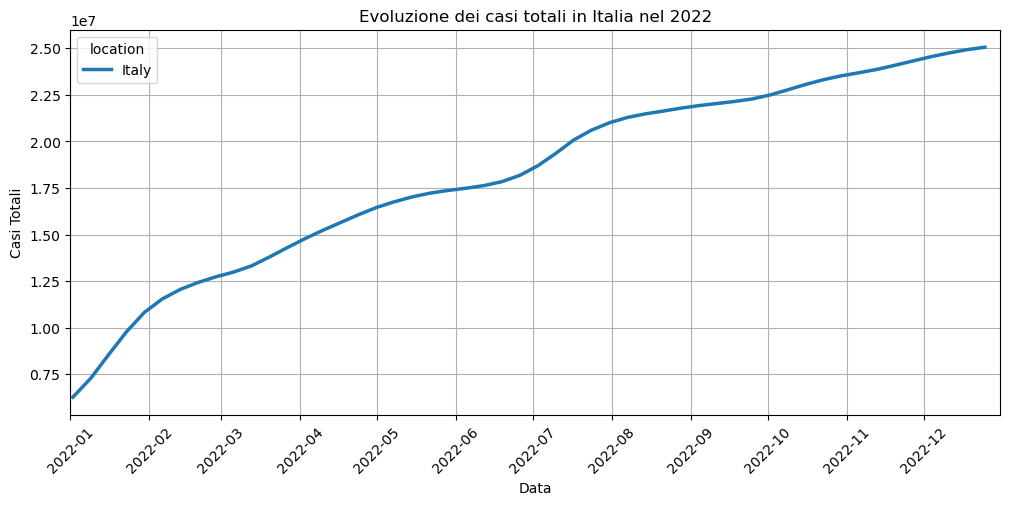

In [89]:

#grafico che rappresenta l'evoluzione dei casi totali COVID-19 in Italia dall'inizio alla fine del 2022
plt.figure(figsize = (12, 5))
sns.lineplot(data = italy_2022, x = "date", y = "total_cases", hue = "location", linewidth = 2.5)
plt.title("Evoluzione dei casi totali in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")]) #limite sui valori dell'asse x
plt.xticks(rotation = 45) #migliora la leggibilità dei valori sull'asse x
plt.grid()  #griglia
plt.show()  #mostra il grafico


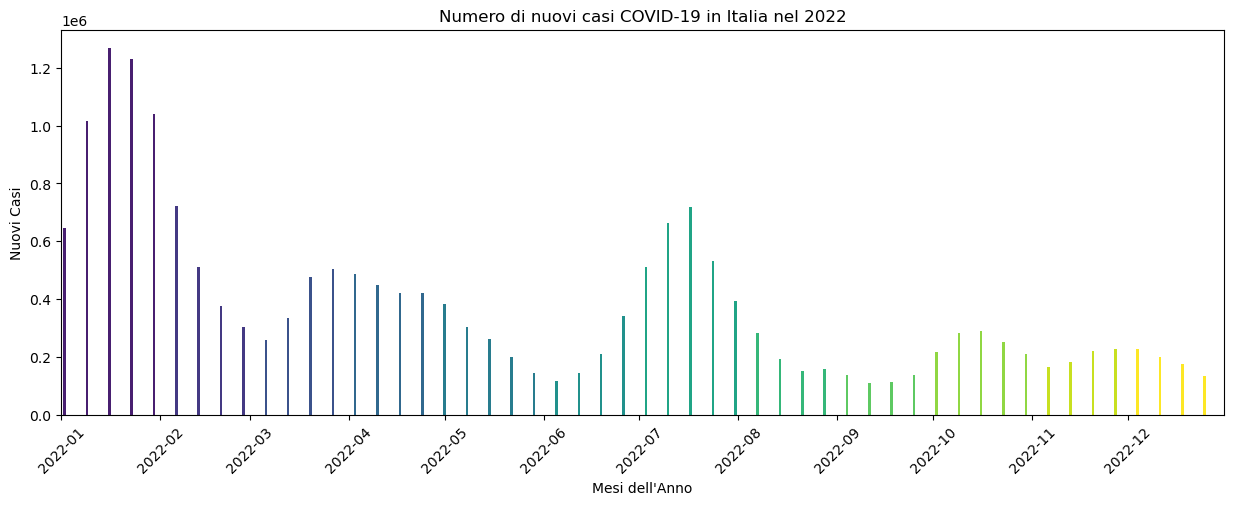

In [91]:

#grafico che rappresenta il numero di nuovi casi rispetto alla data

#creo un array di colori basato sui mesi
mesi = italy_2022["date"].dt.month  #estraggo i mesi
colori = plt.cm.viridis(mesi / 12)  #uso una palette di colori continua per migliorare il grafico

plt.figure(figsize = (15, 5))
plt.bar(italy_2022["date"], italy_2022["new_cases"], color = colori)
plt.title("Numero di nuovi casi COVID-19 in Italia nel 2022")
plt.xlabel("Mesi dell'Anno")
plt.ylabel("Nuovi Casi")
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")]) #limite sui valori dell'asse x
plt.xticks(rotation = 45) #migliora la leggibilità dei valori sull'asse x
plt.show()  #mostra il grafico


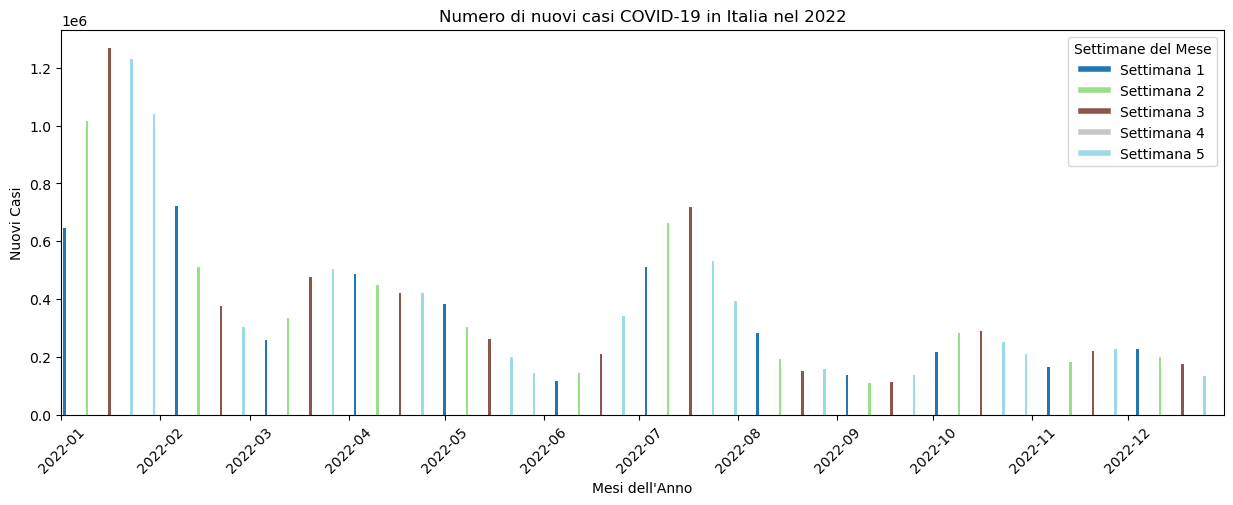

In [95]:
#creo una mappa di colori distinti
colori_settimana = plt.get_cmap('tab20', 5)  # Usa il metodo compatibile

#creo una nuova colonna che identifica la settimana del mese (1, 2, 3, 4, 5)
italy_2022_copy = italy_2022.copy()
italy_2022_copy['week_of_month'] = (italy_2022_copy['date'].dt.day - 1) // 7 + 1 
#ad esempio 2022-03-15, mi prende il giorno 15, poi 15 - 1 = 14 , 14 // 7 mi restituisce 2, 2 + 1 = 3, il 15 sulla terza settimana del mese

#array di colori
colori = []
for _, row in italy_2022.iterrows():
    settimana = row['week_of_month']  # Identifica la settimana del mese
    if settimana == 1:
        colori.append(colori_settimana(0))  # Colore per la prima settimana
    elif settimana == 2:
        colori.append(colori_settimana(1))  # Colore per la seconda settimana
    elif settimana == 3:
        colori.append(colori_settimana(2))  # Colore per la terza settimana
    elif settimana == 3:
        colori.append(colori_settimana(3))  # Colore per la quarta settimana
    else:
        colori.append(colori_settimana(4))  # Colore per la quinta settimana

#grafico
plt.figure(figsize = (15, 5))
bars = plt.bar(italy_2022["date"], italy_2022["new_cases"], color = colori)

#legenda manuale per ogni settimana
legenda = [
    plt.Line2D([0], [0], color = colori_settimana(0), lw = 4, label = 'Settimana 1'),
    plt.Line2D([0], [0], color = colori_settimana(1), lw = 4, label = 'Settimana 2'),
    plt.Line2D([0], [0], color = colori_settimana(2), lw = 4, label = 'Settimana 3'),
    plt.Line2D([0], [0], color = colori_settimana(3), lw = 4, label = 'Settimana 4'),
    plt.Line2D([0], [0], color = colori_settimana(4), lw = 4, label = 'Settimana 5')
]

plt.title("Numero di nuovi casi COVID-19 in Italia nel 2022")
plt.xlabel("Mesi dell'Anno")
plt.ylabel("Nuovi Casi")
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")])  # limite sui valori dell'asse x
plt.xticks(rotation = 45)  # migliora la leggibilità dei valori sull'asse x
plt.legend(handles = legenda, title = "Settimane del Mese", loc = "upper right")
plt.show()  # mostra il grafico


In [97]:

#calcolo la somma dei 'new_cases' su ogni mese dell'anno 2022
new_cases_mesi_2022 = italy_2022.groupby(italy_2022["date"].dt.month)["new_cases"].sum() 

#visualizzo il risultato (ogni mese, indicato con il numero, mi restituisce la somma dei casi COVID-19)
new_cases_mesi_2022


date
1     5198944.0
2     1911305.0
3     1571431.0
4     1775098.0
5     1294532.0
6      811176.0
7     2817856.0
8      786089.0
9      495950.0
10    1246211.0
11     796641.0
12     732839.0
Name: new_cases, dtype: float64

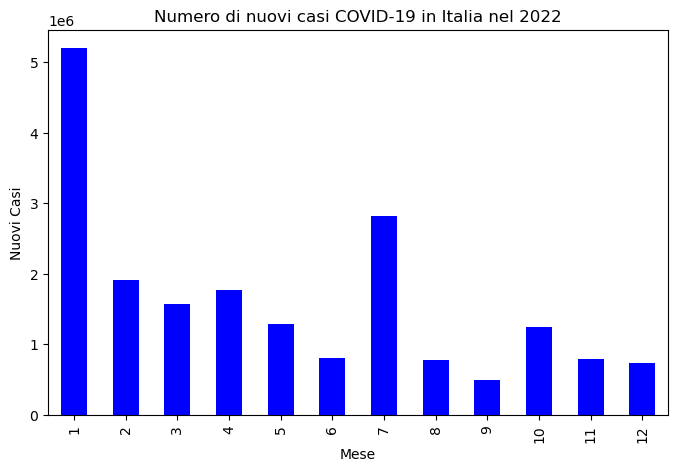

In [99]:

#grafico che rappresenta il numero di nuovi casi COVID-19 in Italia nel 2022, rispetto ai mesi
plt.figure(figsize = (8, 5))
new_cases_mesi_2022.plot( kind = "bar", color = "Blue")  #grafico a barre
plt.title("Numero di nuovi casi COVID-19 in Italia nel 2022")
plt.xlabel("Mese")
plt.ylabel("Nuovi Casi")
plt.show()  #mostra il grafico


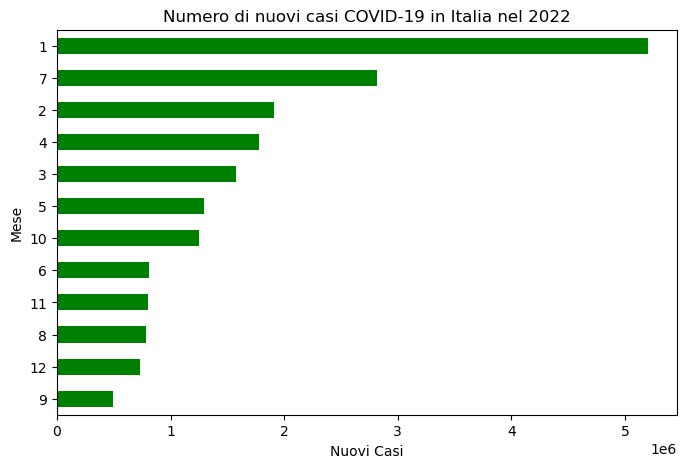

In [101]:

#grafico che rappresenta il numero di nuovi casi COVID-19 in Italia nel 2022 con i mesi ordinati dal più al meno colpito
plt.figure(figsize = (8, 5))
new_cases_mesi_2022.sort_values().plot( kind = "barh", color = "green")  #grafico a barre orizzontali
plt.title("Numero di nuovi casi COVID-19 in Italia nel 2022")
plt.xlabel("Nuovi Casi")
plt.ylabel("Mese")
plt.show()  #mostra il grafico


In [105]:
covid_analisi_total_cases_no_nulli

,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
57,Asia,Afghanistan,2020-03-02,1.0,0.0,NaN,NaN
58,Asia,Afghanistan,2020-03-03,1.0,0.0,NaN,NaN
59,Asia,Afghanistan,2020-03-04,1.0,0.0,NaN,NaN
60,Asia,Afghanistan,2020-03-05,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
429430,Africa,Zimbabwe,2024-07-31,266386.0,0.0,NaN,NaN
429431,Africa,Zimbabwe,2024-08-01,266386.0,0.0,NaN,NaN
429432,Africa,Zimbabwe,2024-08-02,266386.0,0.0,NaN,NaN
429433,Africa,Zimbabwe,2024-08-03,266386.0,0.0,NaN,NaN


In [107]:

#vado a selezionare i dati relativi all'Italia nel 2022
filtro_italy_2 = covid_analisi_total_cases_no_nulli["location"] == "Italy"  #filtro per la location "Italy"
filtro_year_2 = covid_analisi_total_cases_no_nulli["date"].dt.year == 2022   #filtro per l'anno 2022

#unisco i due filtri
filtro_2 = filtro_italy_2 & filtro_year_2

italy_2022_total = covid_analisi_total_cases_no_nulli.loc[filtro_2]

#visualizzo il DataFrame filtrato
italy_2022_total


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
186002,Europe,Italy,2022-01-01,5622431.0,0.0,1297.0,12562.0
186003,Europe,Italy,2022-01-02,6267035.0,644604.0,1319.0,13075.0
186004,Europe,Italy,2022-01-03,6267035.0,0.0,1351.0,13684.0
186005,Europe,Italy,2022-01-04,6267035.0,0.0,1392.0,14304.0
186006,Europe,Italy,2022-01-05,6267035.0,0.0,1428.0,14792.0
...,...,...,...,...,...,...,...
186362,Europe,Italy,2022-12-27,25060503.0,0.0,334.0,8653.0
186363,Europe,Italy,2022-12-28,25060503.0,0.0,321.0,8615.0
186364,Europe,Italy,2022-12-29,25060503.0,0.0,314.0,8602.0
186365,Europe,Italy,2022-12-30,25060503.0,0.0,304.0,8454.0


In [109]:

#dimensione
italy_2022_total.shape


(365, 7)

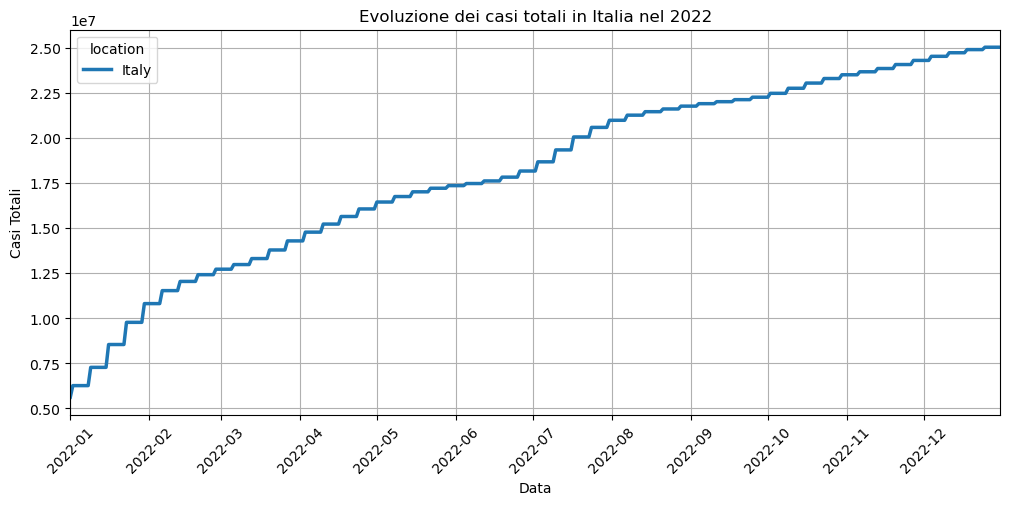

In [111]:

#grafico che rappresenta l'evoluzione dei casi totali COVID-19 in Italia dall'inizio alla fine del 2022
plt.figure(figsize = (12, 5))
sns.lineplot(data = italy_2022_total, x = "date", y = "total_cases", hue = "location", linewidth = 2.5)
plt.title("Evoluzione dei casi totali in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")]) #limite sui valori dell'asse x
plt.xticks(rotation = 45) #migliora la leggibilità dei valori sull'asse x
plt.grid()  #griglia
plt.show()  #mostra il grafico


# PUNTO 4 # 
Riguardo le nazioni di Italia, Germania e Francia:

            a. Mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, 
               considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

            b. Scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

In [114]:
covid_analisi_new_cases_no_nulli

,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
70,Asia,Afghanistan,2020-03-15,7.0,6.0,NaN,NaN
77,Asia,Afghanistan,2020-03-22,24.0,17.0,NaN,NaN
84,Asia,Afghanistan,2020-03-29,91.0,67.0,NaN,NaN
91,Asia,Afghanistan,2020-04-05,274.0,183.0,NaN,NaN
...,...,...,...,...,...,...,...
429385,Africa,Zimbabwe,2024-06-16,266374.0,9.0,NaN,NaN
429392,Africa,Zimbabwe,2024-06-23,266378.0,4.0,NaN,NaN
429399,Africa,Zimbabwe,2024-06-30,266384.0,6.0,NaN,NaN
429406,Africa,Zimbabwe,2024-07-07,266385.0,1.0,NaN,NaN


In [116]:

#valori NaN presenti nella colonna 'icu_patients'
print("Il numero di valori NaN sulla colonna icu_patients è:",covid_analisi_new_cases_no_nulli["icu_patients"].isna().sum())


Il numero di valori NaN sulla colonna icu_patients è: 33356


In [118]:

#vado a selezionare i dati relativi alle nazioni Italia, Germania e Francia
nazioni = ["Italy", "Germany", "France"]
filtro_nazioni = covid_analisi_new_cases_no_nulli["location"].isin(nazioni)

#vado a selezionare il periodo temporale che va da maggio 2022 ad aprile 2023 (inclusi)
filtro_date = (covid_analisi_new_cases_no_nulli["date"] >= "2022-05-01") & (covid_analisi_new_cases_no_nulli["date"] <= "2023-04-30")

#seleziono i dati filtrati e carico il risultato in un DataFrame
it_germ_fr = covid_analisi_new_cases_no_nulli[filtro_nazioni & filtro_date]

#visualizzo il risultato
it_germ_fr 


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
131214,Europe,France,2022-05-01,27742592.0,376510.0,1557.0,23327.0
131221,Europe,France,2022-05-08,28007520.0,264928.0,1403.0,20939.0
131228,Europe,France,2022-05-15,28224235.0,216715.0,1214.0,18935.0
131235,Europe,France,2022-05-22,28386474.0,162239.0,1081.0,16941.0
131242,Europe,France,2022-05-29,28499829.0,113355.0,1014.0,15646.0
...,...,...,...,...,...,...,...
186458,Europe,Italy,2023-04-02,25701147.0,20999.0,88.0,2582.0
186465,Europe,Italy,2023-04-09,25721054.0,19907.0,84.0,2509.0
186472,Europe,Italy,2023-04-16,25745800.0,24746.0,90.0,2853.0
186479,Europe,Italy,2023-04-23,25772459.0,26659.0,90.0,2986.0


In [120]:

#andiamo ad indagare sui valori NaN  della colonna 'icu_patients' presenti nel DataFrame filtrato per nazioni
print("Il numero di valori NaN è:",it_germ_fr["icu_patients"].isna().sum())

#andiamo ad indagare se sono presenti dei valori nulli impliciti nella colonna 'icu_patients' del DataFrame filtrato per nazioni
print("I valori contenenti 0 sono:",(it_germ_fr["icu_patients"] == 0).sum())    #valori 0
print("I valori contententi stringhe vuote sono:", (it_germ_fr["icu_patients"] == "" ).sum())  #stringhe vuote


Il numero di valori NaN è: 5
I valori contenenti 0 sono: 0
I valori contententi stringhe vuote sono: 0


In [128]:

#vado a filtrare la colonna 'icu_patients' per i valori non nulli
it_germ_fr = it_germ_fr.loc[it_germ_fr["icu_patients"].notna()]


In [130]:

#visualizzo il risultato
it_germ_fr


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
131214,Europe,France,2022-05-01,27742592.0,376510.0,1557.0,23327.0
131221,Europe,France,2022-05-08,28007520.0,264928.0,1403.0,20939.0
131228,Europe,France,2022-05-15,28224235.0,216715.0,1214.0,18935.0
131235,Europe,France,2022-05-22,28386474.0,162239.0,1081.0,16941.0
131242,Europe,France,2022-05-29,28499829.0,113355.0,1014.0,15646.0
...,...,...,...,...,...,...,...
186458,Europe,Italy,2023-04-02,25701147.0,20999.0,88.0,2582.0
186465,Europe,Italy,2023-04-09,25721054.0,19907.0,84.0,2509.0
186472,Europe,Italy,2023-04-16,25745800.0,24746.0,90.0,2853.0
186479,Europe,Italy,2023-04-23,25772459.0,26659.0,90.0,2986.0


In [134]:

#controllo se i valori NaN sono stati filtrati
print("Il numero di valori NaN è:",it_germ_fr["icu_patients"].isna().sum())


Il numero di valori NaN è: 0


In [136]:

#per ogni nazione elencata visualizzo la somma, la media, la mediana, il massimo e il minimo dei pazienti in terapia intensiva
it_germ_fr.groupby("location")["icu_patients"].agg(["sum", "mean", "median", "max", "min"])


,sum,mean,median,max,min
location,,,,,
France,48079.0,1001.645833,978.5,1557.0,710.0
Germany,53357.0,1006.735849,994.0,1741.0,512.0
Italy,12244.0,231.018868,228.0,405.0,84.0


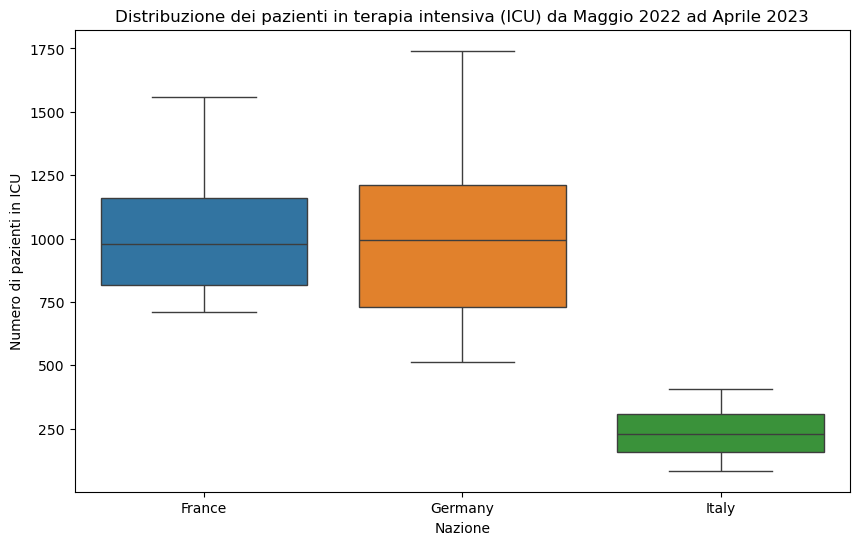

In [138]:

# grafico boxplot  che rappresenta il numeri di pazienti in terapia intensiva da maggio 2022 ad aprile 2023 nelle nazioni di Italia, Germania e Francia
plt.figure(figsize = (10, 6))
sns.boxplot( data = it_germ_fr, x = "location", y = "icu_patients", hue = "location")
plt.title("Distribuzione dei pazienti in terapia intensiva (ICU) da Maggio 2022 ad Aprile 2023")
plt.xlabel("Nazione")
plt.ylabel("Numero di pazienti in ICU")
plt.show()  #mostra il grafico


Conclusioni che possiamo trarre osservando il grafico risultante:


# PUNTO 5 # 
Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:

            a. Mostrare in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)

            b. Se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [141]:
covid_analisi_new_cases_no_nulli

,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
70,Asia,Afghanistan,2020-03-15,7.0,6.0,NaN,NaN
77,Asia,Afghanistan,2020-03-22,24.0,17.0,NaN,NaN
84,Asia,Afghanistan,2020-03-29,91.0,67.0,NaN,NaN
91,Asia,Afghanistan,2020-04-05,274.0,183.0,NaN,NaN
...,...,...,...,...,...,...,...
429385,Africa,Zimbabwe,2024-06-16,266374.0,9.0,NaN,NaN
429392,Africa,Zimbabwe,2024-06-23,266378.0,4.0,NaN,NaN
429399,Africa,Zimbabwe,2024-06-30,266384.0,6.0,NaN,NaN
429406,Africa,Zimbabwe,2024-07-07,266385.0,1.0,NaN,NaN


In [143]:

#valori NaN presenti nella colonna 'hosp_patients'
print("Il numero di valori NaN sulla colonna hosp_patients è:",covid_analisi_new_cases_no_nulli["hosp_patients"].isna().sum())


Il numero di valori NaN sulla colonna hosp_patients è: 33783


In [145]:

#vado a selezionare i dati relativi alle nazioni Italia, Germania, Francia e Spagna
nazioni_bis = ["Italy", "Germany", "France", "Spain"]
filtro_nazioni_bis = covid_analisi_new_cases_no_nulli["location"].isin(nazioni_bis)

#vado a selezionare l'anno 2021
filtro_date_bis = (covid_analisi_new_cases_no_nulli["date"] >= "2021-01-01") & (covid_analisi_new_cases_no_nulli["date"] <= "2021-12-31")

#seleziono i dati filtrati e carico il risultato in un DataFrame
it_germ_fr_sp = covid_analisi_new_cases_no_nulli[filtro_nazioni_bis & filtro_date_bis]

#visualizzo il risultato
it_germ_fr_sp


,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
130731,Europe,France,2021-01-03,2427206.0,88948.0,2665.0,24780.0
130738,Europe,France,2021-01-10,2549469.0,122263.0,2620.0,24526.0
130745,Europe,France,2021-01-17,2668311.0,118842.0,2766.0,25235.0
130752,Europe,France,2021-01-24,2798460.0,130149.0,2955.0,26357.0
130759,Europe,France,2021-01-31,2931084.0,132624.0,3148.0,27573.0
...,...,...,...,...,...,...,...
363279,Europe,Spain,2021-11-28,5171584.0,59198.0,667.0,3080.0
363286,Europe,Spain,2021-12-05,5261477.0,89893.0,781.0,3308.0
363293,Europe,Spain,2021-12-12,5377493.0,116016.0,1154.0,5120.0
363300,Europe,Spain,2021-12-19,5609092.0,231599.0,1424.0,5981.0


In [147]:

#andiamo ad indagare sui valori NaN  della colonna 'hosp_patients' presenti nel DataFrame filtrato per nazioni
print("Il numero di valori NaN è:",it_germ_fr_sp["hosp_patients"].isna().sum())

#andiamo ad indagare se sono presenti dei valori nulli impliciti nella colonna 'hosp_patients' del DataFrame filtrato per nazioni
print("I valori contenenti 0 sono:",(it_germ_fr_sp["hosp_patients"] == 0).sum())   #valori 0
print("I valori contententi stringhe vuote sono:", (it_germ_fr_sp["hosp_patients"] == "" ).sum())  #stringhe vuote


Il numero di valori NaN è: 52
I valori contenenti 0 sono: 0
I valori contententi stringhe vuote sono: 0


In [149]:

#calcolo il totale dei pazienti ospedalizzati per ogni nazione considerata
totale_hosp_patients = it_germ_fr_sp.groupby("location")["hosp_patients"].sum()

#Visualizzo il risultato
print("La somma dei pazienti ospitalizzati per nazione nel 2021 é:\n",totale_hosp_patients)


La somma dei pazienti ospitalizzati per nazione nel 2021 é:
 location
France     854767.0
Germany         0.0
Italy      626339.0
Spain      357643.0
Name: hosp_patients, dtype: float64


In [151]:

#calcolo il totale dei pazienti ospedalizzati e dei pazienti in terapia intensiva per ogni nazione considerata
it_germ_fr_sp.groupby("location")[["hosp_patients","icu_patients"]].sum()


,hosp_patients,icu_patients
location,,
France,854767.0,139088.0
Germany,0.0,143737.0
Italy,626339.0,70303.0
Spain,357643.0,89395.0


In [153]:

#voglio vedere cosa contiene la colonna 'hosp_patients' della nazione Germany
it_germ_fr_sp[it_germ_fr_sp["location"] == "Germany"]["hosp_patients"].unique()


array([nan])

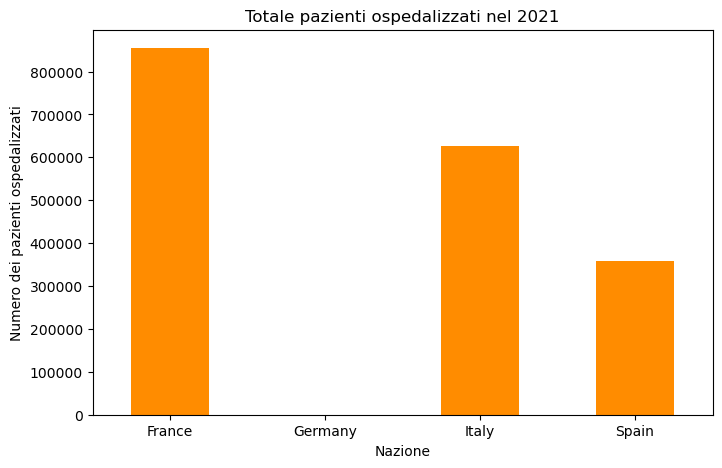

In [155]:

#grafico a barre che mostra il numero dei pazienti ospedalizzati nelle nazioni considerate, nel 2021
plt.figure(figsize = (8, 5))
totale_hosp_patients.plot(kind = "bar", color = "darkorange")
plt.title("Totale pazienti ospedalizzati nel 2021")
plt.xlabel("Nazione")
plt.ylabel("Numero dei pazienti ospedalizzati")
plt.xticks(rotation = 0)  #migliora la leggibilità dei valori sull'asse x
plt.show() #mostra il grafico


In [157]:

#vado a selezionare i dati relativi alla nazione Germania
filtro_nazione = covid_analisi_new_cases_no_nulli["location"] == "Germany"

#seleziono i dati filtrati e carico il risultato in un dataframe
df_germ = covid_analisi_new_cases_no_nulli[filtro_nazione]

#vado a visualizzare la somma dei pazienti ospitalizzati per anno
sum_host_patients_germ = df_germ.groupby(df_germ["date"].dt.year)["hosp_patients"].sum()

print("La somma dei pazienti ospedalizzati in Germania negli anni della pandemia è:\n",sum_host_patients_germ)


La somma dei pazienti ospedalizzati in Germania negli anni della pandemia è:
 date
2020    0.0
2021    0.0
2022    0.0
2023    0.0
Name: hosp_patients, dtype: float64


In [159]:

df_germ["hosp_patients"].unique()


array([nan])

In [161]:

#vado a visualizzare la somma dei pazienti ospedalizzati per anno per ogni location
hosp_sum_anno_loc = covid_analisi.groupby([covid_analisi["date"].dt.year,"location"])["hosp_patients"].sum()

print("La somma dei pazienti ospedalizzati per anno per ogni location è:\n",hosp_sum_anno_loc)


La somma dei pazienti ospedalizzati per anno per ogni location è:
 date  location         
2020  Afghanistan          0.0
      Africa               0.0
      Albania              0.0
      Algeria              0.0
      American Samoa       0.0
                          ... 
2024  Wallis and Futuna    0.0
      World                0.0
      Yemen                0.0
      Zambia               0.0
      Zimbabwe             0.0
Name: hosp_patients, Length: 1261, dtype: float64


In [163]:

#creo un set per salvare le nazioni che hanno 0 ospedalizzati in almeno un anno della pandemia
nazioni_zero = set()  #set vuoto

# considero tutte le nazioni e gli anni
for (anno, nazione), totale_pazienti in hosp_sum_anno_loc.items():
    if totale_pazienti == 0:  # se il totale è 0, aggiungo la nazione all'elenco
        nazioni_zero.add(nazione)

#stampo le nazioni con almeno un anno senza ospedalizzazioni
print("Nazioni con pazienti ospedalizzati pari a 0 in almeno un anno:")
for nazione in nazioni_zero:
    print(nazione)
    

Nazioni con pazienti ospedalizzati pari a 0 in almeno un anno:
Albania
Malawi
Saudi Arabia
Vanuatu
Taiwan
Hong Kong
Iceland
Morocco
Benin
Turkey
Estonia
Algeria
Kuwait
Egypt
Moldova
United States Virgin Islands
South Africa
Fiji
Mongolia
Seychelles
Saint Kitts and Nevis
Togo
Rwanda
French Polynesia
Mayotte
Ireland
Philippines
Laos
Faroe Islands
Greece
Reunion
Sudan
American Samoa
Northern Cyprus
Uzbekistan
Cuba
Mauritius
Indonesia
High-income countries
Trinidad and Tobago
Chile
Ukraine
Ghana
European Union (27)
Honduras
Guernsey
Tonga
Asia
Croatia
Israel
Grenada
Macao
South Sudan
Singapore
Gambia
Haiti
Libya
Vietnam
Finland
Turkmenistan
Greenland
Martinique
Cyprus
Lower-middle-income countries
Burkina Faso
Saint Vincent and the Grenadines
Switzerland
Democratic Republic of Congo
Eritrea
Mali
Myanmar
Angola
Isle of Man
Peru
Afghanistan
Ethiopia
Papua New Guinea
Uruguay
Cambodia
Norway
Yemen
Kyrgyzstan
Guadeloupe
Brazil
Zimbabwe
Congo
Guinea-Bissau
Burundi
Cameroon
Paraguay
Central Afric

In [165]:

len(nazioni_zero)   #numero location che hanno come totale pazienti ospedalizzati almeno uno 0 in un anno della pandemia


244

In [167]:

len(covid_analisi["location"].unique())  #numero totale delle location che sono presenti nel DataFrame


255

In [169]:

#voglio visualizzare tutte le location che hanno la somma dei pazienti ospedalizzati uguale a 0 in tutti gli anni della pandemia
nazioni_tutti_zeri = hosp_sum_anno_loc.groupby("location").sum().eq(0)  #questa è una series

#della series prendo l'indice (ovvero i nomi delle nazioni) e trasformo il risultato in lista
nazioni_tutti_zeri = nazioni_tutti_zeri[nazioni_tutti_zeri].index.tolist()

#visualizzo il risultato
print("Nazioni con pazienti ospedalizzati pari a 0 in tutti gli anni:\n",nazioni_tutti_zeri)


Nazioni con pazienti ospedalizzati pari a 0 in tutti gli anni:
 ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Democratic Republic of Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Europe', 'European Union (27)', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'French Guiana', 'French Polynesia', 'Gabon',

In [171]:

len(nazioni_tutti_zeri) #numero location che hanno come totale pazienti ospedalizzati 0 in tutti gli anni della pandemia


215